# Prepare

## Import

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
sys.path.append(r'C:\Users\cnhaj\Code')

import scipy as sp
import json
from scipy.fft import fft, fftfreq

# from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Could not load InstrumentManagerWindow


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'normal',
#         'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Function used in experiment

In [3]:
import sys

# Path to add
path_candidates = [
    'C:\\_Lib\\python\\multimode_expts',
    r'C:\Users\cnhaj\Code\multimode_expts',
    '/Users/wgz/Code/multimode_expts',
]
for expts_path in path_candidates:
    if os.path.exists(expts_path):
        break

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['/Users/wgz/Code/multimode_expts', '/Users/wgz/Code', '/Users/wgz/anaconda3/envs/slab/lib/python311.zip', '/Users/wgz/anaconda3/envs/slab/lib/python3.11', '/Users/wgz/anaconda3/envs/slab/lib/python3.11/lib-dynload', '', '/Users/wgz/anaconda3/envs/slab/lib/python3.11/site-packages', '/Users/wgz/Code/maskLib/src', '/home/xilinx/jupyter_notebooks/', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'C:\\Users\\cnhaj\\Code']


In [4]:
from fitting.fit_display import *

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [5]:
import experiments.fitting as fitter
from numpy.linalg import inv

In [6]:
from qick.helpers import cosine

## Experiment data file path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = os.path.join(expt_path, filename)
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

slab_Gdrive_candidates = [
    r'H:\Shared drives\SLab',
    r'G:\Shared drives\SLab',
    '/Users/wgz/Library/CloudStorage/GoogleDrive-gzhwang@stanford.edu/Shared drives/SLab',
]
for slab_loc in slab_Gdrive_candidates:
    if os.path.exists(slab_loc):
        break
parent_path = os.path.join(slab_loc, 'Multimode', 'experiment')

expt_path = os.path.join(parent_path, '250812_qsim', 'data')
print('Data are extracted from', expt_path)

Data are extracted from /Users/wgz/Library/CloudStorage/GoogleDrive-gzhwang@stanford.edu/Shared drives/SLab/Multimode/experiment/250812_qsim/data


In [8]:
remote_path = 'bf5:/D:/experiments/251031_qsim/data'
local_path = '/Users/wgz/Downloads/data'
from multimode_expts.experiments.qsim.utils import ensure_local_file

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [9]:
ensure_local_file(remote_path, local_path, '00080_KerrRamseyExperiment.h5')

Found local file /Users/wgz/Downloads/data/00080_KerrRamseyExperiment.h5


'/Users/wgz/Downloads/data/00080_KerrRamseyExperiment.h5'

## Dataset

In [10]:
from experiments.dataset import *
from experiments.dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = StorageManSwapDataset(file_path)

In [11]:
ds.df

stor_name   freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1   352.864639              NaN   1.861001    0.930501   
1      M1-S2   524.732041              NaN   1.880380    0.940190   
2      M1-S3   700.868681              NaN   1.857972    0.928986   
3      M1-S4   880.813564              NaN   1.538406    0.769203   
4      M1-S5  1057.186387              NaN   1.876770    0.938385   
5      M1-S6  1248.764437              NaN   1.861310    0.930655   
6      M1-S7  1426.971632              NaN   3.448309    1.724154   
7      M1-S8    -1.000000            -1.00  -1.000000   -1.000000   
8      M1-S9    -1.000000            -1.00  -1.000000   -1.000000   
9     M1-S10    -1.000000            -1.00  -1.000000   -1.000000   
10    M1-S11    -1.000000            -1.00  -1.000000   -1.000000   
11    M1-S12    -1.000000            -1.00  -1.000000   -1.000000   
12        M1  2004.016904              NaN   0.567250    0.278533   
13        M2  1834.950000             0.01   1.054456    0.520515   
14     M2-S1   175.630000             0.01   2.173484    1.086742   
15     M2-S2   346.840000             0.01   0.908835    0.454417   
16     M2-S3   523.220000             0.01   1.561615    0.780808   
17     M2-S4   702.650000             0.01   1.386764    0.693382   
18     M2-S5   878.780000             0.01   1.303372    0.651686   
19     M2-S6  1070.100000             0.01   2.379622    1.189811   
20     M2-S7  1249.700000             0.01   1.796981    0.898491   
21     M2-M1   173.790000             0.01   0.463481    0.231741   
22     M1-D1  2373.600000             0.01  10.000000    0.000000   
23     M2-D2  2094.050000             0.01  15.000000    0.000000   
24      M1-C   919.000000             0.02   0.251127    0.122354   
25     M1_ce  2008.780000             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3565  2025-12-09 11:01:09.540616  
1               4490  2025-12-09 11:05:12.237531  
2               4511  2025-12-09 11:09:15.044775  
3               9033  2025-12-09 11:13:17.493516  
4               9987  2025-12-09 11:17:20.123557  
5              13802  2025-12-09 11:21:23.129555  
6               9009  2025-12-09 11:56:32.673570  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12              8000  2025-12-09 10:47:05.140869  
13             15000  2025-04-30 11:22:11.432806  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              4000  2025-10-28 16:37:57.400701  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-12-08 16:40:53.078714  
25             15000  2025-01-20 09:52:35.311227

In [12]:
list(ds.df['freq (MHz)'][1:7])

[524.7320407642399,
 700.8686805710045,
 880.813564008455,
 1057.186387129217,
 1248.764436536901,
 1426.9716321043352]

In [13]:
list(ds.df['gain (DAC units)'][1:7])

[4490, 4511, 9033, 9987, 13802, 9009]

# Actual experiment data

## Early random scrambling

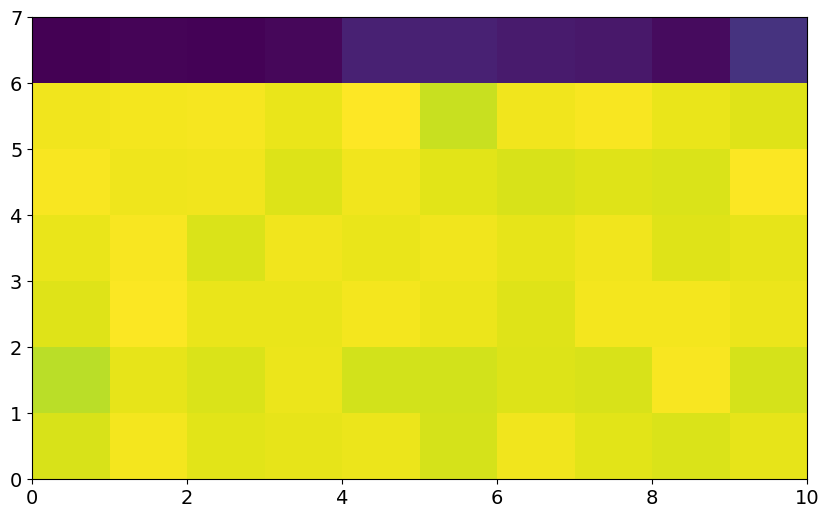

In [9]:
all_amps = []

for id in range(20,30):
    temp_data, attrs = prev_data(expt_path, f'00{id:03d}_storage_sweep.h5')
    all_amps.append(temp_data['amps'])


all_amps = np.array(all_amps)


plt.pcolormesh(all_amps[:,6,:].T, cmap='viridis')


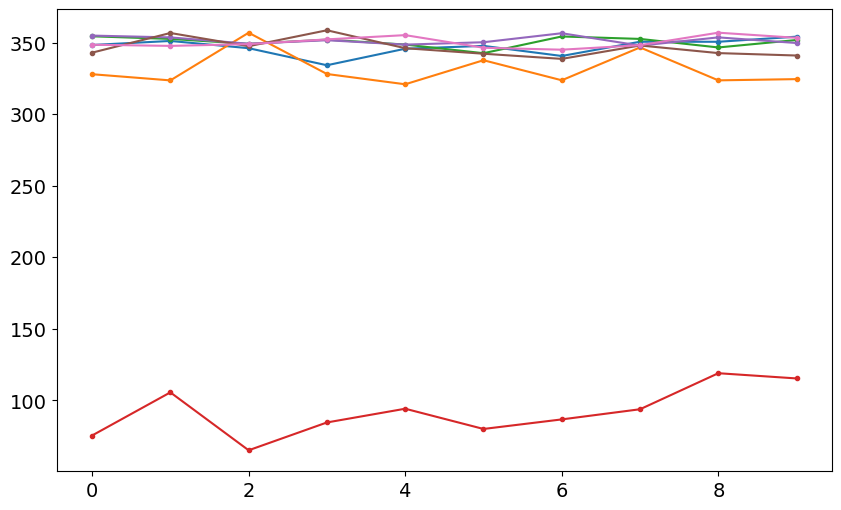

In [21]:
for kk in range(7):
    plt.plot(all_amps[:,3,kk], marker='.')

## Sideband chevron

In [37]:
temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S7.h5')

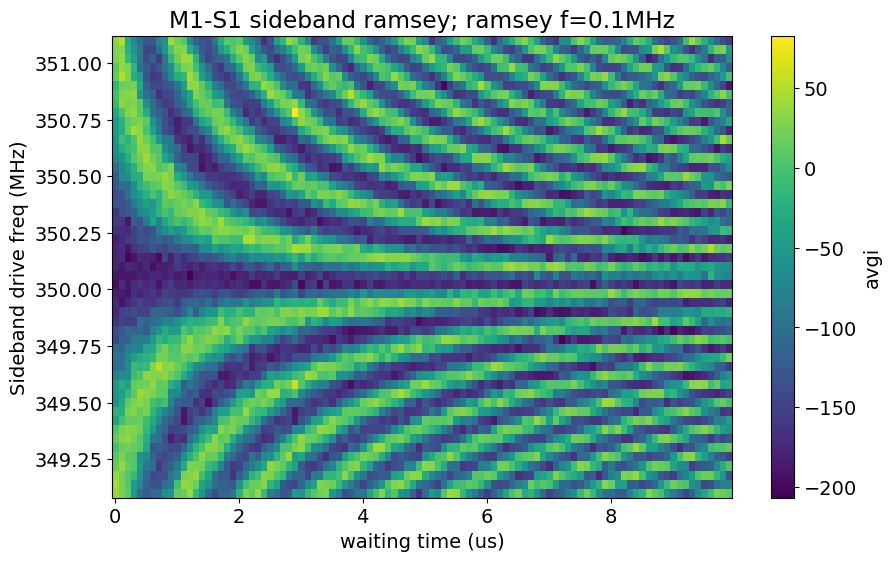

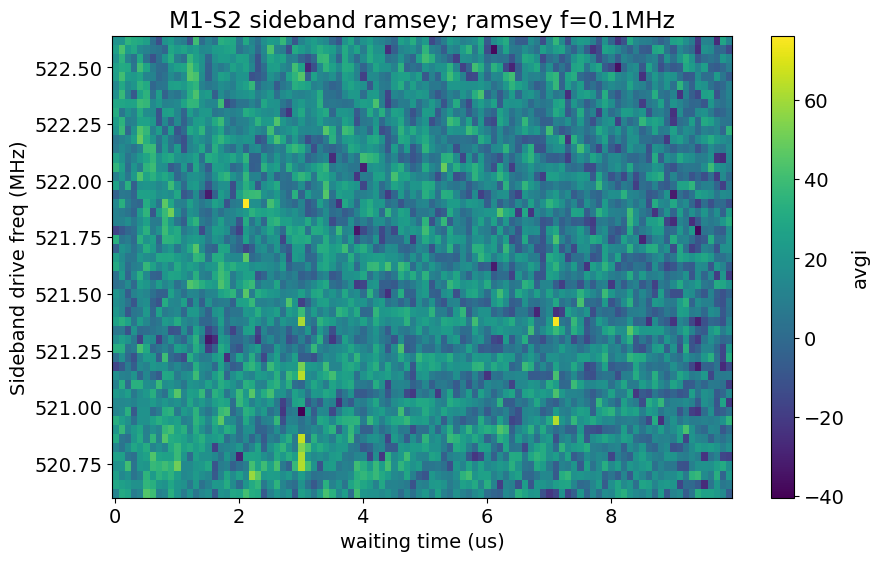

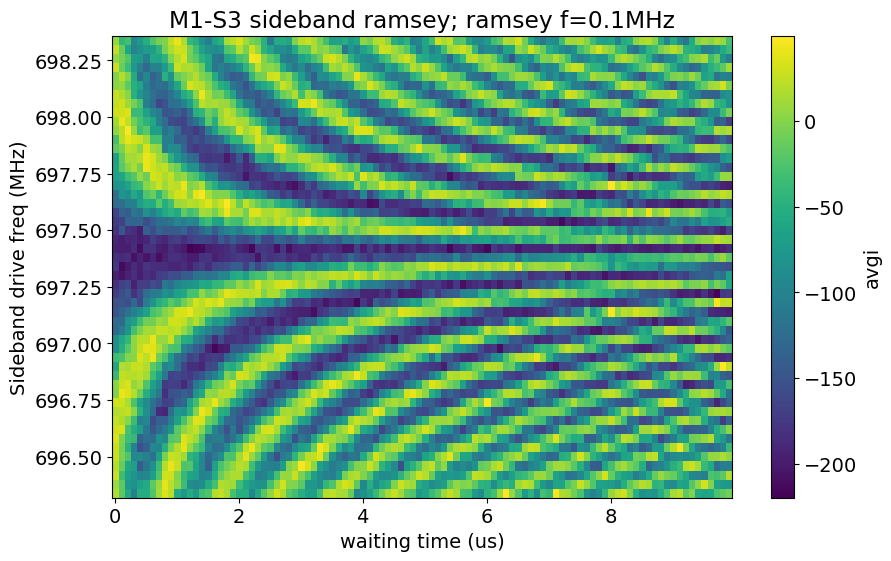

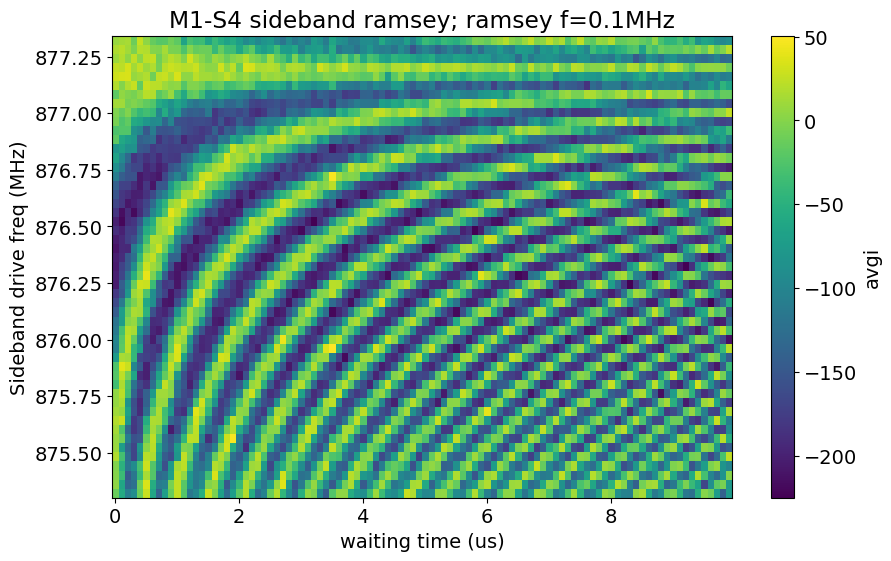

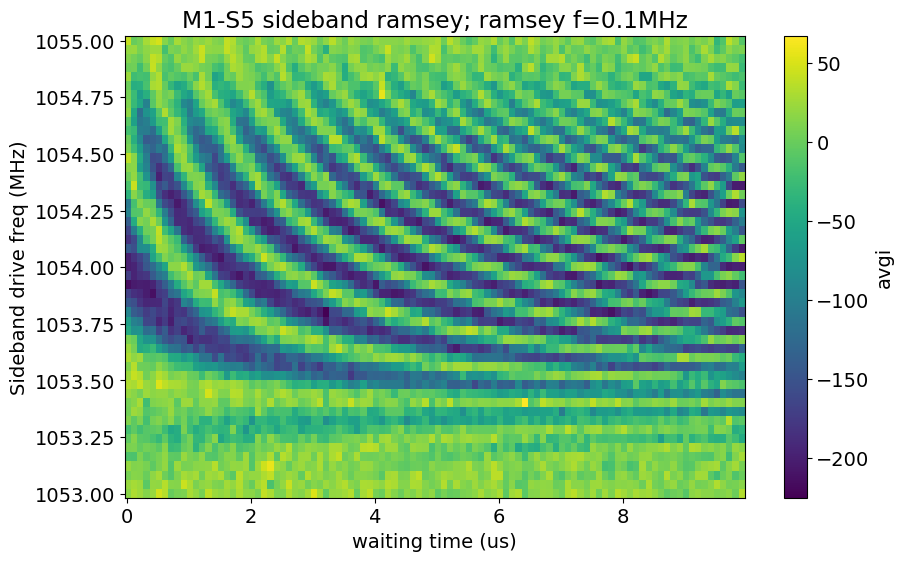

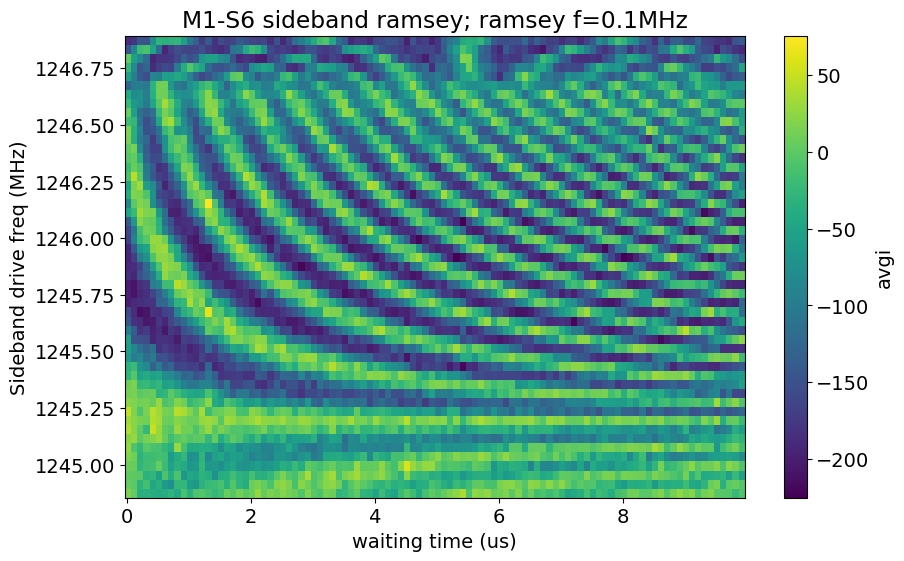

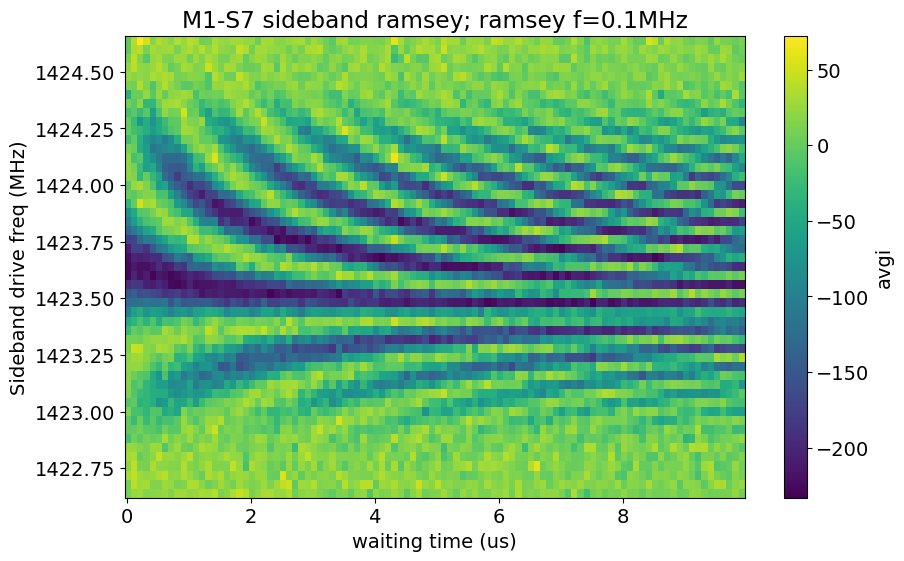

In [39]:
stor_no = 7

for stor_no in range(1,8):
    temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S{stor_no}.h5')
    plt.figure()
    plt.pcolormesh(temp_data['xpts'], temp_data['ypts'], temp_data['avgi'])
    plt.colorbar(label='avgi')
    plt.xlabel('waiting time (us)')
    plt.ylabel('Sideband drive freq (MHz)')
    plt.title(f'M1-S{stor_no} sideband ramsey; ramsey f=0.1MHz')

## Scrambling (still bad)

In [67]:
from multimode_expts.experiments.qsim.sideband_scramble import SidebandScrambleExperiment

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.q

In [70]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data'

In [115]:
ss = []

for idx in tqdm(range(0,51)):
    fname = f'{idx:05d}_SidebandScramble_S1_to_S6.h5'
    ss.append(SidebandScrambleExperiment(path=expt_path, config_file=fname))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [03:55<00:00,  4.62s/it]


In [116]:
for s in ss:
    s.data = s.load_data(s.datafile())

In [117]:
avgis = np.array([s.data['avgi'] for s in ss])

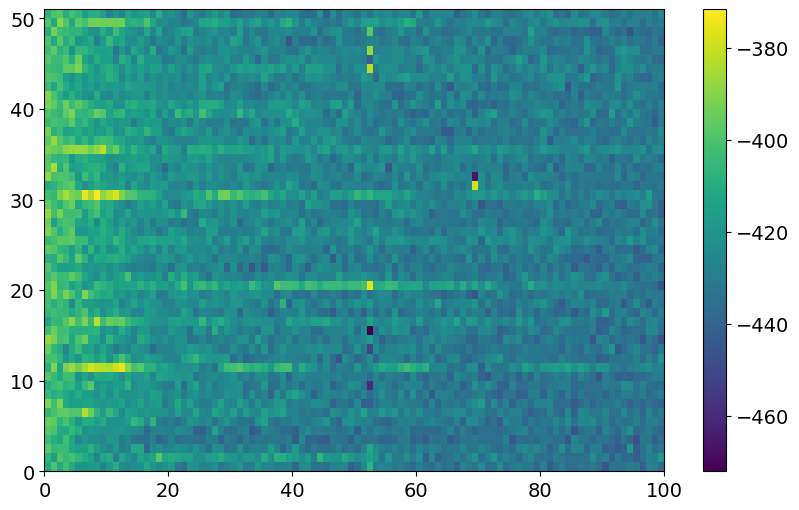

In [118]:
plt.pcolormesh(avgis)
plt.colorbar()

100%|█████████████████████████████████████████| 20/20 [01:41<00:00,  5.08s/it]


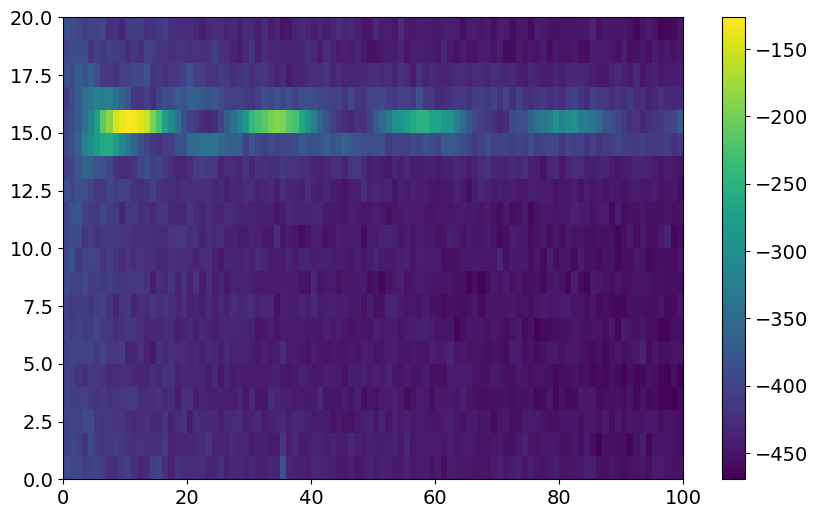

In [98]:
ss = []

for idx in tqdm(range(0,20)):
    fname = f'{idx:05d}_SidebandScramble_S4_to_S0.h5'
    ss.append(SidebandScrambleExperiment(path=expt_path, config_file=fname))

for s in ss:
    s.data = s.load_data(s.datafile())

avgis = np.array([s.data['avgi'] for s in ss])
plt.pcolormesh(avgis)
plt.colorbar()

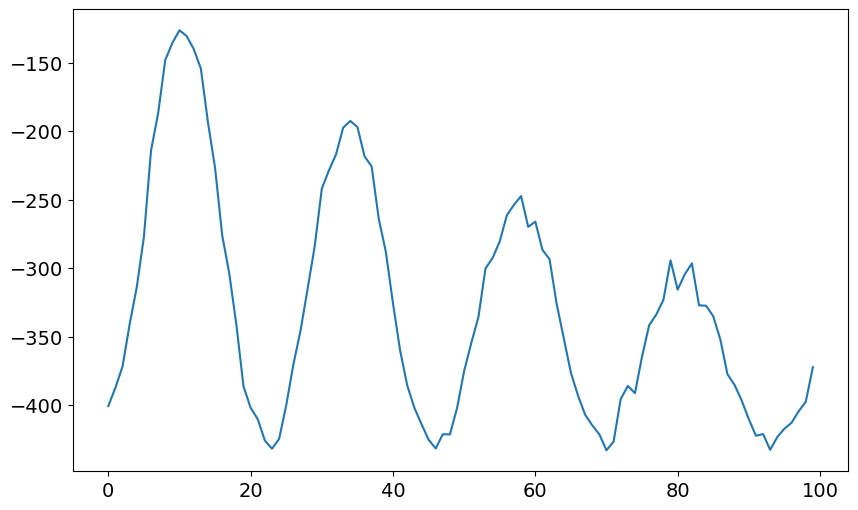

In [99]:
plt.plot(avgis[15])

## AC Stark shift

### Amplitude rabi

In [12]:
from multimode_expts.experiments.qsim.sideband_amp_rabi import SidebandAmpRabiExperiment

importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_base
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_

Could not load config.


Traceback (most recent call last):
  File "C:\Users\cnhaj\Code\slab\experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'SidebandAmpRabiExperiment' object has no attribute 'im'


Couldn't get x and y labels automatially: 'AttrDict' object has no attribute 'swept_params'


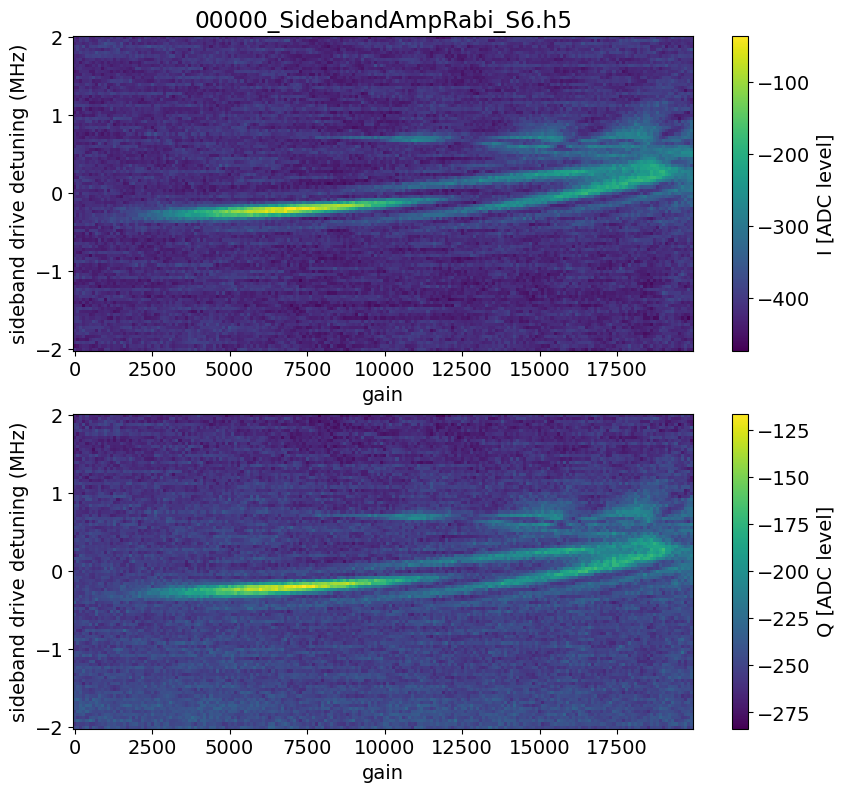

In [28]:
fname = '00000_SidebandAmpRabi_S6.h5'
s = SidebandAmpRabiExperiment(path=expt_path, config_file=fname)
s.data = s.load_data(s.datafile())

fig, axs = s.display()
for ax in axs:
    ax.set_xlabel('gain')
    ax.set_ylabel('sideband drive detuning (MHz)')

### Extracting stark shift phase correction

In [10]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkExperiment

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.deprecated
imported experiments.qsim.floquet_chevron
imported experiments.qsim.floquet_offdiag_phasecal
imported experiments.qsim.qsim_base
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported ex

In [19]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data'

In [51]:
fnames = [
    '00010_SidebandStark_S1.h5',
    '00004_SidebandStark_S2.h5',
    '00000_SidebandStark_S3.h5',
    '00000_SidebandStark_S4.h5',
    '00002_SidebandStark_S5.h5',
    '00000_SidebandStark_S6.h5',
    '00000_SidebandStark_S7.h5',
]

In [53]:
s = SidebandStarkExperiment(path=expt_path, config_file=fnames[1])
s.data = s.load_data(s.datafile())

AC Stark freq: 0.185160MHz


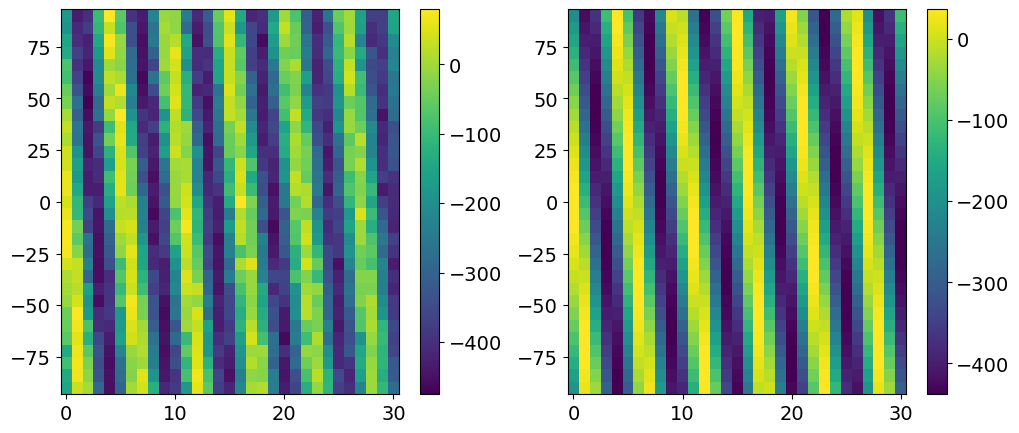

In [54]:
s.analyze()
s.fit_result

### Extracting off diagonal stark shift phase correction (coarse)

In [16]:
from multimode_expts.experiments.qsim.floquet_offdiag_phasecal import FloquetPhaseCalExperiment

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [15]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [13]:
fnames = [
    '00001_FloquetPhaseCal_S0.h5',
    '00000_FloquetPhaseCal_1on2_via3.h5',
    '00000_FloquetPhaseCal_3on1_via2.h5',
    '00000_FloquetPhaseCal_1on3_via2.h5',
    '00000_FloquetPhaseCal_3on2_via1.h5',
    '00000_FloquetPhaseCal_2on3_via1.h5',
]

In [17]:
s = FloquetPhaseCalExperiment(path=expt_path, config_file=fnames[3])
s.data = s.load_data(s.datafile())

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 78, in load_config
    for alias, inst in self.cfg['aliases'].items():
                       ~~~~~~~~^^^^^^^^^^^
  File "/Users/wgz/Code/slab/datamanagement.py", line 547, in __getitem__
    v=super().__getitem__(key)
      ^^^^^^^^^^^^^^^^^^^^^^^^
KeyError: 'aliases'


AC Stark freq: -0.053216MHz


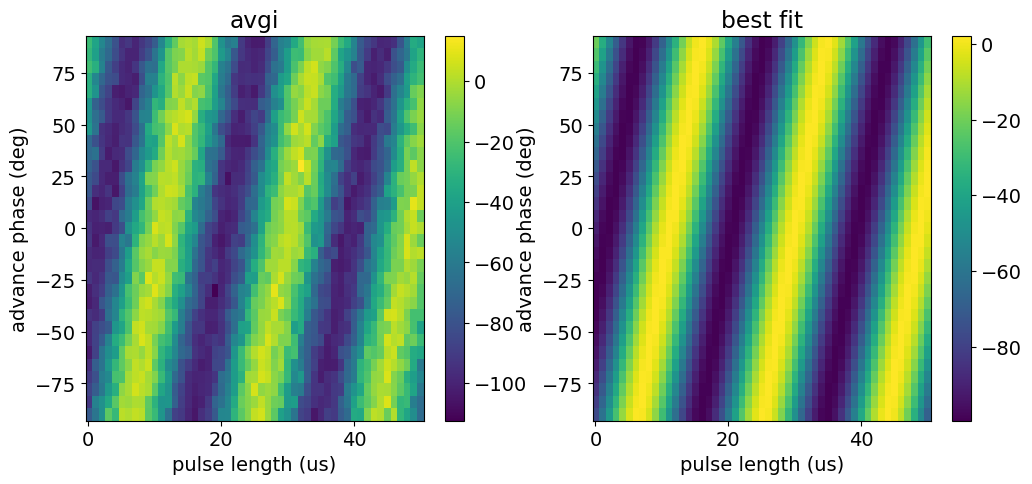

In [18]:
s.analyze()
s.fit_result

### Extracting off diagonal stark shift phase correction (coarse)

In [62]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkAmplificationExperiment

In [63]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [69]:
fnames = [
    '00001_SidebandStarkAmplification_S2_S7.h5',
    '00000_SidebandStarkAmplification_S7_S2.h5',
    '00000_SidebandStarkAmplification_S3_S7.h5',
    '00000_SidebandStarkAmplification_S7_S3.h5',
    '00002_SidebandStarkAmplification_S2_S3.h5',
    '00002_SidebandStarkAmplification_S3_S2.h5',
    '00003_SidebandStarkAmplification_S1_S2.h5',
    '00002_SidebandStarkAmplification_S2_S1.h5',
]

In [72]:
s = SidebandStarkAmplificationExperiment(path=expt_path, config_file=fnames[7])
s.data = s.load_data(s.datafile(read_mode=True))

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'SidebandStarkAmplificationExperiment' object has no attribute 'im'


fitparams [np.float64(-0.0008186911446716725), np.float64(1.0008186911446717), np.float64(-2.0), np.float64(2.0)]


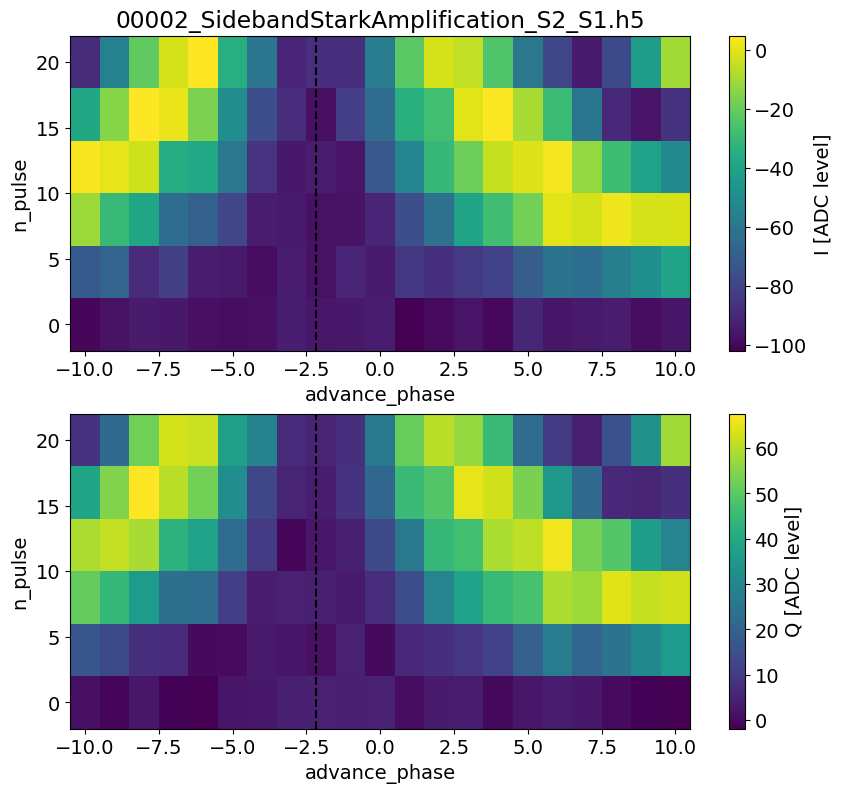

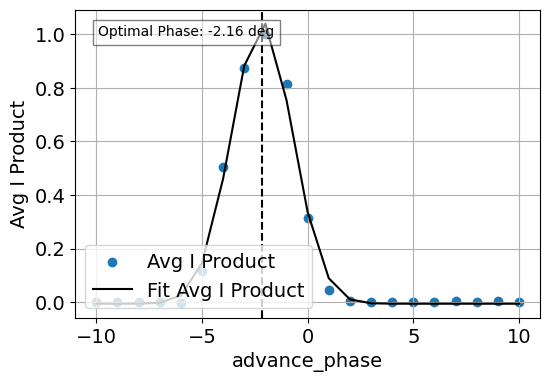

In [73]:
s.analyze()
fig, axs = s.display(fit=True)

## Quantum walk

Found local file /Users/wgz/Downloads/data/00028_SidebandScramble_S0_to_S0.h5
Fetching remote file 00003_SidebandScramble_S0_to_S1.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.
Connection closed.  


Fetching /D:/experiments/251031_qsim/data/00003_SidebandScramble_S0_to_S1.h5 to /Users/wgz/Downloads/data/00003_SidebandScramble_S0_to_S1.h5
Fetching remote file 00002_SidebandScramble_S0_to_S2.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.
Connection closed.  


Fetching /D:/experiments/251031_qsim/data/00002_SidebandScramble_S0_to_S2.h5 to /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S2.h5
Fetching remote file 00003_SidebandScramble_S0_to_S3.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.


Fetching /D:/experiments/251031_qsim/data/00003_SidebandScramble_S0_to_S3.h5 to /Users/wgz/Downloads/data/00003_SidebandScramble_S0_to_S3.h5


Connection closed.  


Text(0, 0.5, 'avgi')

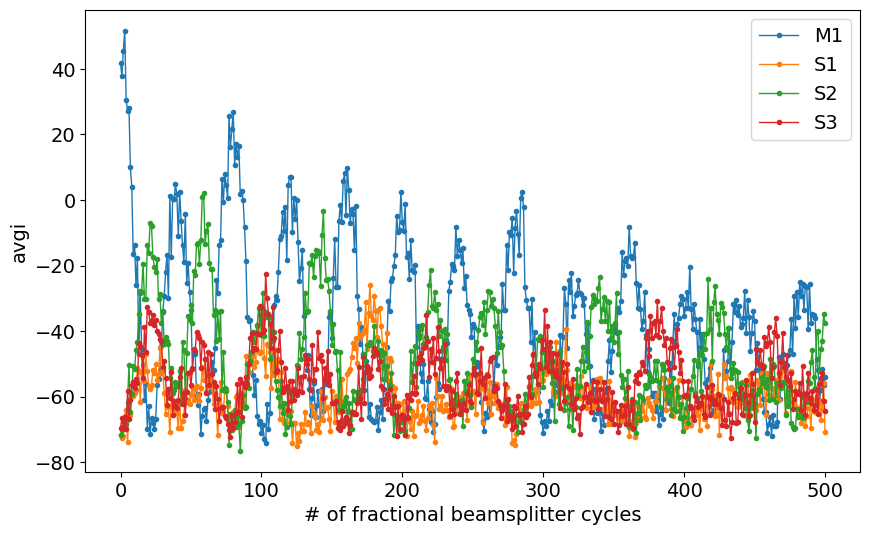

In [16]:
fname = ensure_local_file(remote_path, local_path, '00028_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(expt_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='M1')

fname = ensure_local_file(remote_path, local_path, '00003_SidebandScramble_S0_to_S1.h5')
temp_data, attrs = prev_data(expt_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S1')

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S2.h5')
temp_data, attrs = prev_data(expt_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S2')

fname = ensure_local_file(remote_path, local_path, '00003_SidebandScramble_S0_to_S3.h5')
temp_data, attrs = prev_data(expt_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S3')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

Text(0, 0.5, 'avgi')

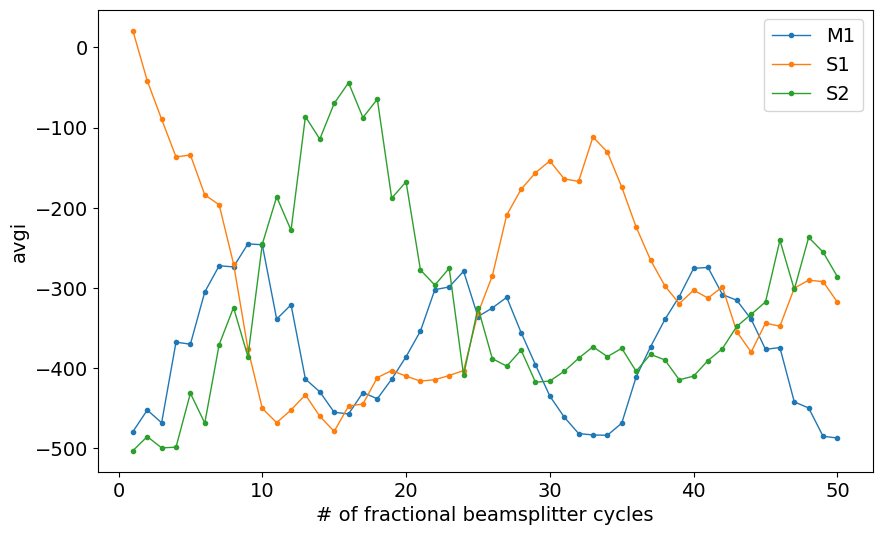

In [ ]:


temp_data, attrs = prev_data(expt_path, f'00036_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='M1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S2')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

In [21]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [9]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data'

In [ ]:
temp_data, attrs = prev_data(expt_path, f'00004_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='M1')
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S1')
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S2')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/0.62, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,200)

Text(0, 0.5, 'avgi')

### 3 site

In [23]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

update phase: false

Text(0, 0.5, 'avgi')

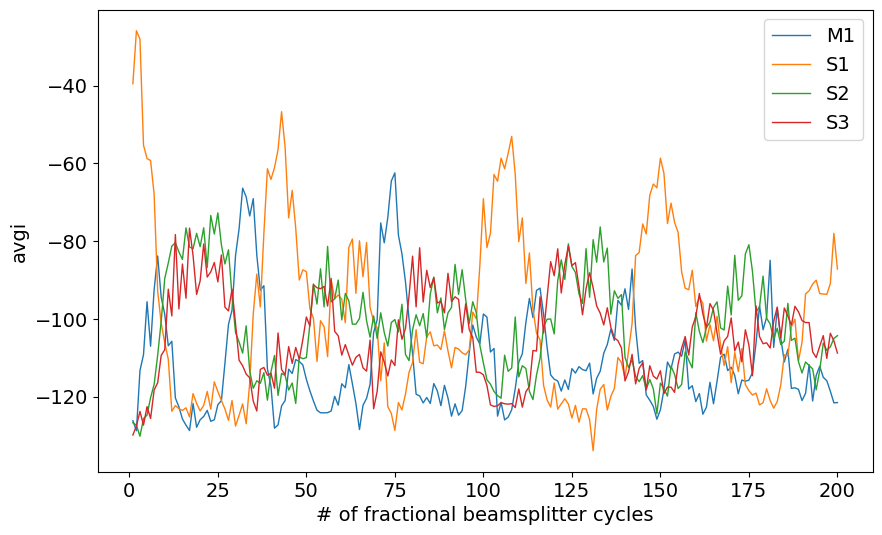

In [25]:
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00007_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S1')
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S1_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S6.h5
Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S7.h5


Text(0, 0.5, 'avgi')

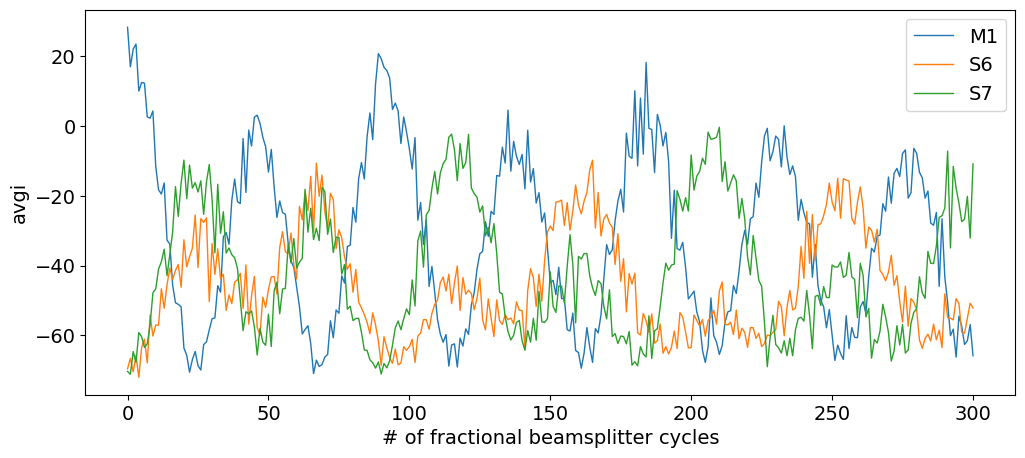

In [25]:
plt.figure(figsize=(12,5))

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S6.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S6')

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S7.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')
plt.legend() 
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

Found local file /Users/wgz/Downloads/data/00000_SidebandScramble_S[6, 7]_to_S0.h5
Found local file /Users/wgz/Downloads/data/00000_SidebandScramble_S[6, 7]_to_S6.h5
Found local file /Users/wgz/Downloads/data/00000_SidebandScramble_S[6, 7]_to_S7.h5


Text(0, 0.5, 'avgi')

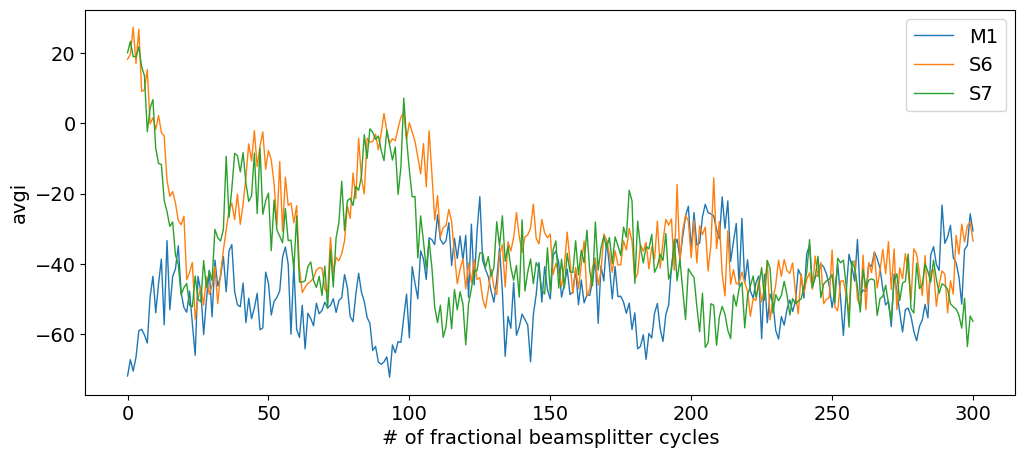

In [29]:
plt.figure(figsize=(12,5))

fname = ensure_local_file(remote_path, local_path, '00000_SidebandScramble_S[6, 7]_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')

fname = ensure_local_file(remote_path, local_path, '00000_SidebandScramble_S[6, 7]_to_S6.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S6')

fname = ensure_local_file(remote_path, local_path, '00000_SidebandScramble_S[6, 7]_to_S7.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')
plt.legend() 
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

Found local file /Users/wgz/Downloads/data/00000_SidebandScramble_S0_to_S1.h5


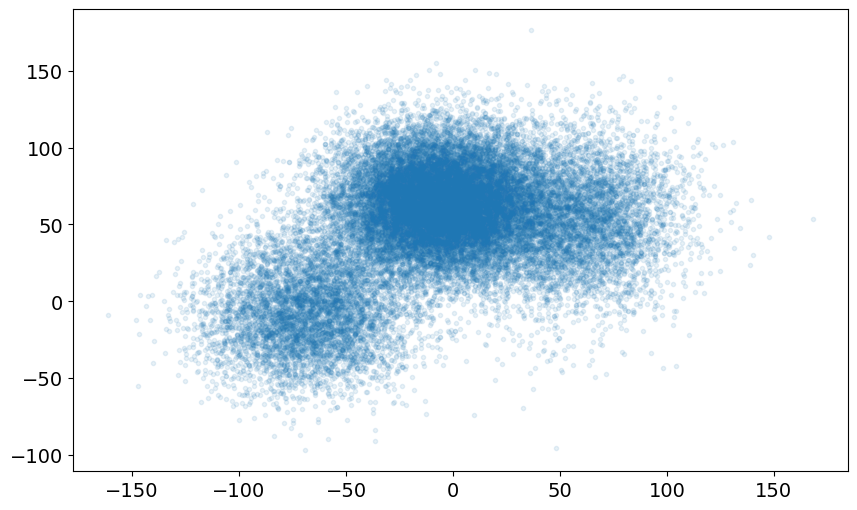

In [19]:
fname = ensure_local_file(remote_path, local_path, '00000_SidebandScramble_S0_to_S1.h5')
temp_data, attrs = prev_data(local_path, fname)
idata, qdata = temp_data['idata'], temp_data['qdata']
plt.scatter(idata, qdata, marker='.', alpha=0.1) 

Found local file /Users/wgz/Downloads/data/00000_SidebandScramble_S[6, 7]_to_S6.h5
Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S6.h5


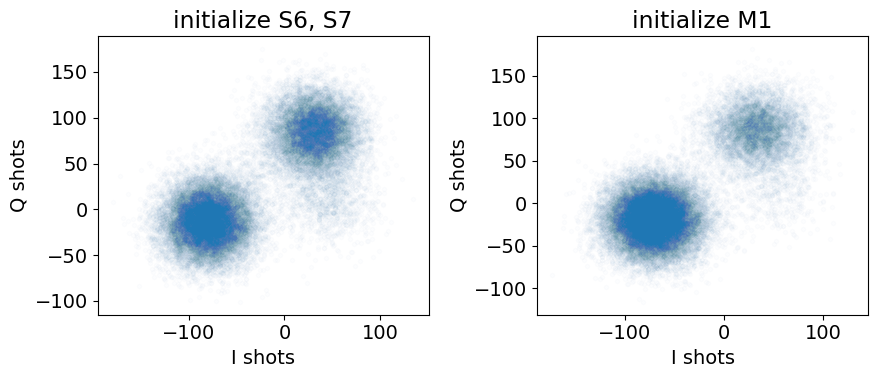

In [62]:

fig, axs = plt.subplots(figsize=(9,4), nrows=1, ncols=2)

fname = ensure_local_file(remote_path, local_path, '00000_SidebandScramble_S[6, 7]_to_S6.h5')
temp_data, attrs = prev_data(local_path, fname)
idata, qdata = temp_data['idata'], temp_data['qdata']
axs[0].scatter(idata, qdata, marker='.', alpha=0.01) 

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S6.h5')

temp_data, attrs = prev_data(local_path, fname)
idata, qdata = temp_data['idata'], temp_data['qdata']
axs[1].scatter(idata, qdata, marker='.', alpha=0.01) 
axs[0].set_title('initialize S6, S7')
axs[1].set_title('initialize M1')

for ax in axs:
    ax.set_xlabel('I shots')
    ax.set_ylabel('Q shots')
    
plt.tight_layout()

Found local file /Users/wgz/Downloads/data/00000_FloquetCalibration_S6_to_S3.h5
Found local file /Users/wgz/Downloads/data/00000_FloquetCalibration_S6_to_S7.h5


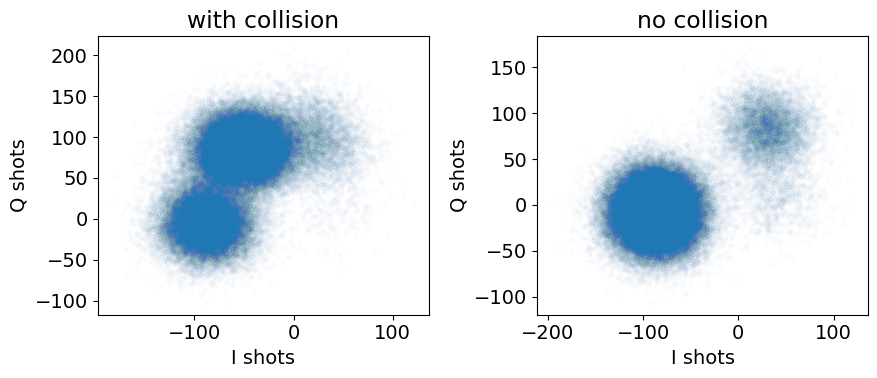

In [ ]:
fig, axs = plt.subplots(figsize=(9,4), nrows=1, ncols=2)

fname = ensure_local_file(remote_path, local_path, '00000_FloquetCalibration_S6_to_S3.h5')
temp_data, attrs = prev_data(local_path, fname)
idata, qdata = temp_data['idata'], temp_data['qdata']
axs[0].scatter(idata, qdata, marker='.', alpha=0.01, label='with collision') 

fname = ensure_local_file(remote_path, local_path, '00000_FloquetCalibration_S6_to_S7.h5')

temp_data, attrs = prev_data(local_path, fname)
idata, qdata = temp_data['idata'], temp_data['qdata']
axs[1].scatter(idata, qdata, marker='.', alpha=0.01, label='no collision') 
axs[0].set_title('with collision')
axs[1].set_title('no collision')

for ax in axs:
    ax.set_xlabel('I shots')
    ax.set_ylabel('Q shots')
    
plt.tight_layout()

Found local file /Users/wgz/Downloads/data/00000_FloquetCalibration_S6_to_S3.h5
Found local file /Users/wgz/Downloads/data/00000_FloquetCalibration_S6_to_S7.h5


Text(0, 0.5, 'avgq')

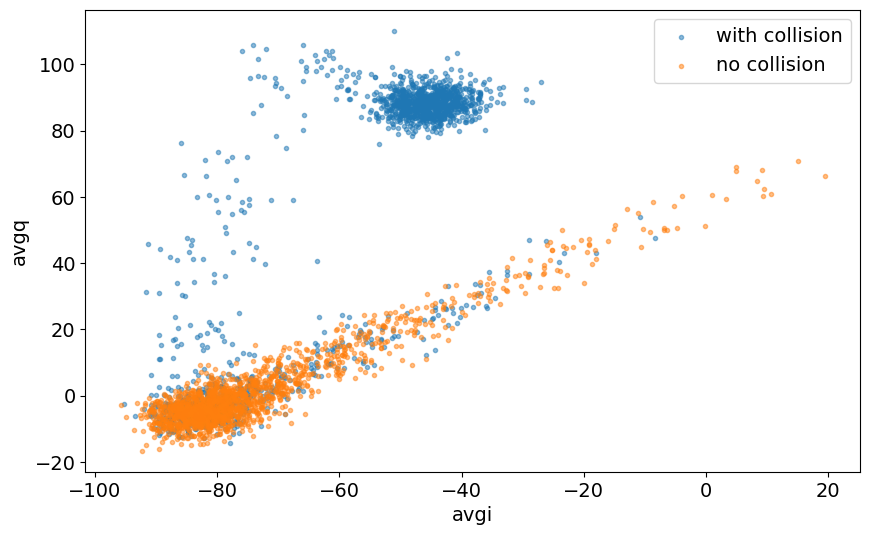

In [42]:
fname = ensure_local_file(remote_path, local_path, '00000_FloquetCalibration_S6_to_S3.h5')
temp_data, attrs = prev_data(local_path, fname)
avgi, avgq = temp_data['avgi'], temp_data['avgq']
plt.scatter(avgi, avgq, marker='.', alpha=0.5, label='with collision') 

fname = ensure_local_file(remote_path, local_path, '00000_FloquetCalibration_S6_to_S7.h5')
temp_data, attrs = prev_data(local_path, fname)
avgi, avgq = temp_data['avgi'], temp_data['avgq']
plt.scatter(avgi, avgq, marker='.', alpha=0.5, label='no collision') 

plt.legend()
plt.xlabel('avgi')
plt.ylabel('avgq')

### Compare decay with $T_1$

(0.0, 200.0)

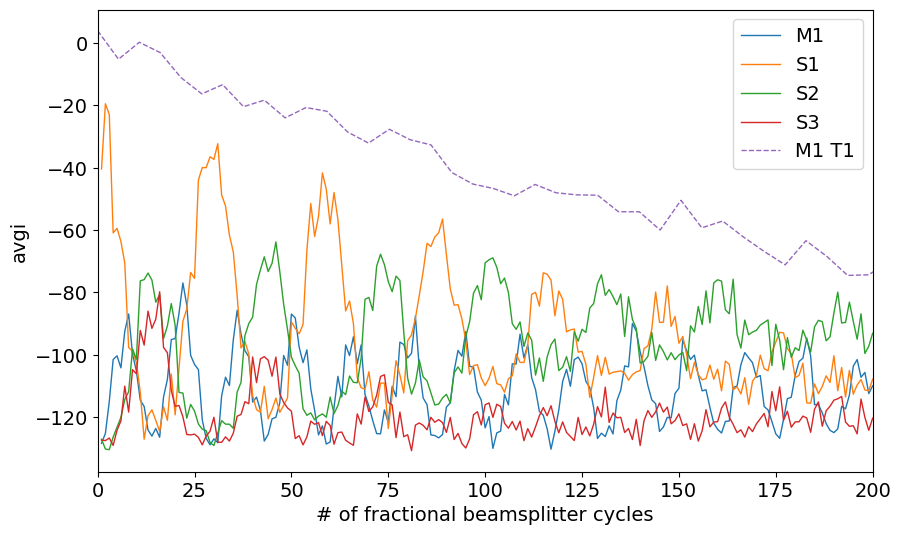

In [26]:
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00008_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S1')
temp_data, attrs = prev_data(expt_path, f'00007_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/0.93, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,200)

Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S6.h5
Found local file /Users/wgz/Downloads/data/00002_SidebandScramble_S0_to_S7.h5
Found local file /Users/wgz/Downloads/data/00001_StorageT1_S0.h5


(0.0, 300.0)

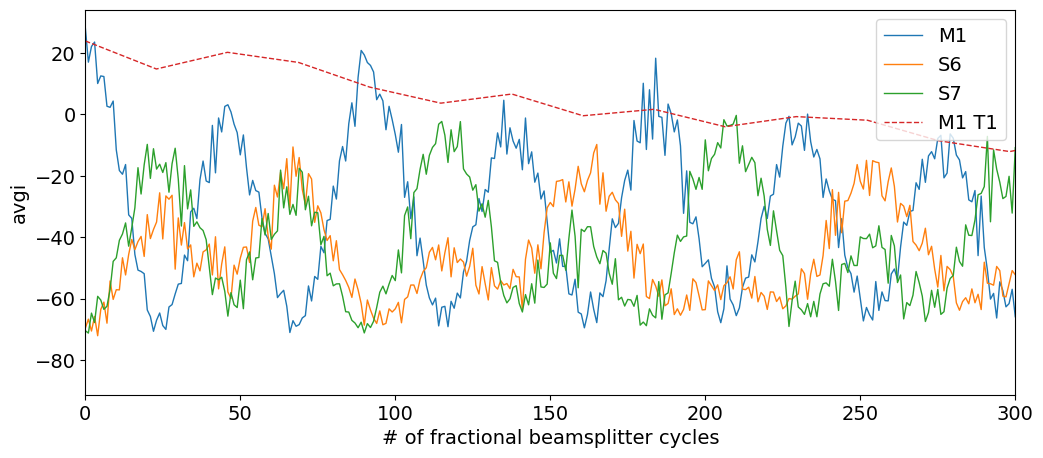

In [23]:
plt.figure(figsize=(12,5))

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S6.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S6')

fname = ensure_local_file(remote_path, local_path, '00002_SidebandScramble_S0_to_S7.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

fname = ensure_local_file(remote_path, local_path, '00001_StorageT1_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts']/0.218, temp_data['avgi']+20, lw=1, ls='--', label='M1 T1')
plt.legend() 
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,300)

S2 S3 S7 using pi/12, -pi/12 err amp

(0.0, 100.0)

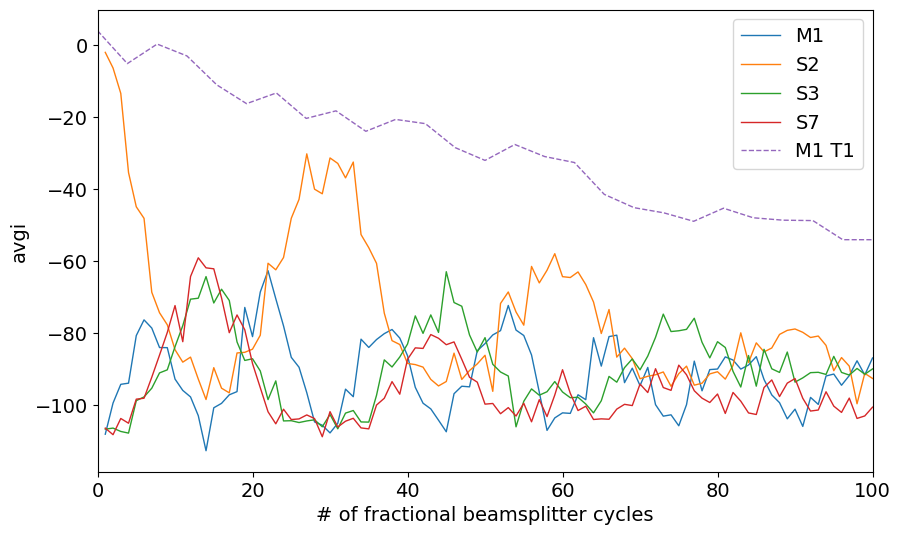

In [75]:
temp_data, attrs = prev_data(expt_path, f'00002_SidebandScramble_S2_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00002_SidebandScramble_S2_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S2_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S2_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

S2 S3 S7 using 2D err amp

(0.0, 100.0)

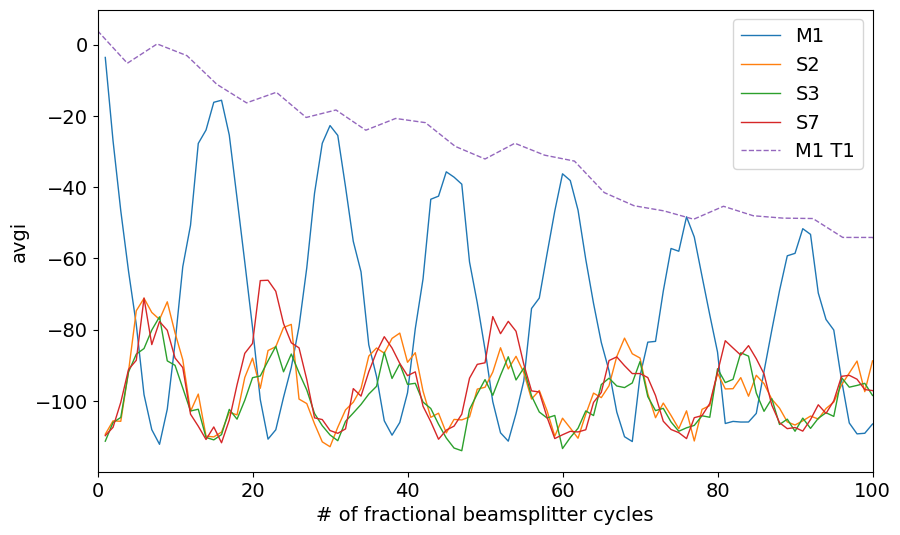

In [82]:
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

(0.0, 100.0)

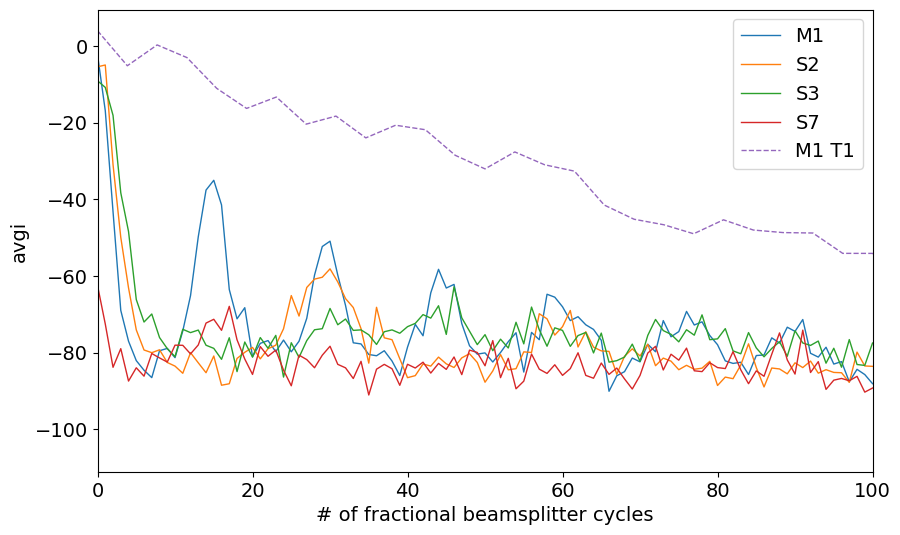

In [90]:
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S[2, 3, 0]_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S[2, 3, 0]_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00004_SidebandScramble_S[2, 3, 0]_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00003_SidebandScramble_S[2, 3, 0]_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

S2 S3 S7 no phase update

(0.0, 100.0)

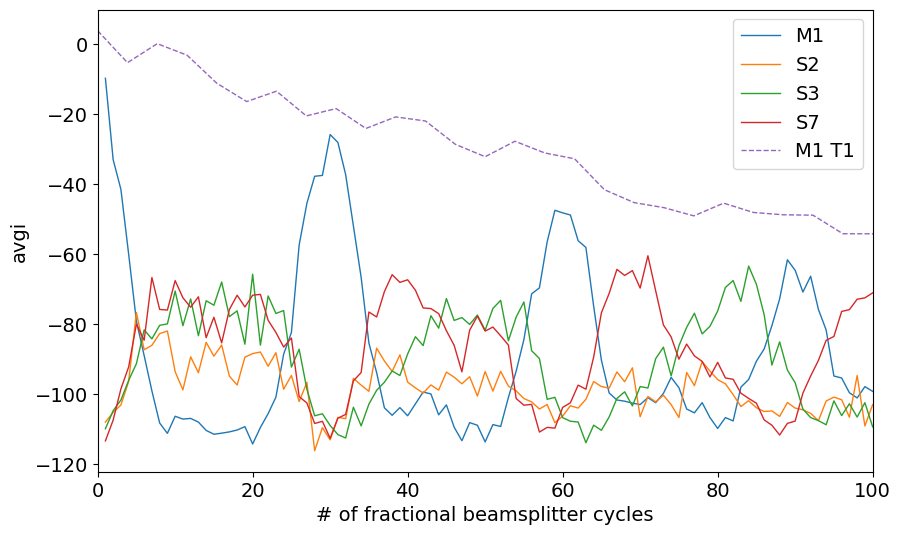

In [84]:
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

In [ ]:

plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

### 2 site varying phase

In [ ]:
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment

In [46]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'QsimBaseExperiment' object has no attribute 'im'


(<Figure size 1000x900 with 4 Axes>,
 array([<Axes: title={'center': '00010_SidebandScramble_S1_to_S2.h5'}, xlabel='floquet_cycle', ylabel='advance_phase'>,
        <Axes: xlabel='floquet_cycle', ylabel='advance_phase'>],
       dtype=object))

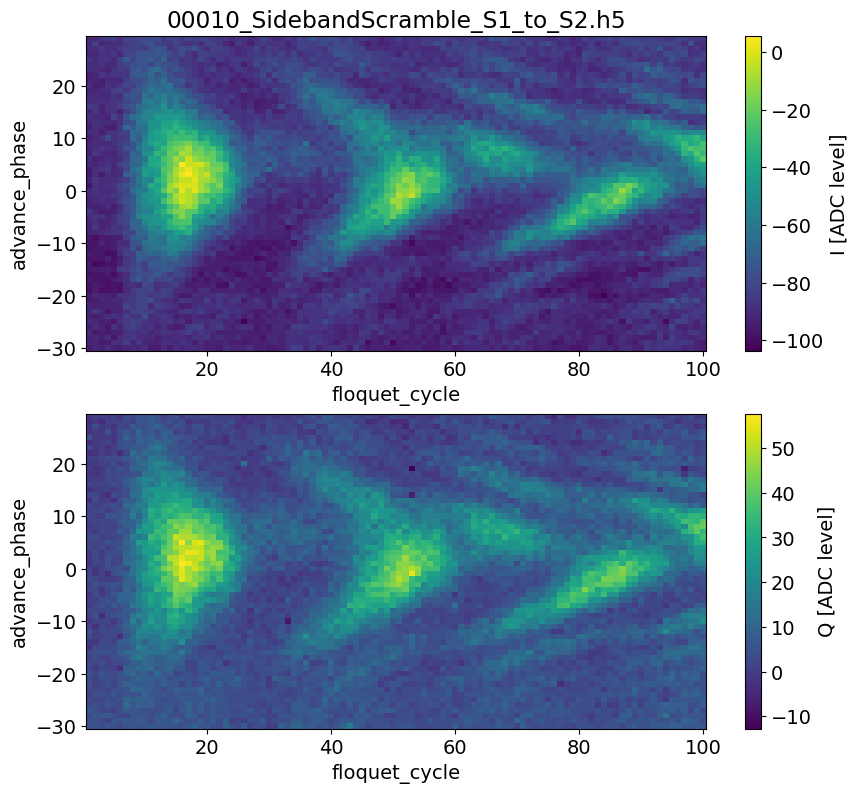

In [109]:
s = QsimBaseExperiment(path=expt_path, config_file='00010_SidebandScramble_S1_to_S2.h5')
s.data = s.load_data(s.datafile(read_mode=True))
s.display()

### storA storB phase error amp

In [14]:
from multimode_expts.experiments.qsim.sideband_scramble import FloquetCalibrationAmplificationExperiment

In [15]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [38]:
fnames = [
    '00008_FloquetCalibrationAmplificationExperiment_S1_S2.h5',
    '00002_FloquetCalibrationAmplificationExperiment_S2_S3.h5',
    '00003_FloquetCalibrationAmplificationExperiment_S1_S3.h5',
    '00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5',
    '00000_FloquetCalibrationAmplificationExperiment_S3_S7.h5',
]

In [50]:
s = FloquetCalibrationAmplificationExperiment(path=expt_path, config_file=fnames[3])
s.data = s.load_data(s.datafile(read_mode=True))

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'FloquetCalibrationAmplificationExperiment' object has no attribute 'im'


Found local file /Users/wgz/Downloads/data/00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5


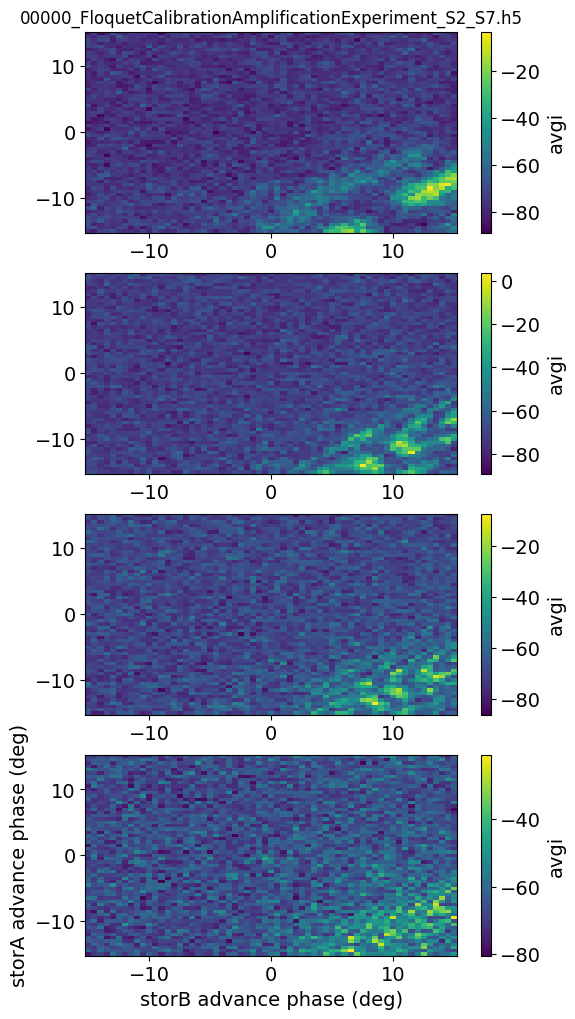

(<Figure size 600x1200 with 8 Axes>,
 array([<Axes: title={'center': '00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5'}>,
        <Axes: >, <Axes: >,
        <Axes: xlabel='storB advance phase (deg)', ylabel='storA advance phase (deg)'>],
       dtype=object))

In [24]:
fname = ensure_local_file(remote_path, local_path, '00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5')
s = FloquetCalibrationAmplificationExperiment.from_h5file(fname)
s.display()

fitparams [0.02187046112936525, 0.06997861638935654, 12.5, 3.0]
fitparams [0.022645514303638495, 0.075329663930605, -10.0, 3.0]
x center: 13.051520 (err: 0.525349)
y center: -11.873730 (err: 0.417604)


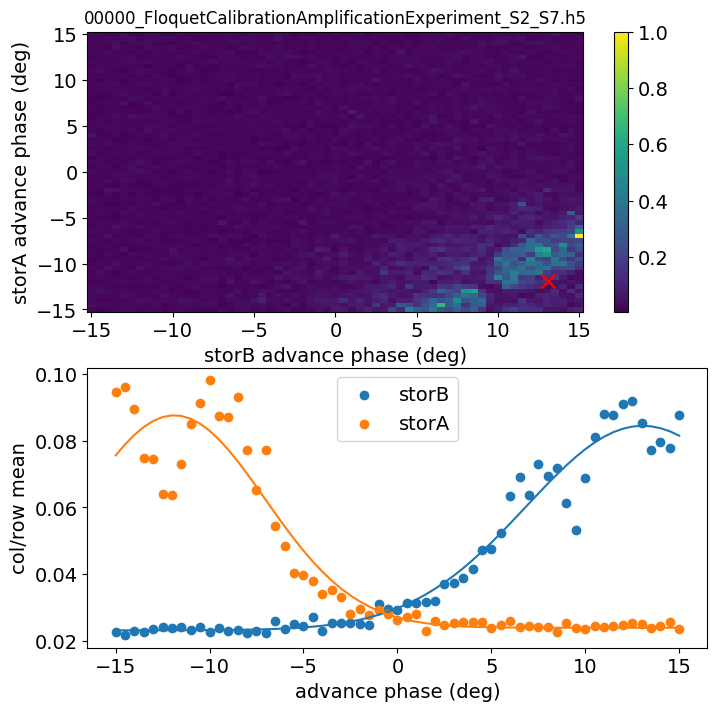

In [25]:
s.analyze(state_fin='e', fit_model='sg')

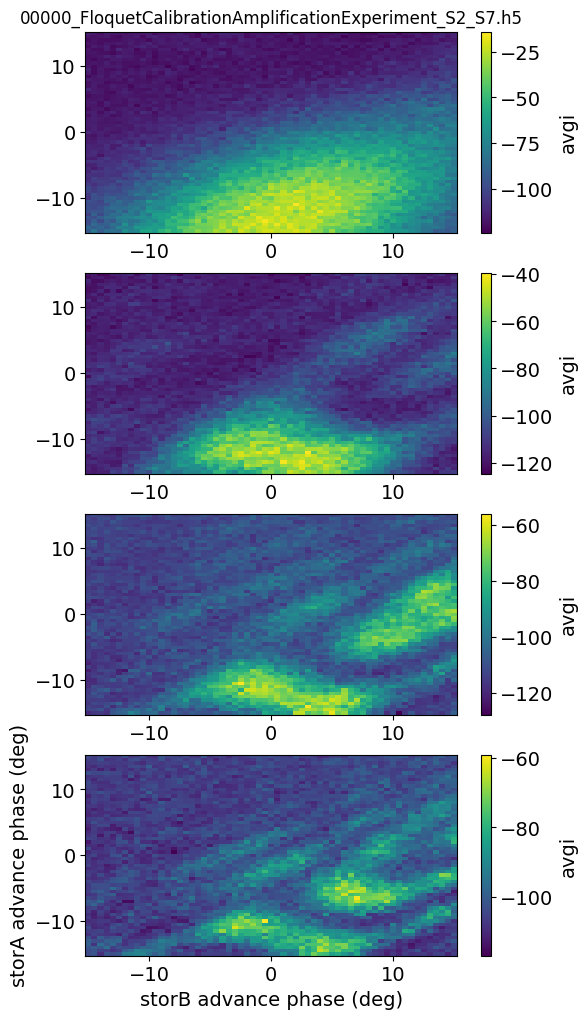

In [54]:
fig, axs = s.display()
axs[0].scatter([s.data['xproj_popts'][2]], [s.data['yproj_popts'][2]], marker='x', color='r', s=100)


In [ ]:
temp_data, attrs = prev_data(expt_path, f'00008_FloquetCalibrationAmplificationExperiment_S1_S2.h5')

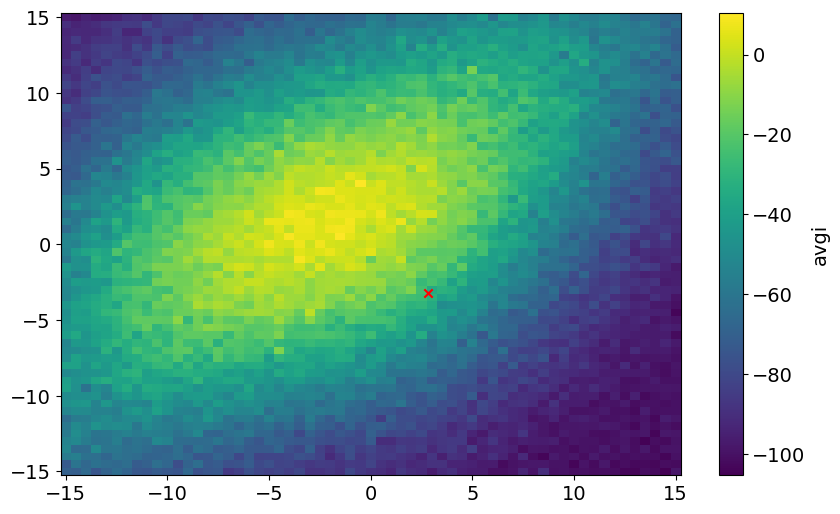

In [ ]:
plt.pcolormesh(temp_data['xpts'][0], temp_data['ypts'][0], temp_data['avgi'][0])
plt.colorbar(label='avgi')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.scatter([2.8],[-3.2], marker='x', color='r')

# Kerr eng

## peak spacing

In [14]:
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths

In [13]:
spacings = []
for line in temp_data['avgi']:
    peaks, _ = find_peaks(line)
    if len(peaks) >= 2:
        spacings.append(np.diff(peaks)[0])

NameError: name 'temp_data' is not defined

In [14]:


# --- model: constant baseline + two Gaussians ---
def two_gauss(x, muBar, muDelta, A1, s1, A2, s2, c):
    g = lambda A, mu, s: A * np.exp(-0.5 * ((x - mu) / s)**2)
    return g(A1, muBar - muDelta/2, s1) + g(A2, muBar + muDelta/2, s2) + c

def fit_line(y):
    x = np.arange(len(y)).astype(float)

    # crude baseline guess
    c0 = np.median(y)

    # peak-based initial guesses
    peaks, _ = find_peaks(y, distance=15, prominence=20)
    if len(peaks) < 2:
        peaks = np.argsort(y)[-2:]  # fallback: top-2 points
    p1, p2 = np.sort(peaks[:2])
    muBguess, muDguess = (p1 + p2) / 2, abs(p2 - p1)

    # width guess from peak widths (fallback to 10% of length)
    try:
        w = peak_widths(y, peaks, rel_height=0.5)[0].mean()
        s0 = max(w / (2*np.sqrt(2*np.log(2))), 1e-3)
    except Exception:
        s0 = max(0.1 * len(y), 1.0)

    A10, A20 = max(y[p1]-c0, 1e-6), max(y[p2]-c0, 1e-6)
    p0 = [muBguess, muDguess, A10, s0, A20, s0, c0]

    # bounds: amplitudes ≥0, centers within x, widths >0, baseline free
    lb = [0, 0, 0.01*A10, 0, 1e-3*A20, 0, -np.inf]
    ub = [x[-1], x[-1], 10*A10, len(x)/2, 10*A20, len(x)/2, np.inf]

    popt, _ = curve_fit(two_gauss, x, y, p0=p0, bounds=(lb, ub), maxfev=20000)

    # sort peaks by center
    # A1, mu1, s1, A2, mu2, s2, c = popt
    # if mu1 > mu2:
    #     mu1, mu2 = mu2, mu1

    # return mu1, mu2, abs(mu2 - mu1)

    return popt 

# Example for a 2D array `data` (rows = lines):
spacings, centers = [], []
fit_data = []
for y in temp_data['avgi'][:,:60]:
    popt = fit_line(y)
    fit_data.append(two_gauss(np.arange(len(y)), *popt))
    spacings.append(popt[1])
    centers.append(popt[0])


fit_data = np.array(fit_data)
spacings = np.array(spacings)
plt.pcolormesh(fit_data)

NameError: name 'temp_data' is not defined

Text(0, 0.5, 'Additional Ramsey rate (MHz)')

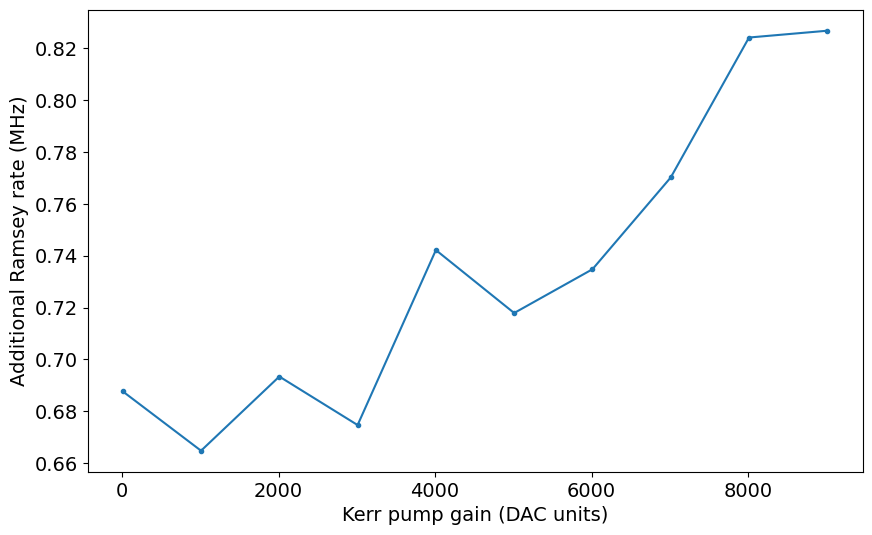

In [35]:
plt.plot(temp_data['ypts'], 1/spacings/0.02-1, marker='.')
plt.xlabel('Kerr pump gain (DAC units)')
plt.ylabel('Additional Ramsey rate (MHz)')

In [36]:
spacings_39 = spacings

In [30]:
spacings_40 = spacings

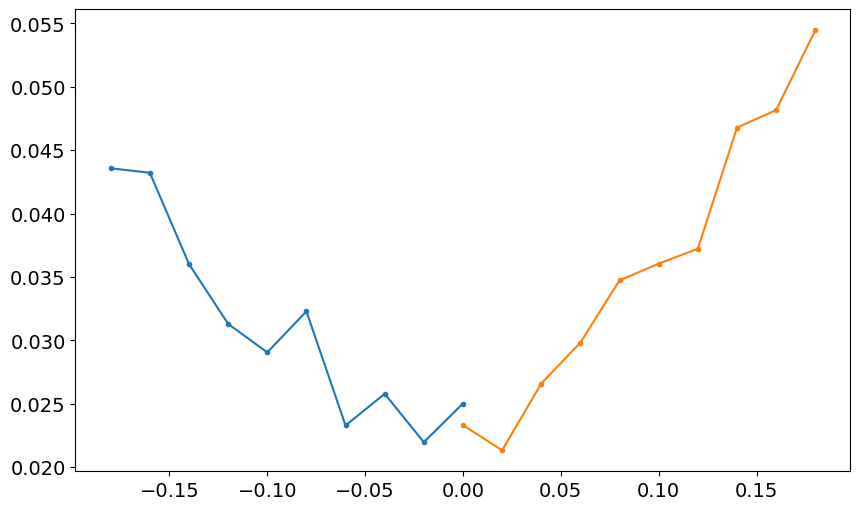

In [41]:
plt.plot(-np.arange(len(spacings_39))/50, 1/spacings_39/0.15-0.2, marker='.', label='expt 39')
plt.plot(np.arange(len(spacings_40))/50, 1/spacings_40/0.15-0.2, marker='.', label='expt 40')

## fitting

In [12]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

In [13]:
from fitting.fit_display_classes import RamseyFitting

class KerrRamseySweepFitting(RamseyFitting):

    def __init__(self, data, readout_per_round=None, threshold=None, config=None, fitparams=None):
        super().__init__(data, readout_per_round, threshold, config)
        self.fitparams = fitparams
        self.results = {}

    def analyze(self, data=None, fit=True, fitparams=None, **kwargs):
        
        def linear_model(n, T, t0):
            return T * n + t0  

        if data is None:
            data = self.data

        if not fit: return

        gain_to_alpha = self.cfg.device.manipulate.gain_to_alpha[0]
        x = data['xpts']
        y = data['ypts']
        print('gain_to_alpha', gain_to_alpha)
        alpha_list = gain_to_alpha * y

        g_z = data['avgi']
        # g_z = data['g_avgi']
        # e_z = data['e_avgi']
        g_norm = np.zeros_like(g_z)
        # e_norm = np.zeros_like(e_z)
        pop_norms = [g_norm] #, e_norm]
        omega_vec = np.zeros((len(g_z), 2))
        t0_vec = np.zeros((len(g_z), 2))
        # gain_to_plot_e = np.array([])
        gain_to_plot_g = np.array([])
        gain_to_plot = [gain_to_plot_g]

        # Fit omega_e and omega_g versus alpha_list**2
        x_fit = alpha_list**2

        time_peak_g = []
        # time_peak_e = []
        time_peaks = [time_peak_g] #, time_peak_e]
        for i_gain in range(len(y)):
            for i_pop, data_set in enumerate([g_z]):
                # distinguish e and g here and play with the peak distance parameter
                _pop = data_set[i_gain]
                if i_pop == 0:
                    _pop_norm = (_pop - np.min(_pop)) / (np.max(_pop) - np.min(_pop))
                else: 
                    _pop_norm = (_pop - np.max(_pop)) / (np.min(_pop) - np.max(_pop))
                pop_norm = pop_norms[i_pop]
                pop_norm[i_gain] = _pop_norm

                signal_smooth = gaussian_filter1d(pop_norm[i_gain], sigma=1.5)
                # Calculate adaptive thresholds
                peak_height = (np.max(signal_smooth) - np.min(signal_smooth)) * 0.5 + np.min(signal_smooth)
                peak_prominence = (np.max(signal_smooth) - np.min(signal_smooth)) * 0.2
                # ax.axhline(peak_height, color='r', linestyle='--', label='Peak Height Threshold')
                # ax.axhline(peak_prominence, color='g', linestyle='--', label='Peak Prominence Threshold')
                if i_gain == 0:
                    peak_distance = None
                # Find peaks
                peaks, props = find_peaks(
                    signal_smooth,
                    height=peak_height,
                    prominence=peak_prominence,
                    distance=peak_distance
                )
                print(peaks)
                peak_distance=np.mean(np.diff(peaks)*0.5)

                # ax.plot(x[peaks], signal_smooth[peaks], "x", label='Detected Peaks')

                if len(peaks) >= 2:
                    n = np.arange(len(peaks))
                    popt, _ = curve_fit(linear_model, n, x[peaks])
                    T_fit, t0_fit = popt
                    omega_fit = 2 * np.pi / T_fit
                    time_peaks[i_pop].append(x[peaks])
                else:
                    # Not enough peaks to perform a fit
                    popt = [np.nan, np.nan]  # or some default/fallback behavior
                    omega_fit = np.nan

                omega_vec[i_gain, i_pop] = omega_fit
                t0_vec[i_gain, i_pop] = t0_fit

                if omega_fit is not np.nan:
                    gain_to_plot[i_pop] = np.append(gain_to_plot[i_pop], y[i_gain])


        # Now get the fitted kerr and chi values

        # deltaf_e = omega_vec[:, 1] / (2 * np.pi) - self.cfg.expt.ramsey_freq
        deltaf_g = omega_vec[:, 0] / (2 * np.pi) - self.cfg.expt.ramsey_freq

        # Mask out invalid (NaN/inf) data
        valid_g = np.isfinite(deltaf_g) & np.isfinite(x_fit)
        # valid_e = np.isfinite(deltaf_e) & np.isfinite(x_fit)

        # Initialize fit variables
        popt_g = [np.nan, np.nan]
        # popt_e = [np.nan, np.nan]
        Kerr = chi = chi2 = detuning_g = np.nan
        Kerr_err = chi_err = chi2_err = detuning_g_err = np.nan

        # Fit ground state
        if np.sum(valid_g) >= 2:
            popt_g, pcov_g = curve_fit(lambda n, T, t0: linear_model(n, T, t0), x_fit[valid_g], deltaf_g[valid_g])
            detuning_g = popt_g[1]
            Kerr = -popt_g[0] 
            perr_g = np.sqrt(np.diag(pcov_g))
            Kerr_err = perr_g[0] 
            detuning_g_err = perr_g[1]

            # Fit excited state
            # if self.cfg.expt.do_g_and_e:
            #     popt_e, pcov_e = curve_fit(lambda n, T, t0: linear_model(n, T, t0), x_fit[valid_e], deltaf_e[valid_e])
            #     perr_e = np.sqrt(np.diag(pcov_e))
            #     chi = -(popt_e[1] - detuning_g)
            #     chi2 = -0.5 * (popt_e[0] + Kerr)
            #     chi_err = np.sqrt(perr_e[1]**2 + detuning_g_err**2)
            #     chi2_err = 0.5 * np.sqrt(perr_e[0]**2 + perr_g[0]**2)

        # Store results
        self.results['omega'] = omega_vec
        self.results['t0'] = t0_vec

        data['g_omega'] = omega_vec[:, 0]
        data['g_t0'] = t0_vec[:, 0]
        data['e_omega'] = omega_vec[:, 1]
        data['e_t0'] = t0_vec[:, 1]
        data['g_norm'] = g_norm
        # data['e_norm'] = e_norm
        data['alpha_list'] = alpha_list
        data['time_peak_g'] = time_peaks[0]
        # data['time_peak_e'] = time_peaks[1]
        data['detuning_g'] = detuning_g
        data['detuning_g_err'] = detuning_g_err
        data['Kerr'] = Kerr
        data['Kerr_err'] = Kerr_err
        # if self.cfg.expt.do_g_and_e:
        #     data['chi'] = chi
        #     data['chi2'] = chi2
        #     data['chi_err'] = chi_err
        #     data['chi2_err'] = chi2_err
        data['gain_to_plot_g'] = gain_to_plot[0]
        # data['gain_to_plot_e'] = gain_to_plot[1]


    def display(self, data=None, fit=True, vline=None, save_fig=False, title_str='CavityRamseyGainSweep', **kwargs):
        if data is None: 
            data = self.data

        x = data['xpts']
        y = data['ypts']

        if True:  #not self.cfg.expt.do_g_and_e:
            z = data['avgi']
            fig, ax = plt.subplots(figsize=(8, 6))
            c = ax.pcolormesh(x, y, z, shading='auto', cmap='viridis')
            ax.set_title('Cavity Ramsey Gain Sweep')
            ax.set_xlabel('Wait Time [us]')
            ax.set_ylabel('Gain')
            fig.colorbar(c, ax=ax, label='I [a.u.]')

        else:
            fig, ax = plt.subplots(2, 1, figsize=(8, 8))

            c = ax[0].pcolormesh(x, y, data['g_avgi'], shading='auto', cmap='viridis')
            ax[0].set_xlabel('Wait Time [us]')
            ax[0].set_ylabel('Gain for Ground State')
            fig.colorbar(c, ax=ax[0], label='I [a.u.]')
            c2 = ax[1].pcolormesh(x, y, data['e_avgi'], shading='auto', cmap='viridis')
            ax[1].set_xlabel('Wait Time [us]')
            ax[1].set_ylabel('Gain for Excited State')
            fig.colorbar(c2, ax=ax[1], label='I [a.u.]')

        if fit:
            g_omega = data['g_omega']
            g_t0 = data['g_t0']
            e_omega = data['e_omega']
            e_t0 = data['e_t0']
            g_norm = data['g_norm']
            # e_norm = data['e_norm']
            alpha_list = data['alpha_list']
            y_plot_g = data['gain_to_plot_g']
            # y_plot_e = data['gain_to_plot_e']
            time_peak_g = data['time_peak_g']
            # if self.cfg.expt.do_g_and_e:
            #     time_peak_e = data['time_peak_e']

            # add the peaks dots to the plots
            for i in range(len(y)):
                if False: # self.cfg.expt.do_g_and_e:
                    [ax[0].plot(time_peak_g[i][j], y_plot_g[i], 'ro', markerfacecolor='white',
                        markeredgecolor='black', alpha=0.7) for j in range(len(time_peak_g[i]))]
                    [ax[1].plot(time_peak_e[i][j], y_plot_e[i], 'ro', markerfacecolor='white',
                        markeredgecolor='black', alpha=0.7) for j in range(len(time_peak_e[i]))]
                else:
                    [ax.plot(time_peak_g[i][j], y_plot_g[i], 'ro', markerfacecolor='white',
                        markeredgecolor='black', alpha=0.7) for j in range(len(time_peak_g[i]))]
            
            fig4, ax4 = plt.subplots(1, 1, figsize=(5, 5))
            if False: # self.cfg.expt.do_g_and_e:
                e_omega = data['e_omega']
                g_omega = data['g_omega']
                alpha_list = data['alpha_list']
                detuning_g = data['detuning_g']
                Kerr = data['Kerr']
                chi = data['chi']
                chi2 = data['chi2']
                Kerr_err = data['Kerr_err']
                chi_err = data['chi_err']
                chi2_err = data['chi2_err']
                detuning_g_err = data['detuning_g_err']
                deltaf_e = e_omega/2/np.pi - self.cfg.expt.ramsey_freq
                deltaf_g = g_omega/2/np.pi - self.cfg.expt.ramsey_freq

                deltaf_g_th = detuning_g - Kerr * alpha_list**2
                deltaf_e_th = (detuning_g - chi) - 2*alpha_list**2*(chi2 + Kerr/2)

                ax4.plot(alpha_list**2, deltaf_g, 'o', label='|g>')
                ax4.plot(alpha_list**2, deltaf_e, 'o', label='|e>')
                ax4.plot(alpha_list**2, deltaf_g_th, '-', color='black')
                ax4.plot(alpha_list**2, deltaf_e_th, '-', color='black')


                print(f'Kerr : {Kerr*1e3:.3f} +/- {Kerr_err*1e3:.3f} kHz')
                print(f'detuning Ground State: {detuning_g*1e3:.3f} +/- {detuning_g_err*1e3:.3f} kHz')
                print(f'Chi: {chi*1e3:.3f} +/- {chi_err*1e3:.3f} kHz')
                print(f'Chi2: {chi2*1e3:.3f} +/- {chi2_err*1e3:.3f} kHz')
                text = f'$K_c$: {Kerr*1e3:.3f} +/- {Kerr_err*1e3:.3f} kHz\n' \
                       f'$\Delta$: {detuning_g*1e3:.3f} +/- {detuning_g_err*1e3:.3f} kHz\n' \
                       f'$\chi$: {chi*1e3:.3f} +/- {chi_err*1e3:.3f} kHz\n' \
                       f'$\chi_2$: {chi2*1e3:.3f} +/- {chi2_err*1e3:.3f} kHz'
                ax4.text(0.05, 0.95, text, transform=ax4.transAxes, fontsize=12,
                         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

            else:
                omega_vec = data['g_omega']
                alpha_list = data['alpha_list']
                Kerr = data['Kerr']
                detuning_g = data['detuning_g']
                Kerr_err = data['Kerr_err']
                detuning_g_err = data['detuning_g_err']
                deltaf_g = omega_vec/2/np.pi - self.cfg.expt.ramsey_freq
                ax4.plot(alpha_list**2, deltaf_g, 'o', label='Ground State')
                deltaf_g_th = detuning_g - 2*Kerr * alpha_list**2
                ax4.plot(alpha_list**2, deltaf_g_th, '-', label='Ground State Theory')
                text = f'$K_c$: {Kerr*1e3:.3f} +/- {Kerr_err*1e3:.3f} kHz\n' \
                        f'$\Delta$: {detuning_g*1e3:.3f} +/- {detuning_g_err*1e3:.3f} kHz'
                print(f'Kerr : {Kerr*1e3:.3f} +/- {Kerr_err*1e3:.3f} kHz')
                print(f'detuning Ground State: {detuning_g*1e3:.3f} +/- {detuning_g_err*1e3:.3f} kHz')   
            ax4.text(0.05, 0.95, text, transform=ax4.transAxes, fontsize=12,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

            ax4.set_xlabel(r'$|\alpha|^2$')
            ax4.set_ylabel('frequency [MHz]')
            ax4.legend(loc='center')

            if save_fig:
                filename = title_str.replace(' ', '_').replace(':', '') + '.png'
                fig.savefig(filename)
                print(f"Plot saved to {filename}")
                filename4 = title_str.replace(' ', '_').replace(':', '') + '_detuning.png'
                fig4.savefig(filename4)
                print(f"Fit plot saved to {filename4}")


gain_to_alpha 0.0007351777556463477
[17 52 84]
[18 52 85]
[17 52 85]
[17 51 86]
[16 52 85]
[16 51 85]
[17 51 85]
[17 50 84]
[17 50 84]
[16 50 84]
[16 50 84]
[16 50 83]
[16 49 83]
[16 49 82]
Kerr : -0.313 +/- 0.166 kHz
detuning Ground State: -5.156 +/- 1.431 kHz
gain_to_alpha 0.0007351777556463477
[16 52 89]
[17 52 87]
[16 51 87]
[17 51 85]
[17 51 84]
[17 51 86]
[16 51 86]
[16 51 85]
[17 51 84]
[16 51 84]
[16 49 83]
[16 49 83]
[16 50 82]
[16 49 82]
Kerr : -1.100 +/- 0.237 kHz
detuning Ground State: -13.318 +/- 2.041 kHz
gain_to_alpha 0.0007351777556463477
[18 52 85]
[17 51 85]
[19 51 84]
[18 51 86]
[17 51 84]
[17 51 84]
[17 50 84]
[16 49 83]
[17 50 83]
[17 49 83]
[16 49 83]
[16 49 82]
[16 49 83]
[16 49 81]
Kerr : -0.298 +/- 0.176 kHz
detuning Ground State: -2.081 +/- 1.521 kHz
gain_to_alpha 0.0007351777556463477
[17 51 85]
[16 51 84]
[17 50 83]
[16 50 84]
[16 50 83]
[16 50 83]
[16 50 83]
[17 49 83]
[16 49 83]
[16 50 82]
[16 49 81]
[16 49 81]
[16 48 80]
[16 49 80]
Kerr : -0.923 +/- 0.129

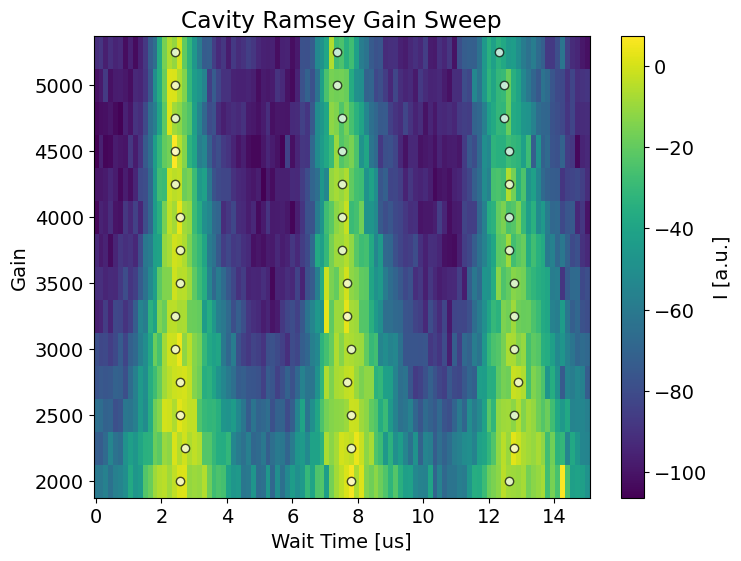

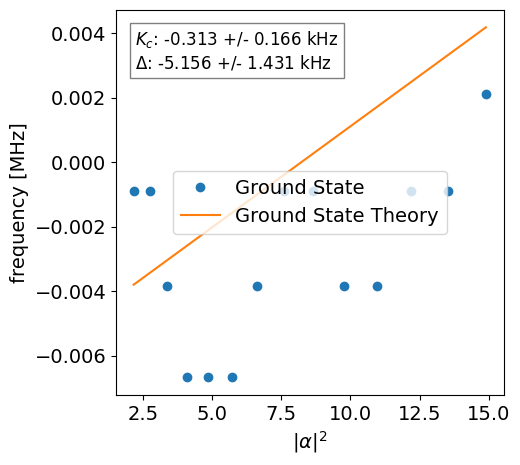

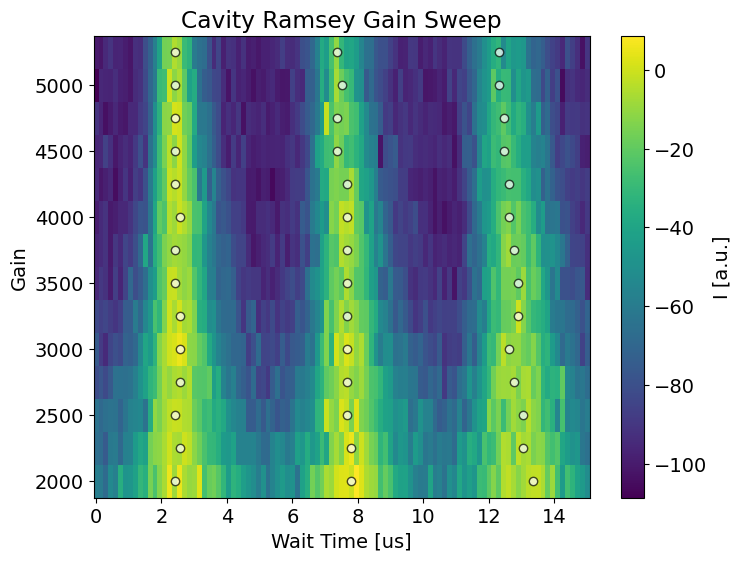

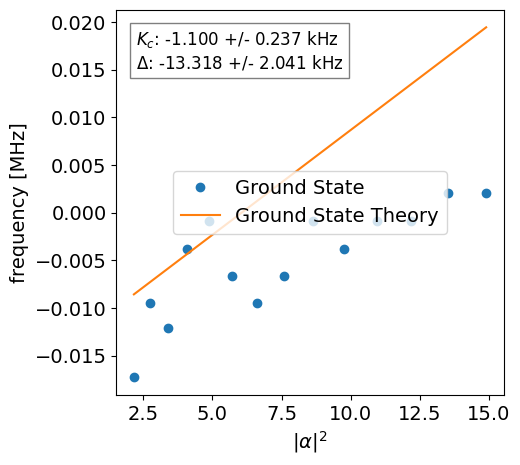

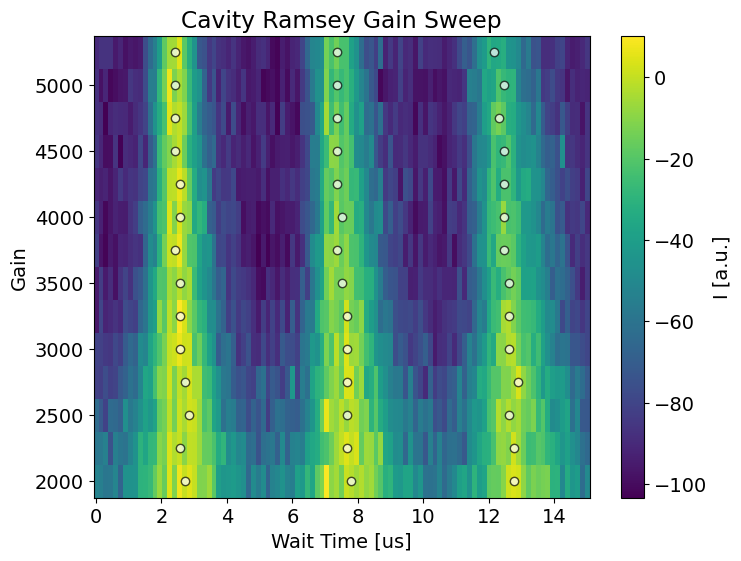

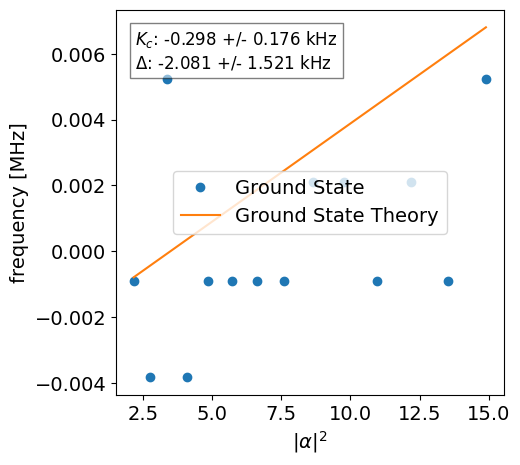

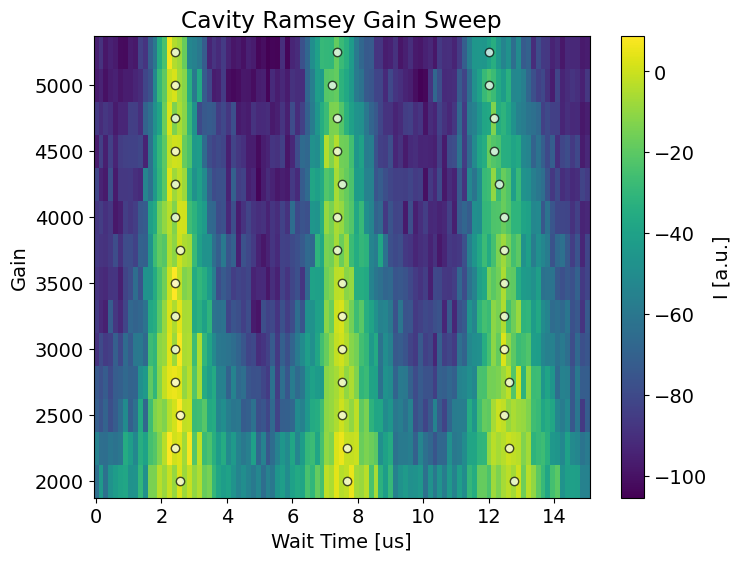

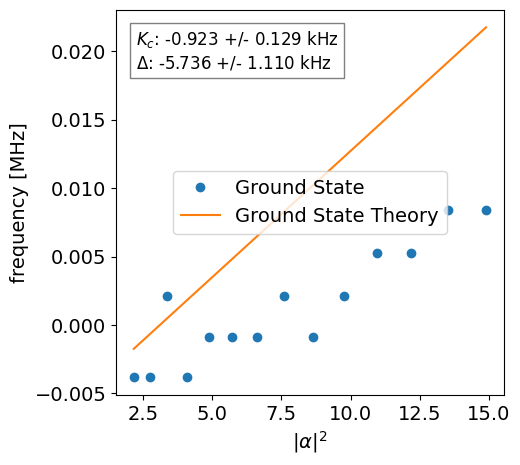

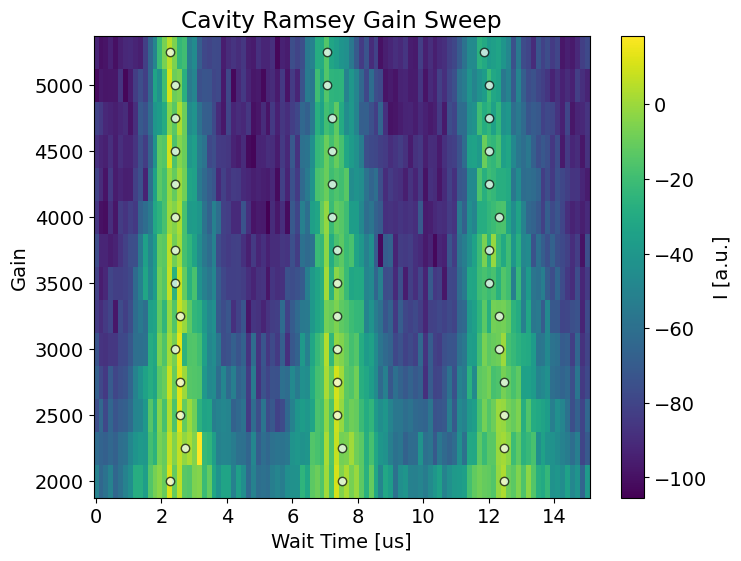

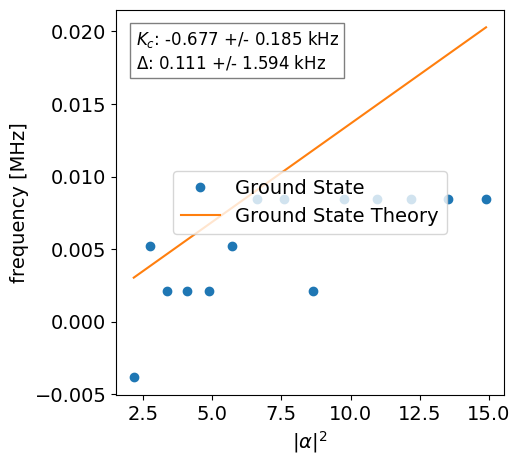

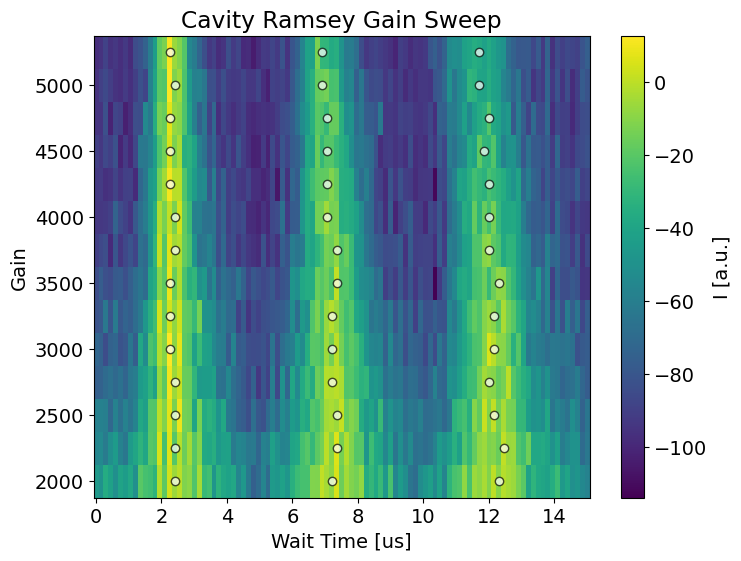

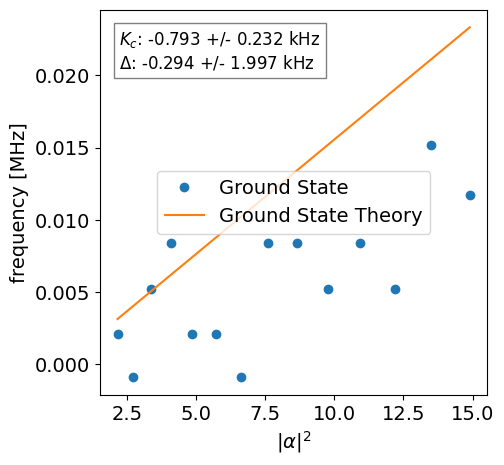

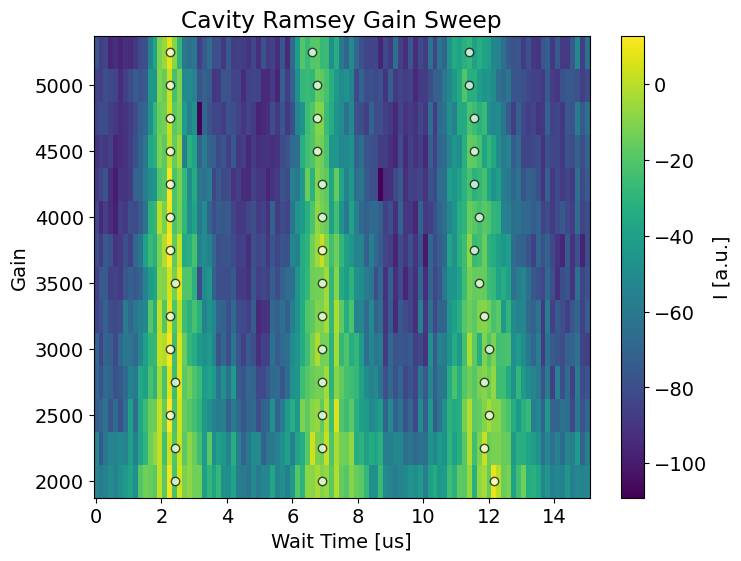

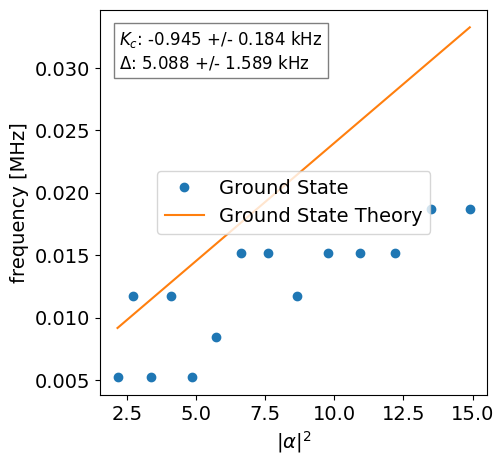

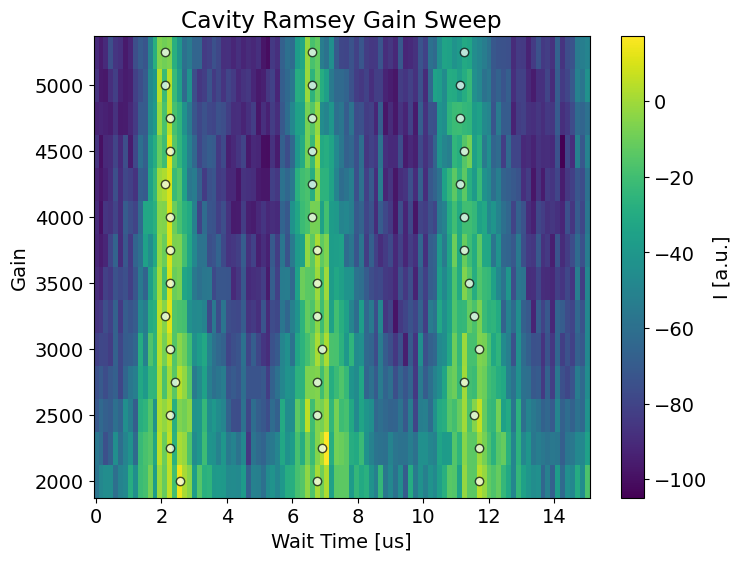

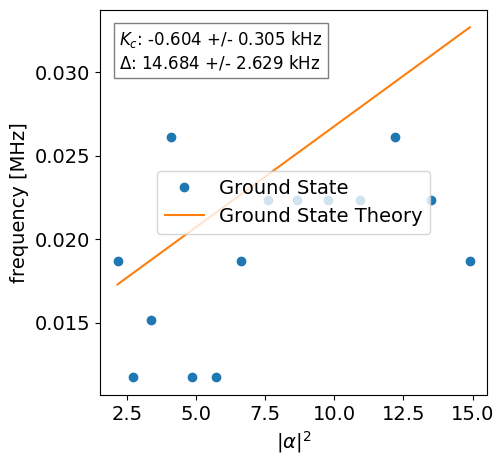

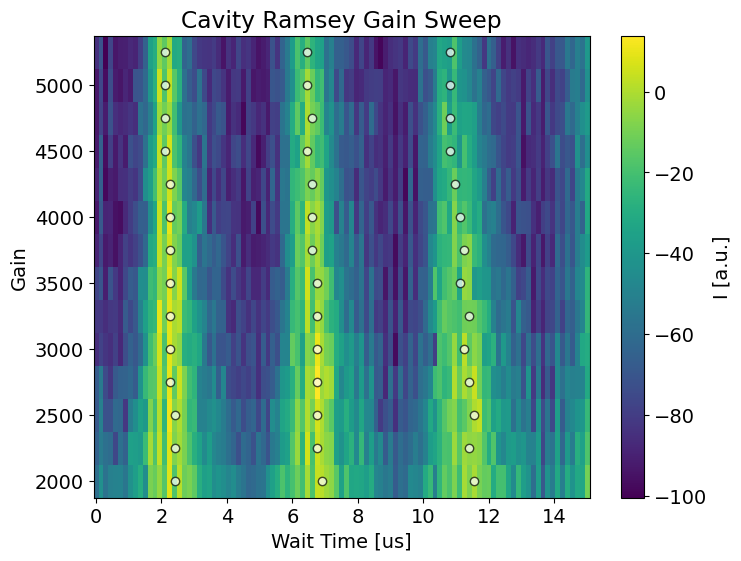

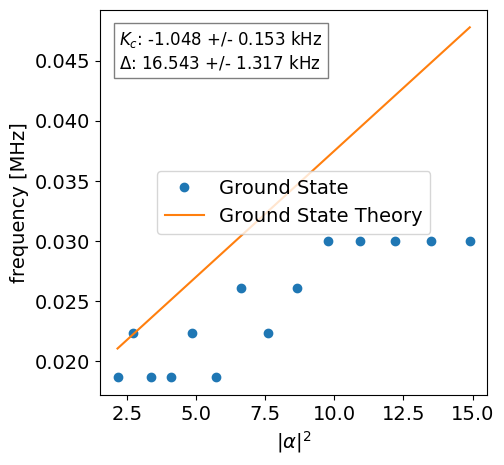

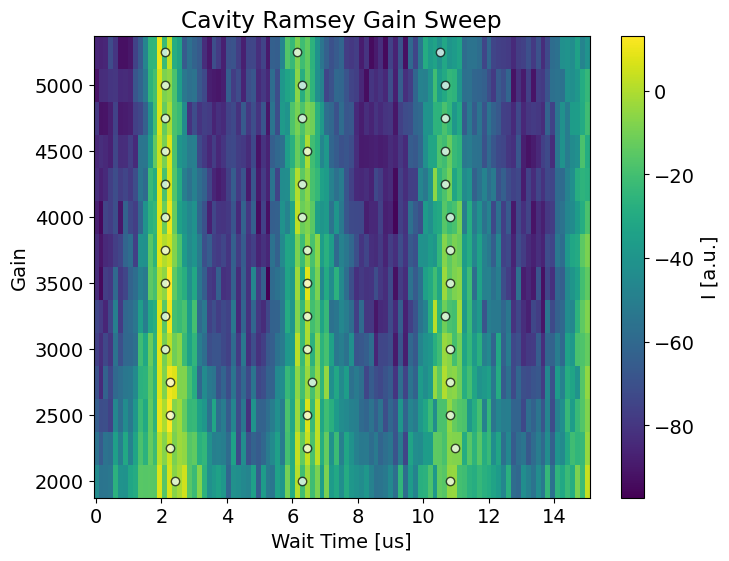

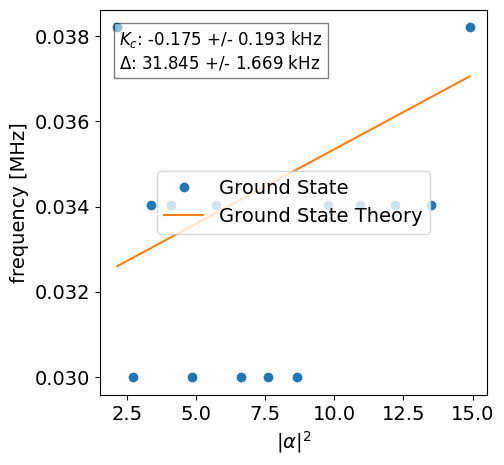

In [17]:
fts = []
for fid in range(67, 77):
    fname = f'000{fid:02d}_KerrRamseyExperiment.h5'
    d, attrs = prev_data(expt_path, fname)
    ft = KerrRamseySweepFitting(d, config=AttrDict(attrs['config']))
    ft.analyze()
    ft.display()
    fts.append(ft)

In [18]:
d['g_omega']

array([1.49669496, 1.44508479, 1.47043715, 1.47043715, 1.44508479,
       1.47043715, 1.44508479, 1.44508479, 1.44508479, 1.47043715,
       1.47043715, 1.47043715, 1.47043715, 1.49669496])

gain_to_alpha 0.0007351777556463477
[17 52 84]
[18 52 85]
[17 52 85]
[17 51 86]
[16 52 85]
[16 51 85]
[17 51 85]
[17 50 84]
[17 50 84]
[16 50 84]
[16 50 84]
[16 50 83]
[16 49 83]
[16 49 82]
Kerr : -0.313 +/- 0.166 kHz
detuning Ground State: -5.156 +/- 1.431 kHz


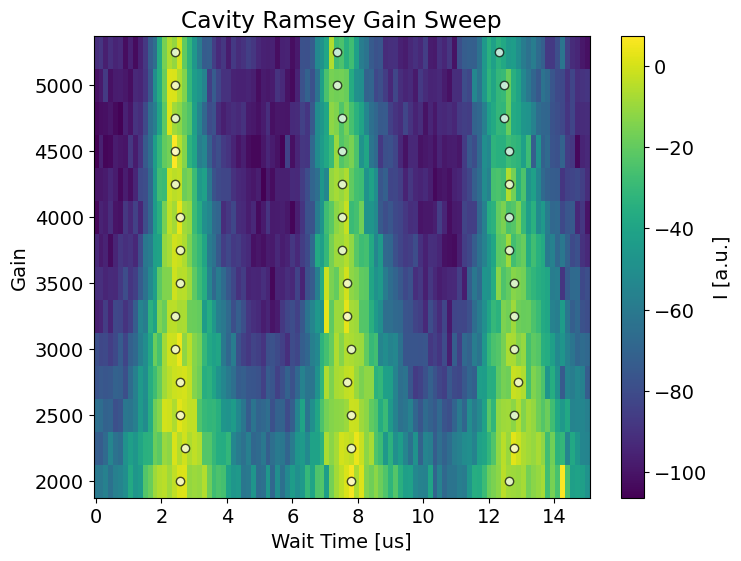

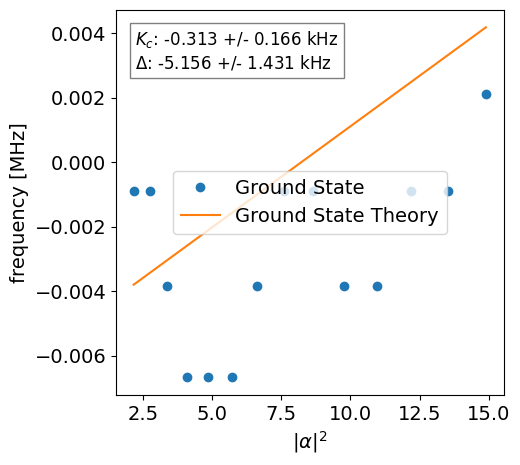

In [19]:
fname = f'00067_KerrRamseyExperiment.h5'
d, attrs = prev_data(expt_path, fname)
ft = KerrRamseySweepFitting(d, config=AttrDict(attrs['config']))
ft.analyze()
ft.display()

## refining peak

In [14]:
def estimate_periodicity(y, sampling_rate=1.0):
    # Compute FFT
    fft = np.fft.fft(y - np.mean(y))  # remove DC offset
    freqs = np.fft.fftfreq(len(y), d=1/sampling_rate)

    # Only take the positive frequencies
    pos_mask = freqs > 0
    freqs = freqs[pos_mask]
    power = np.abs(fft[pos_mask])

    # Find the dominant frequency
    dominant_freq = freqs[np.argmax(power)]

    # Convert frequency to period
    estimated_period = 1 / dominant_freq if dominant_freq != 0 else np.inf
    return estimated_period

In [ ]:
def estimate_and_find_peaks(x, y, debug=False):
    signal_smooth = gaussian_filter1d(y, sigma=2)

    # Calculate adaptive thresholds
    peak_height = (np.max(signal_smooth) - np.min(signal_smooth)) * 0.5 + np.min(signal_smooth)
    peak_prominence = (np.max(signal_smooth) - np.min(signal_smooth)) * 0.2
    peak_distance = estimate_periodicity(signal_smooth) * 0.2

    # Find peaks
    peaks, props = find_peaks(
        signal_smooth,
        height=peak_height,
        prominence=peak_prominence,
        distance=peak_distance
    )

    if debug:
        plt.plot(x, y)
        plt.plot(x, signal_smooth)
        plt.axhline(peak_height, color='r', linestyle='--', label='Peak Height Threshold')
        plt.fill_between(x, peak_height, peak_height+peak_prominence, color='g', alpha=0.2, label='Peak Prominence Threshold')
        plt.fill_betweenx([np.min(y), np.max(y)], x[0], x[int(peak_distance)], color='b', alpha=0.1, label='Peak Distance Threshold')
        for pind in peaks:
            plt.axvline(x[pind], color='k', linestyle='--', alpha=0.9)
        plt.legend()
        print(f'Peaks found at: {x[peaks]}')

    return peaks, props

In [16]:
from lmfit import Model, Parameters
from lmfit.models import GaussianModel, ConstantModel

def fit_three_gaussians_lmfit(y, peaks, x=None, pad=10, share_sigma=True):
    y = np.asarray(y)
    if x is None:
        x = np.arange(len(y))
    peaks = np.sort(np.asarray(peaks))

    # fit only a small window around the three peaks
    # lo = max(0, peaks[0] - pad)
    # hi = min(len(y), peaks[-1] + pad + 1)
    # xfit, yfit = x[lo:hi], y[lo:hi]
    xfit, yfit = x, y
    baseline0 = np.median(yfit)

    # build model: g1 + g2 + g3 + constant
    g1 = GaussianModel(prefix='g1_')
    g2 = GaussianModel(prefix='g2_')
    g3 = GaussianModel(prefix='g3_')
    c  = ConstantModel(prefix='c_')
    model = g1 + g2 + g3 + c

    # initial guesses
    m0 = x[peaks]
    sep = np.diff(m0).mean() if len(m0) > 1 else max(3, (x[-1]-x[0]) / 20)
    s_guess = max(sep/6.0, np.diff(x).mean()*1.0)

    params = Parameters()
    params.update(g1.make_params(amplitude=max(y[peaks[0]]-baseline0, 1e-6), center=m0[0], sigma=s_guess))
    params.update(g2.make_params(amplitude=max(y[peaks[1]]-baseline0, 1e-6), center=m0[1], sigma=s_guess))
    params.update(g3.make_params(amplitude=max(y[peaks[2]]-baseline0, 1e-6), center=m0[2], sigma=s_guess))
    params.update(c.make_params(c=baseline0))

    # keep each center in its own region (stable + fast)
    mid12 = (m0[0] + m0[1]) / 2
    mid23 = (m0[1] + m0[2]) / 2
    eps = 0.25 * sep  # slack

    params['g1_center'].set(min=m0[0]-eps, max=mid12+eps)
    params['g2_center'].set(min=m0[1]-eps, max=mid23+eps)
    params['g3_center'].set(min=m0[2]-eps, max=m0[2]+eps)

    # sensible bounds for widths and amplitudes
    dx = np.diff(x).mean() if len(x) > 1 else 1.0
    for k in ('g1_sigma','g2_sigma','g3_sigma'):
        params[k].set(min=0.5*dx, max=sep)

    for k in ('g1_amplitude','g2_amplitude','g3_amplitude'):
        params[k].set(min=0.0)

    # share σ across all three if desired
    if share_sigma:
        params['g2_sigma'].set(expr='g1_sigma')
        params['g3_sigma'].set(expr='g1_sigma')

    # fit; you can add robust weights if needed: weights=1/np.maximum(1, np.abs(yfit - np.median(yfit)))
    result = model.fit(yfit, params, x=xfit, method='least_squares', nan_policy='omit', max_nfev=20000)

    centers = np.array([result.params['g1_center'].value,
                        result.params['g2_center'].value,
                        result.params['g3_center'].value])
    centers_err = np.array([result.params['g1_center'].stderr,
                            result.params['g2_center'].stderr,
                            result.params['g3_center'].stderr])

    sigmas = np.array([result.params['g1_sigma'].value,
                       result.params['g2_sigma'].value,
                       result.params['g3_sigma'].value])

    amps = np.array([result.params['g1_amplitude'].value,
                     result.params['g2_amplitude'].value,
                     result.params['g3_amplitude'].value])

    baseline = result.params['c_c'].value

    # sort by center just in case
    order = np.argsort(centers)
    return {
        'mu': centers[order],
        'mu_err': centers_err[order],
        'sigma': sigmas[order],
        'A': amps[order],
        'baseline': baseline,
        'result': result,  # full lmfit Result (has .best_fit, .fit_report(), etc.)
    }

In [21]:
def extract_kerr_delta(x, y, z, attrs, plot=False, debug=False):

    if plot:
        fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,12))

    all_peaks = []
    all_fits = []
    for yind in range(len(y)):
        zline = z[yind]
        peaks, props = estimate_and_find_peaks(x, zline)
        if len(peaks) == 3:
            res = fit_three_gaussians_lmfit(zline, peaks, share_sigma=True)
            all_peaks.append(res['mu'])
            all_fits.append(res['result'].best_fit)
            if debug:
                print(f"yind={yind}: centers: {res['mu']}, ±1σ: {res['mu_err']}")
        else:
            print(f"yind={yind}: {len(peaks)} peaks found; skipping fit.")

    all_peaks = np.array(all_peaks)
    all_xs = all_peaks/len(x) * (x[-1]-x[0]) + x[0]

    if plot:
        for i in range(len(y)):
            axs[0,0].plot([0, 0.5, 1.5, 2.5], np.concatenate(([0], all_xs[i])), marker='o')
        axs[0,1].plot(y, np.array(all_peaks))

    slopes = []
    intercepts = []
    for i in range(len(y)):
        slope, intercept = np.polyfit([0, 0.5, 1.5, 2.5], np.concatenate(([0], all_xs[i])), 1)
        # slope, intercept = np.polyfit([0.5, 1.5, 2.5], all_xs[i], 1)
        slopes.append(slope)
        intercepts.append(intercept)
    slopes = np.array(slopes)
    intercepts = np.array(intercepts)
    
    if plot:
        axs[1,0].pcolormesh(x, y, z)
        axs[1,1].pcolormesh(x, y, np.array(all_fits))
        axs[2,0].plot(y, slopes)
        axs[2,1].plot(y, intercepts)

    fs = 1/slopes - attrs['config']['expt']['ramsey_freq']
    alphas = y * attrs['config']['device']['manipulate']['gain_to_alpha'][0]

    kerr, delta = 2*np.pi*np.polyfit(alphas**2, fs, 1)

    if plot:
        plt.figure()
        plt.plot(alphas**2, kerr*alphas**2 + delta, ls='--')
        plt.plot(alphas**2, fs*2*np.pi, marker='o')
        plt.legend([f'Kerr: {kerr*1e3:.3f} kHz, delta: {delta*1e3:.3f} kHz'])

    return kerr, delta, fs, alphas
    

In [89]:
d, attrs = prev_data(expt_path, f'00144_KerrRamseyExperiment.h5')

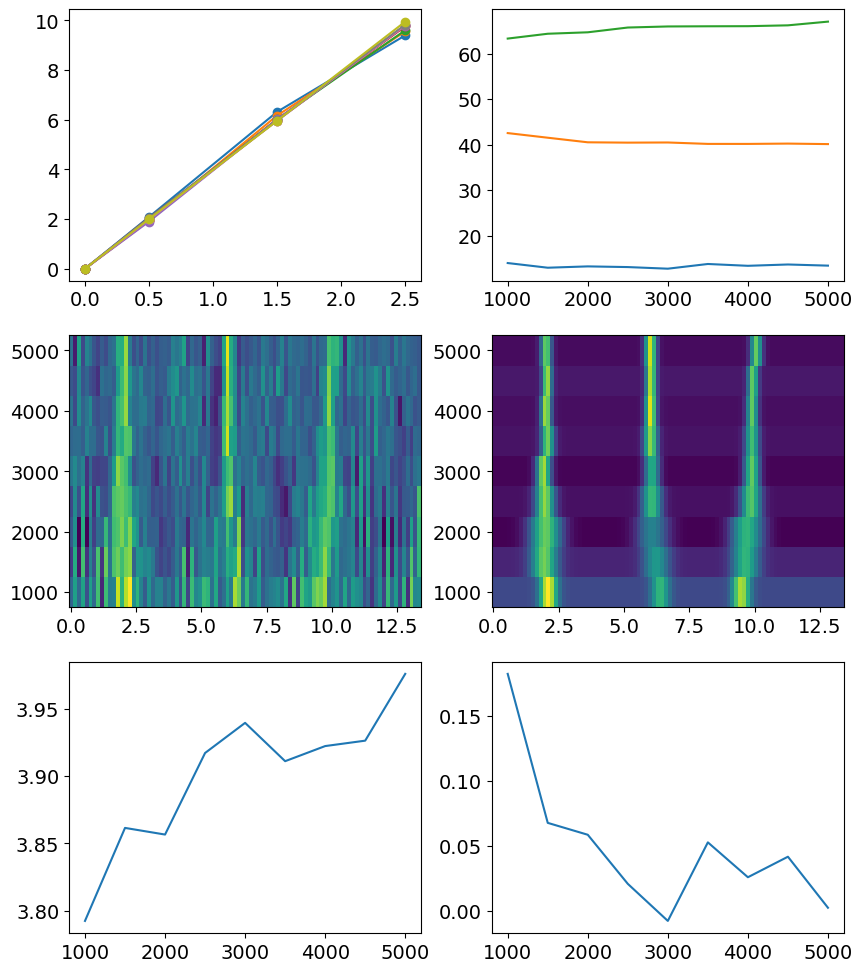

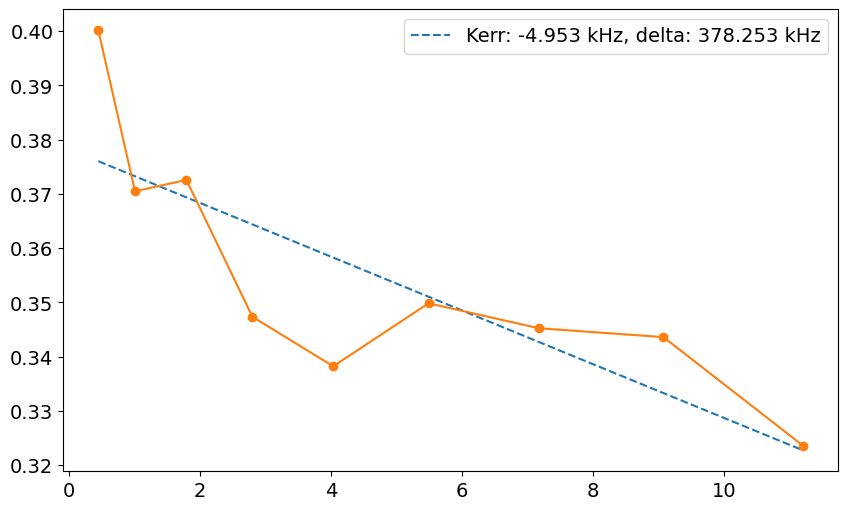

In [90]:
x = d['xpts'][:90]
y = d['ypts'][:9]
z = d['avgi'][:9,:90]
kerr, delta, fs, alphas = extract_kerr_delta(x, y, z, attrs, debug=False, plot=True)

In [91]:
d, attrs = prev_data(expt_path, f'00138_KerrRamseyExperiment.h5')

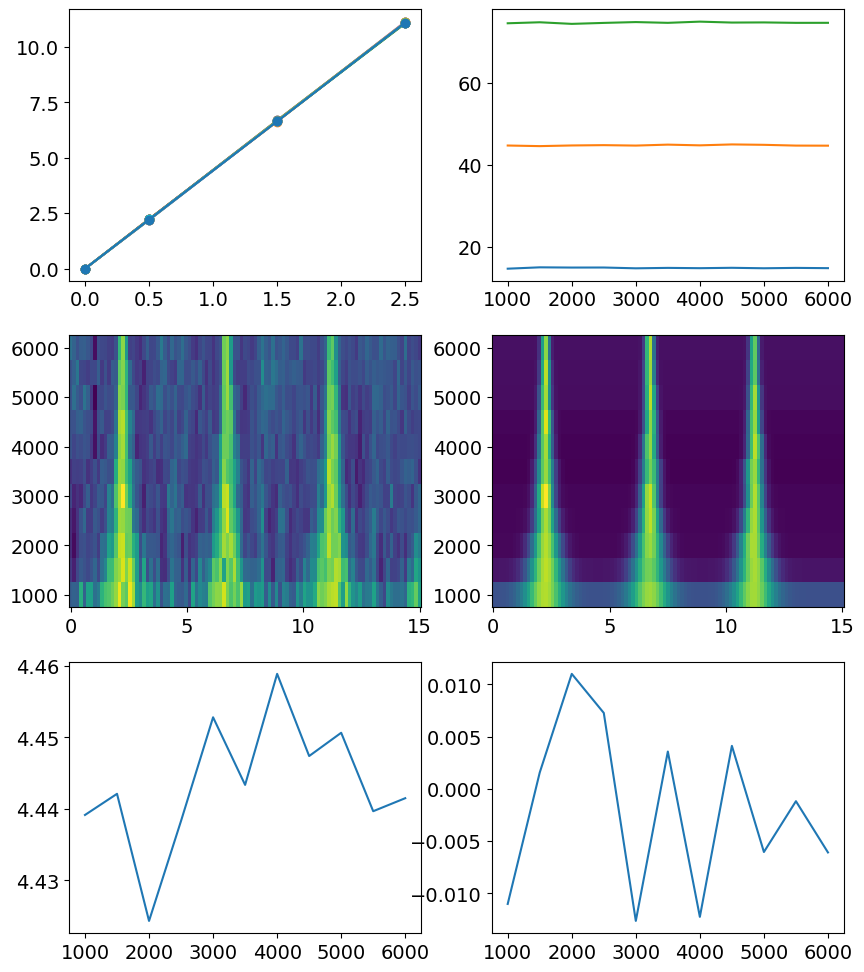

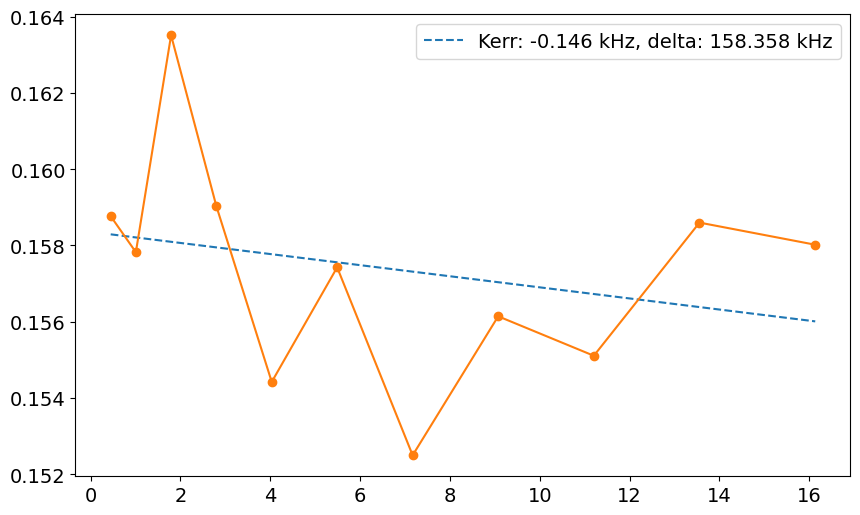

In [92]:
x = d['xpts']
y = d['ypts'][:11]
z = d['avgi'][:11,:]
kerr, delta, fs, alphas = extract_kerr_delta(x, y, z, attrs, debug=False, plot=True)

yind=8: 4 peaks found; skipping fit.


IndexError: index 8 is out of bounds for axis 0 with size 8

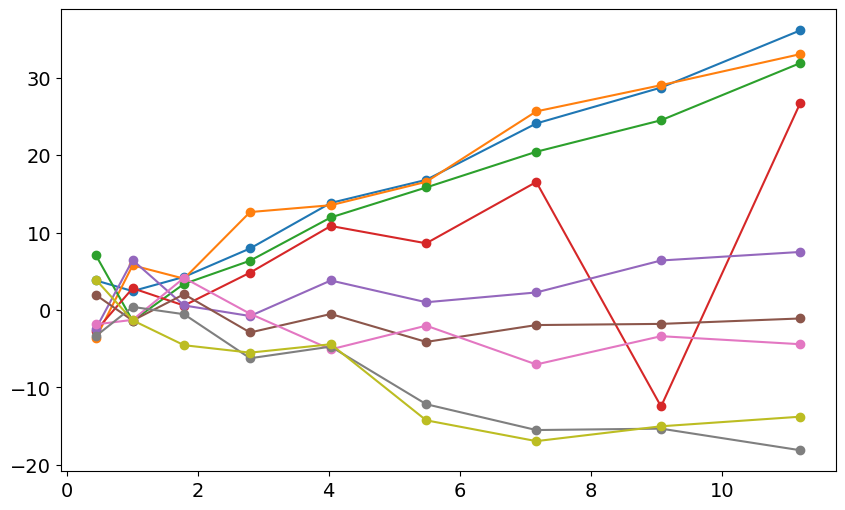

In [78]:
kerrs, deltas, kerrerrs = [], [], []
for fid in range(132, 149):
# for fid in [41,42,45]:
    fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
    d, attrs = prev_data(expt_path, fname)
    x = d['xpts'][:90]
    y = d['ypts'][:9]
    z = d['avgi'][:9,:90]
    kerr, delta, fs, alphas = extract_kerr_delta(x, y, z, attrs, debug=False, plot=False)
    resid = fs*2*np.pi - (kerr*alphas**2 + delta)
    kerrerr = np.std(resid) / np.sqrt(len(fs)-2) / np.std(alphas**2)

    kerrs.append(kerr)
    deltas.append(delta)
    kerrerrs.append(kerrerr)
    # plt.plot(alphas**2, kerr*alphas**2 + delta, ls='--')
    # plt.scatter(alphas**2, fs*2*np.pi, marker='o', label=fid)
    plt.plot(alphas**2, 1e3*(fs*2*np.pi-delta), marker='o', label=fid)
    
plt.legend()
plt.xlabel(r'$|\alpha|^2$')
plt.ylabel(r'$\Delta \omega_\text{Ramsey}$ [kHz]')
plt.title('Kerr Ramsey detuning sweeps')

Text(0.5, 0, 'Dataset index')

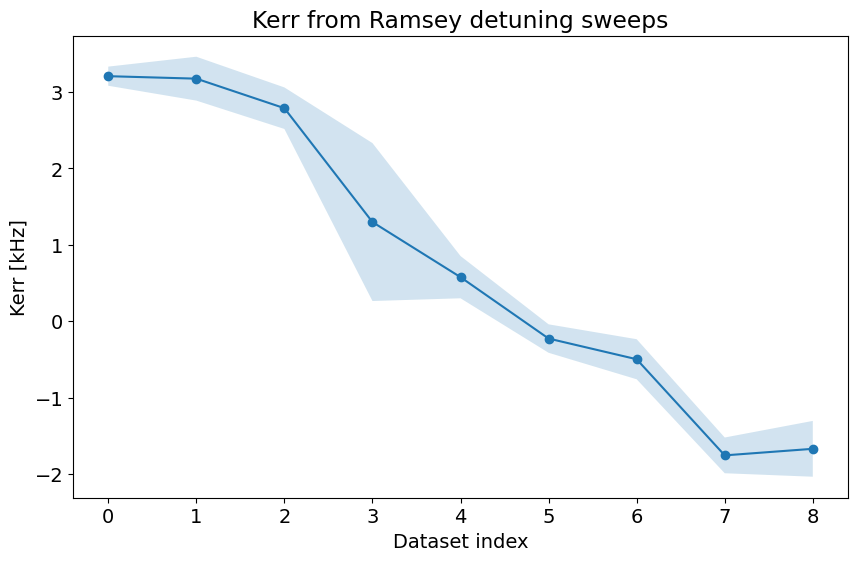

In [79]:
plt.plot(np.arange(len(kerrs)), np.array(kerrs)*1e3, marker='o')
plt.fill_between(np.arange(len(kerrs)), np.array(kerrs)*1e3 - np.array(kerrerrs)*1e3, np.array(kerrs)*1e3 + np.array(kerrerrs)*1e3, alpha=0.2)
# plt.plot(np.arange(len(deltas)), np.array(deltas)*1e3, marker='o')
plt.title('Kerr from Ramsey detuning sweeps')
plt.ylabel('Kerr [kHz]')
plt.xlabel('Dataset index')

In [54]:
attrs['config']['expt']['kerr_detune']

-10

## Proper formula fitting

Fit each normalized line (against time) to $\exp[2|\alpha|^2 (-\cos \omega t -1)]$ then fit between $\omega = \delta + K_c |\alpha|^2$

In [17]:
from multimode_expts.experiments.qsim.kerr import KerrCavityRamseyExperiment

### one file

Found local file /Users/wgz/Downloads/data/00362_KerrRamseyExperiment.h5


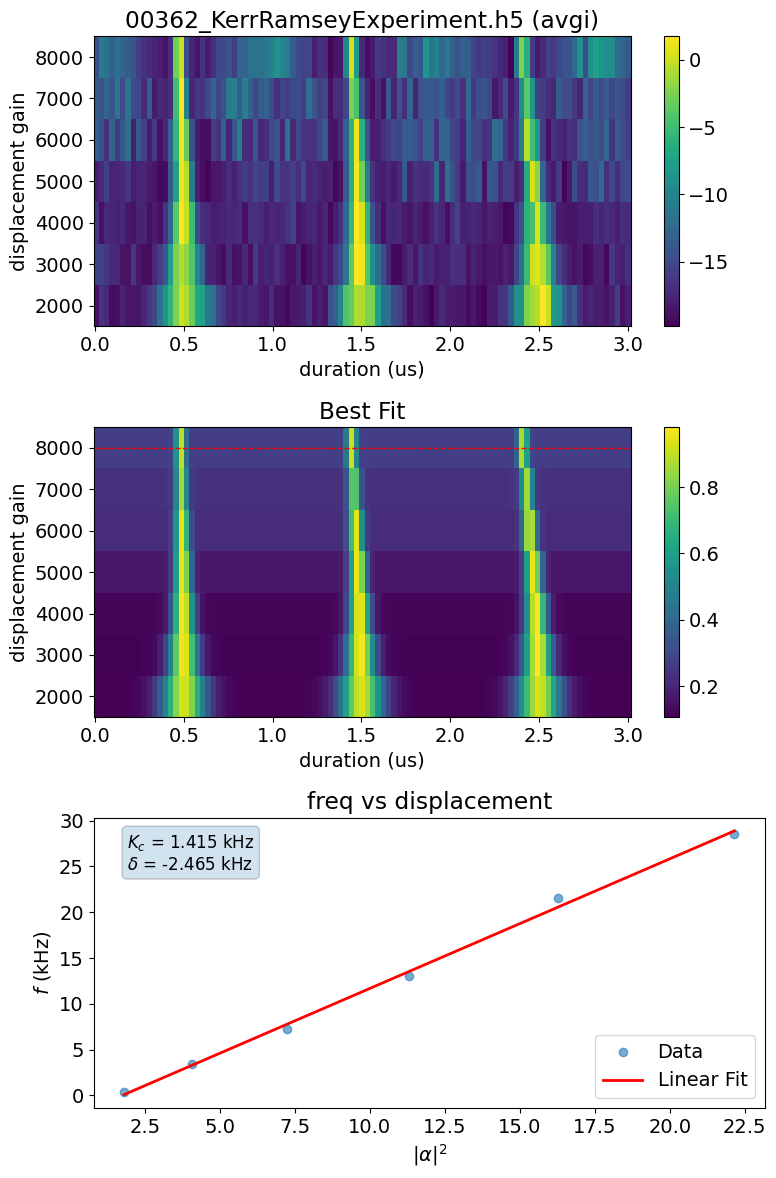

In [18]:
fname = f'00362_KerrRamseyExperiment.h5'

ensure_local_file(remote_path, local_path, fname)
s = KerrCavityRamseyExperiment.from_h5file(os.path.join(local_path, fname))
s.analyze(fit_rsq_threshold = 0.5)
fig = s.display()

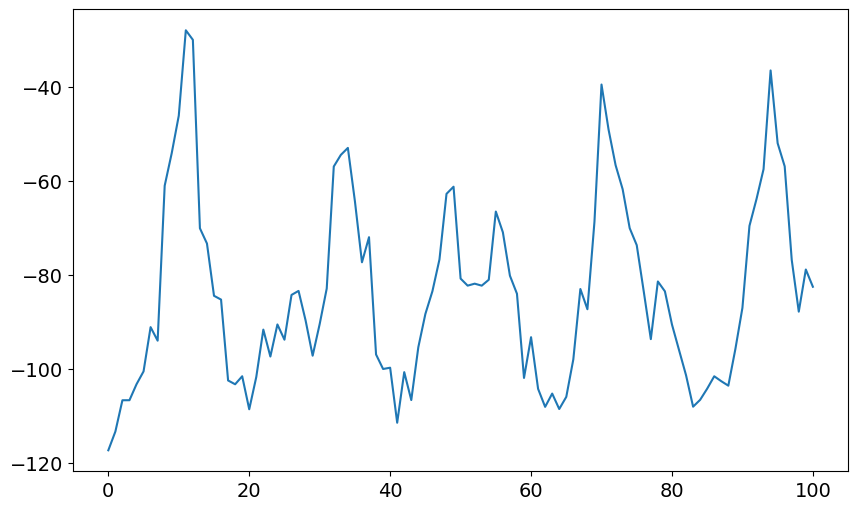

In [34]:
plt.plot(s.data['avgi'][3])

### sweep over kerr gains

In [31]:
kcs, deltas, bad_fits, kerr_gains = [], [], [], []
fids = range(11, 32)
for fid in fids:
    try:
        fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
        s = KerrCavityRamseyExperiment(path=expt_path, config_file=fname)
        s.data = s.load_data(s.datafile(read_mode=True))
        s.analyze()
        kcs.append(s.fit_results['kc'])
        deltas.append(s.fit_results['delta'])
        bad_fits.append(len(s.data['ypts'])-sum(s.fit_results['fit_good']))
        kerr_gains.append(s.fit_results['kerr_gain'])
    except Exception as e:
        print(f"Failed to process fid={fid}: {e}")

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.
Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'
Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.
Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'
Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.
Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'
Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.
Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'
Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'KerrCavityRamseyExperiment' object has no attribute 'im'


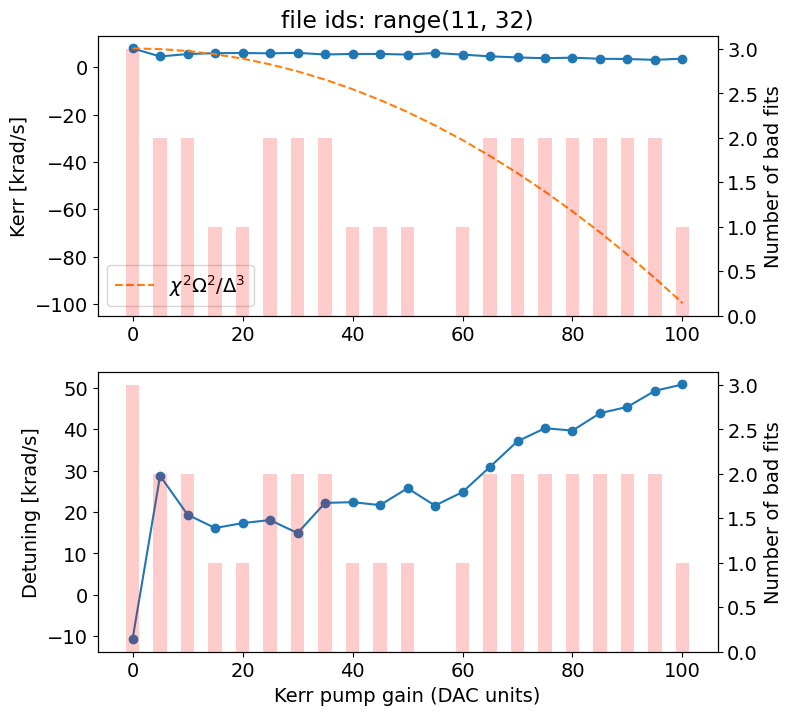

In [32]:
fig,axs = plt.subplots(2,1, figsize=(8,8))
axs[0].plot(kerr_gains, np.array(kcs)*1e3, marker='o')

detune = json.loads(s.data['attrs']['config'])['expt']['kerr_detune']
chi = 0.3 #Mrad/s

theory_kerr = kcs[0] - chi**2 * (np.array(kerr_gains)*0.0283)**2 / (2*np.pi*detune)**3
axs[0].plot(kerr_gains, theory_kerr*1e3, ls='--', label=r'$\chi^2\Omega^2/\Delta^3$')
axs[0].legend()

axs[0].set_ylabel('Kerr [krad/s]')
axs[0].set_title(f'file ids: {fids}')
axs[1].plot(kerr_gains, np.array(deltas)*1e3, marker='o')
axs[1].set_ylabel('Detuning [krad/s]') 
plt.xlabel('Kerr pump gain (DAC units)')

for ax in axs:
    # make a bar plot with heights of bars signaling number of bad fits
    # but use a separate y-axis on the right
    ax2 = ax.twinx()
    ax2.bar(kerr_gains, bad_fits, alpha=0.2, color='r',
            width = 0.5*(kerr_gains[1]-kerr_gains[0]))
    ax2.set_ylabel('Number of bad fits')

## Coupler drive 

In [253]:
kcs, deltas, bad_fits, kerr_gains = [], [], [], []
first_fid = 342
fids = range(first_fid, first_fid+10)
for fid in fids:
    try:
        fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
        ensure_local_file(remote_path, local_path, fname)
        s = KerrCavityRamseyExperiment.from_h5file(os.path.join(local_path, fname))
        s.analyze()
        kcs.append(s.fit_results['kc'])
        deltas.append(s.fit_results['delta'])
        bad_fits.append(len(s.data['ypts'])-sum(s.fit_results['fit_good']))
        kerr_gains.append(s.fit_results['kerr_gain'])
    except Exception as e:
        print(f"Failed to process fid={fid}: {e}")

Found local file /Users/wgz/Downloads/data/00342_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00343_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00344_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00345_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00346_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00347_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00348_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00349_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00350_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00351_KerrRamseyExperiment.h5


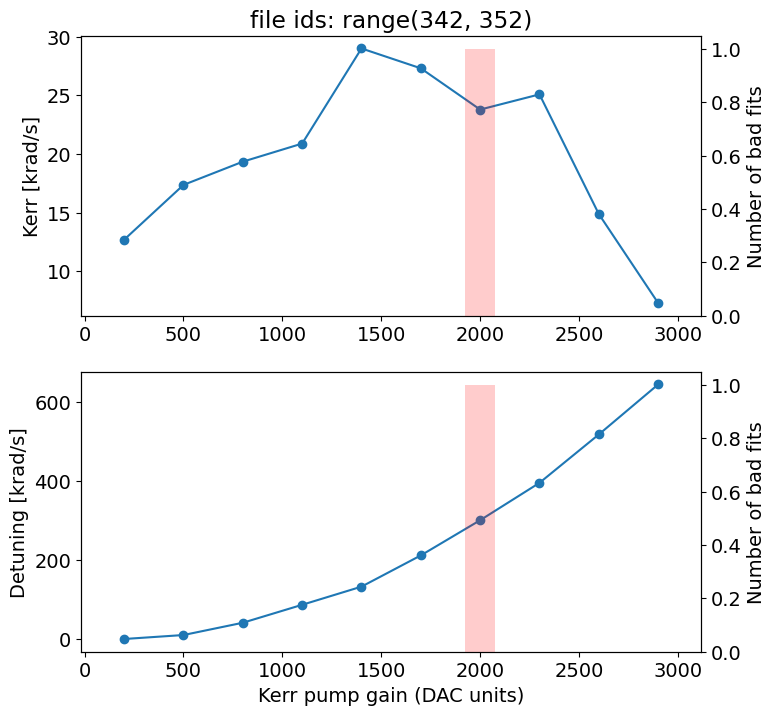

In [254]:
fig,axs = plt.subplots(2,1, figsize=(8,8))
axs[0].plot(kerr_gains, np.array(kcs)*1e3, marker='o')

detune = s.cfg.expt.kerr_detune
# chi = 0.3 #Mrad/s
# theory_kerr = kcs[0] - chi**2 * (np.array(kerr_gains)*0.0283)**2 / (2*np.pi*detune)**3
# axs[0].plot(kerr_gains, theory_kerr*1e3, ls='--', label=r'$\chi^2\Omega^2/\Delta^3$')
# axs[0].legend()

axs[0].set_ylabel('Kerr [krad/s]')
axs[0].set_title(f'file ids: {fids}')
axs[1].plot(kerr_gains, np.array(deltas)*1e3, marker='o')
axs[1].set_ylabel('Detuning [krad/s]') 
plt.xlabel('Kerr pump gain (DAC units)')

for ax in axs:
    # make a bar plot with heights of bars signaling number of bad fits
    # but use a separate y-axis on the right
    ax2 = ax.twinx()
    ax2.bar(kerr_gains, bad_fits, alpha=0.2, color='r',
            width = 0.5*(kerr_gains[1]-kerr_gains[0]))
    ax2.set_ylabel('Number of bad fits')

### Gain and detuning

In [269]:
kcs, deltas, bad_fits, kerr_gains = [], [], [], []
# fids = list(range(226,234)) + list(range(218,226)) + list(range(210,218)) \
    # + list(range(146, 146+8*8)) + list(range(234,258))
fids = list(range(272,272+90))
for fid in fids:
    try:
        fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
        ensure_local_file(remote_path, local_path, fname)
        s = KerrCavityRamseyExperiment.from_h5file(os.path.join(local_path, fname))
        s.analyze(fit_rsq_threshold=0.5)
        kcs.append(s.fit_results['kc'])
        deltas.append(s.fit_results['delta'])
        bad_fits.append(len(s.data['ypts'])-sum(s.fit_results['fit_good']))
        kerr_gains.append(s.fit_results['kerr_gain'])
    except Exception as e:
        print(f"Failed to process fid={fid}: {e}")
        kcs.append(np.nan)
        deltas.append(np.nan)
        bad_fits.append(len(s.data['ypts']))
        kerr_gains.append(np.nan)

Found local file /Users/wgz/Downloads/data/00272_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00273_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00274_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00275_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00276_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00277_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00278_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00279_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00280_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00281_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00282_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00283_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00284_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00285_Ke

Text(0, 0.5, 'detuning from M1-C (MHz)')

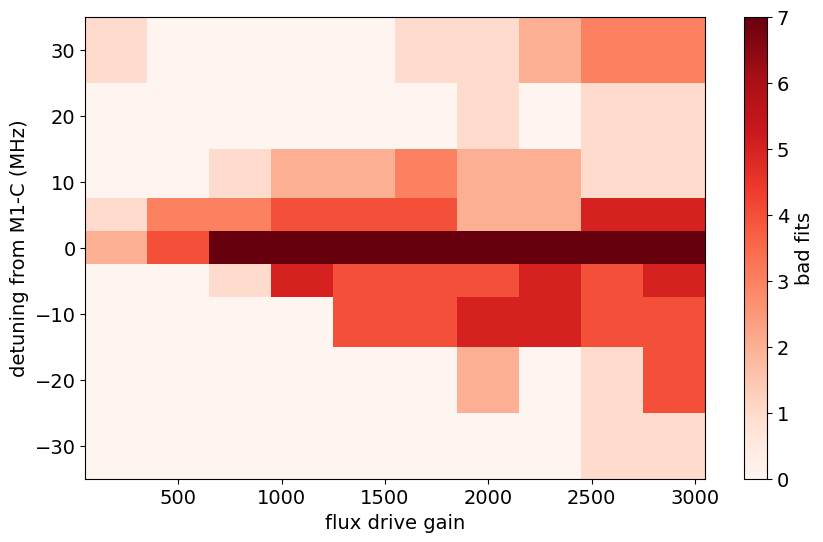

In [270]:
# kerr_gains = list(range(1000,8001,1000))
# detunings = [-50,-40,-30,-20,-10,-5,-1,1,5,10,20,30,40,50]
kerr_gains = list(range(200,2901,300))
detunings = [-30,-20,-10,-5,0,5,10,20,30]
kcs = np.array(kcs).reshape((len(detunings),len(kerr_gains)))
deltas = np.array(deltas).reshape((len(detunings),len(kerr_gains)))
bad_fits = np.array(bad_fits).reshape((len(detunings),len(kerr_gains)))

plt.pcolormesh(kerr_gains, detunings, bad_fits, cmap='Reds')
plt.colorbar(label='bad fits')
plt.xlabel('flux drive gain')
plt.ylabel('detuning from M1-C (MHz)')

Text(0, 0.5, 'detuning from M1-C (MHz)')

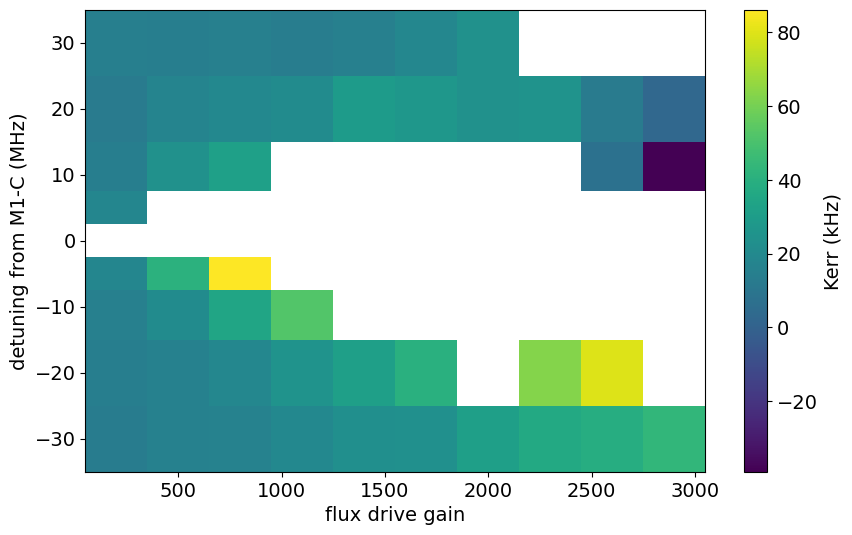

In [290]:
kc_masked = np.where(bad_fits<2, kcs, np.nan)

v0 = kcs[:,0].mean()
plt.pcolormesh(kerr_gains, detunings, 1e3*kc_masked)
plt.colorbar(label='Kerr (kHz)')
plt.xlabel('flux drive gain')
plt.ylabel('detuning from M1-C (MHz)')

Text(0, 0.5, 'detuning from M1-C (MHz)')

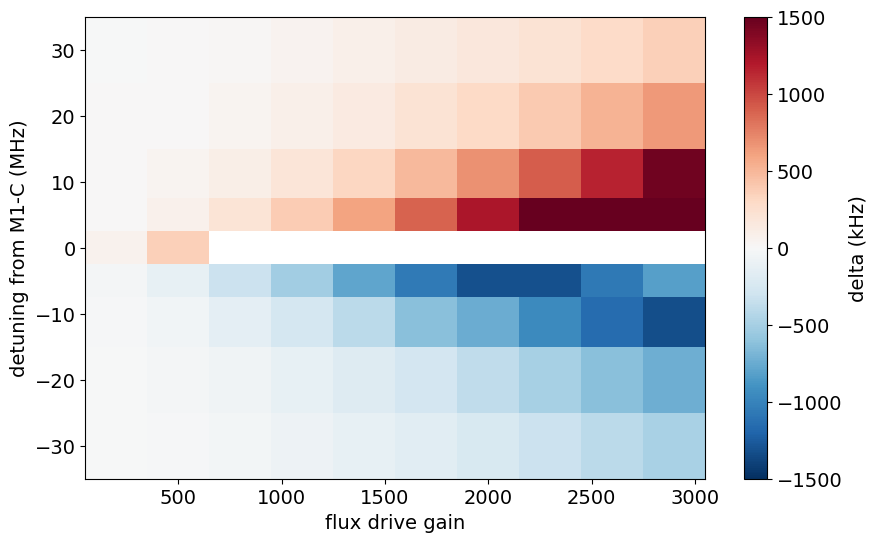

In [282]:
plt.pcolormesh(kerr_gains, detunings, 1e3*deltas, cmap='RdBu_r', vmin=-1500,vmax=1500)
plt.colorbar(label='delta (kHz)')
plt.xlabel('flux drive gain')
plt.ylabel('detuning from M1-C (MHz)')

Text(0, 0.5, 'Kerr (kHz)')

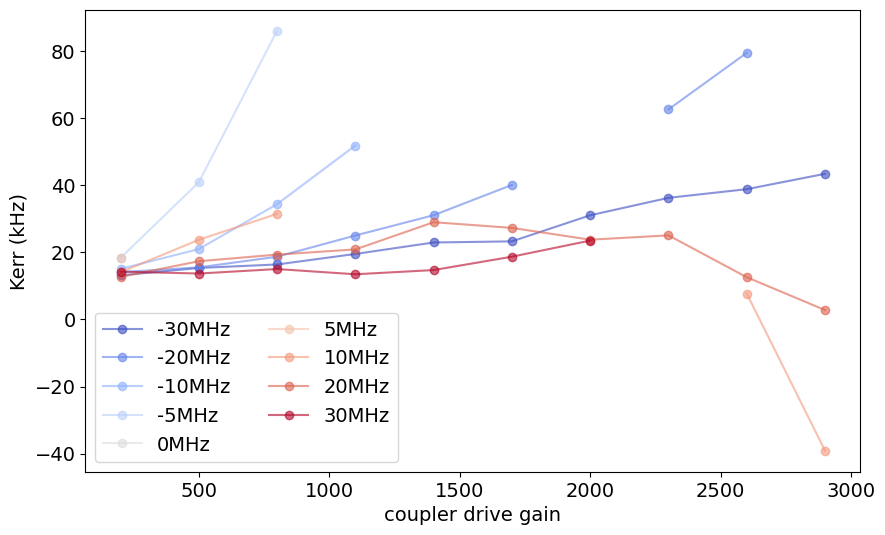

In [277]:
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0,1, len(detunings)))

for ii, detuning in enumerate(detunings):
    plt.plot(kerr_gains, kc_masked[ii]*1e3, label=f'{detuning}MHz', alpha=0.6, marker='o', color=colors[ii])

plt.legend(loc='lower left', ncols=2)
# plt.ylim(7,45)
plt.xlabel('coupler drive gain')
plt.ylabel('Kerr (kHz)')

Text(0, 0.5, 'Kerr (kHz)')

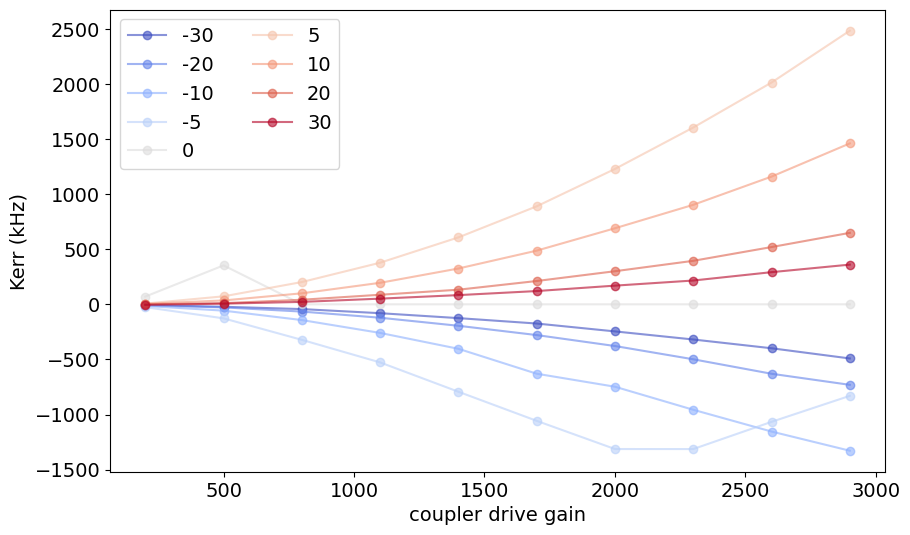

In [ ]:
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0,1, len(detunings)))

for ii, detuning in enumerate(detunings):
    plt.plot(kerr_gains, deltas[ii]*1e3, label=detuning, alpha=0.6, marker='o', color=colors[ii])

plt.legend(loc='upper left', ncols=2)
# plt.ylim(7,45)
plt.xlabel('coupler drive gain')
plt.ylabel('Kerr (kHz)')

## Flux dependence


In [31]:
kcs, deltas, bad_fits = [], [], []
fids = range(75, 121)
for fid in fids:
    try:
        fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
        ensure_local_file(remote_path, local_path, fname)
        s = KerrCavityRamseyExperiment.from_h5file(os.path.join(local_path, fname))
        s.analyze()
        kcs.append(s.fit_results['kc'])
        deltas.append(s.fit_results['delta'])
        bad_fits.append(len(s.data['ypts'])-sum(s.fit_results['fit_good']))
    except Exception as e:
        print(f"Failed to process fid={fid}: {e}")

Found local file /Users/wgz/Downloads/data/00075_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00076_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00077_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00078_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00079_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00080_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00081_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00082_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00083_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00084_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00085_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00086_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00087_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00088_Ke

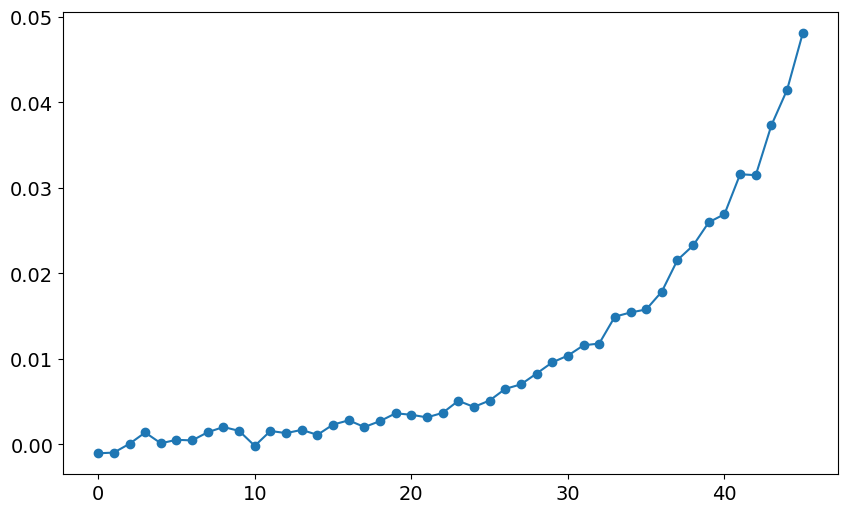

In [32]:
plt.plot(kcs, marker='o')

In [18]:
kcs, deltas, bad_fits = [], [], []
fids = [131,130,132,133,135,136,137,138]
currents = [0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6]
for fid in fids:
    try:
        fname = f'00{fid:03d}_KerrRamseyExperiment.h5'
        ensure_local_file(remote_path, local_path, fname)
        s = KerrCavityRamseyExperiment.from_h5file(os.path.join(local_path, fname))
        s.analyze()
        kcs.append(s.fit_results['kc'])
        deltas.append(s.fit_results['delta'])
        bad_fits.append(len(s.data['ypts'])-sum(s.fit_results['fit_good']))
    except Exception as e:
        print(f"Failed to process fid={fid}: {e}")

Found local file /Users/wgz/Downloads/data/00131_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00130_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00132_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00133_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00135_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00136_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00137_KerrRamseyExperiment.h5
Found local file /Users/wgz/Downloads/data/00138_KerrRamseyExperiment.h5


Text(0, 0.5, 'Number of bad fits')

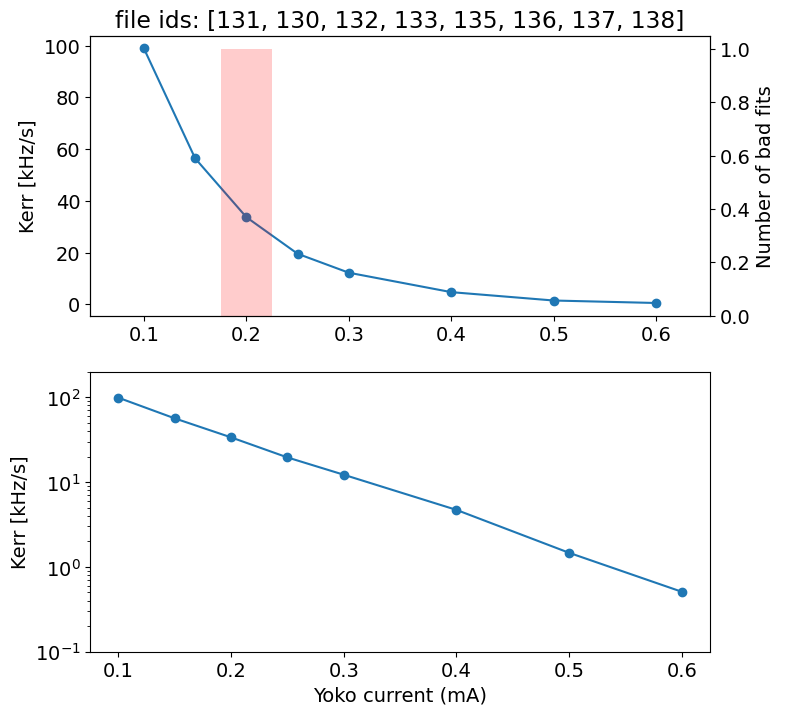

In [29]:
fig,axs = plt.subplots(2,1, figsize=(8,8))
axs[0].plot(currents, np.array(kcs)*1e3, marker='o')
axs[0].set_ylabel('Kerr [kHz/s]')
axs[0].set_title(f'file ids: {fids}')
axs[1].semilogy(currents, np.array(kcs)*1e3, marker='o')
axs[1].set_ylabel('Kerr [kHz/s]') 
axs[1].set_ylim(0.1,200)
plt.xlabel('Yoko current (mA)')

ax = axs[0]
# make a bar plot with heights of bars signaling number of bad fits
# but use a separate y-axis on the right
ax2 = ax.twinx()
ax2.bar(currents, bad_fits, alpha=0.2, color='r', width = 0.05)
ax2.set_ylabel('Number of bad fits')

# Multiphoton cal

## Parity spectroscopy 

In [291]:
from fitting.fit_display_classes import Spectroscopy

Fetching remote file 00080_ParityFreqExperiment.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.
Connection closed.  


Fetching /D:/experiments/251031_qsim/data/00080_ParityFreqExperiment.h5 to /Users/wgz/Downloads/data/00080_ParityFreqExperiment.h5
Found peak in amps at [MHz] 4991.35878396372, HWHM -0.5185520933072937
Found peak in I at [MHz] 4993.864028932488, HWHM 1.701099086154527
Found peak in Q at [MHz] 4993.88860110352, HWHM 1.4284802921833253


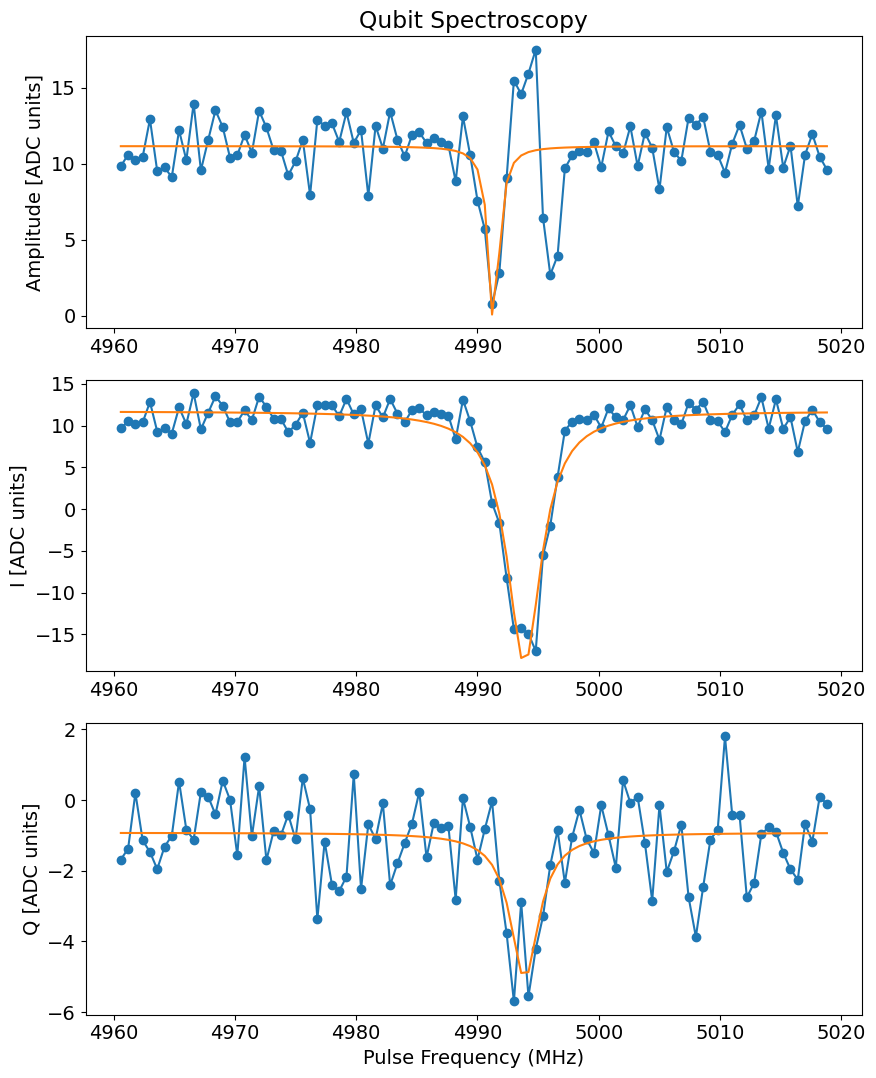

In [26]:
fname = f'00080_ParityFreqExperiment.h5'

ensure_local_file(remote_path, local_path, fname)
temp_data, attrs = prev_data(local_path, fname)
spec = Spectroscopy(temp_data, config=attrs['config'])
spec.analyze()
spec.display()

Found local file /Users/wgz/Downloads/data/00099_FluxSpectroscopyF0g1Experiment.h5
Found peak in amps at [MHz] 796.0925536655333, HWHM 19.946504830929438
Found peak in I at [MHz] 796.1245621535853, HWHM 21.050820994292653
Found peak in Q at [MHz] 925.6826880073261, HWHM 34579.30327659142


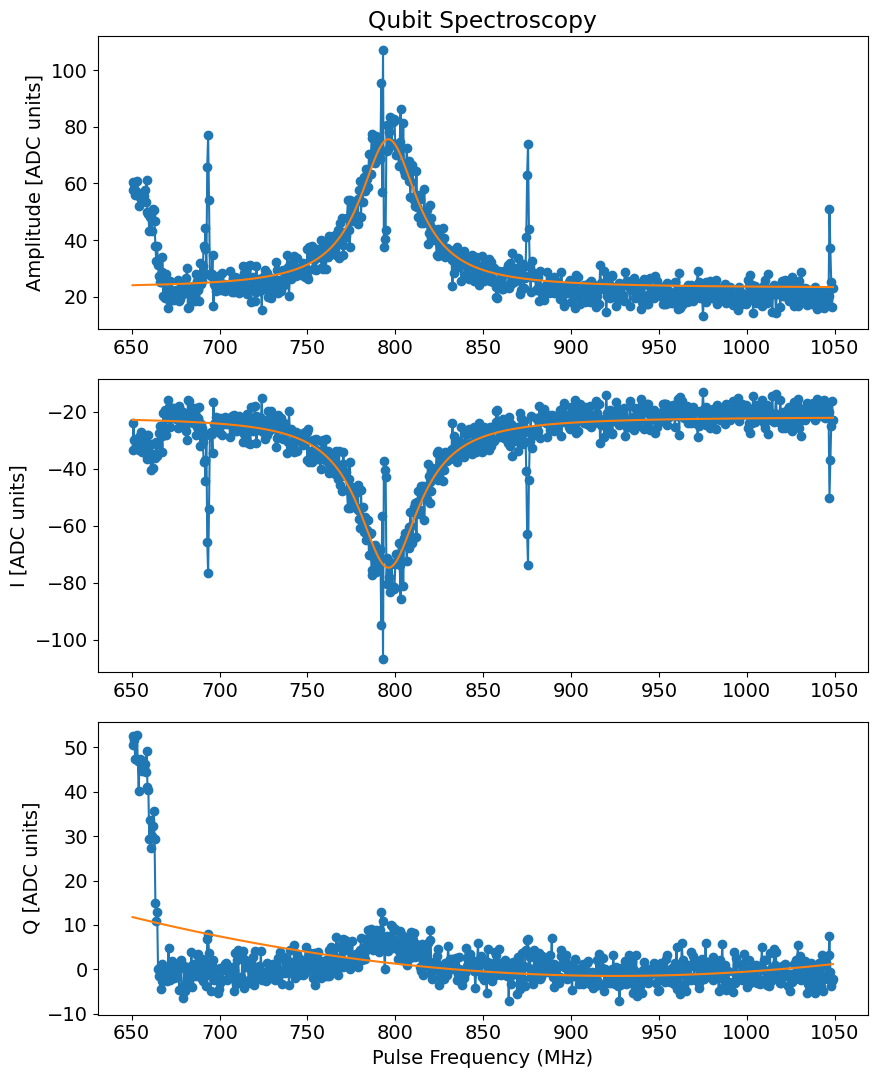

In [303]:
fname = f'00099_FluxSpectroscopyF0g1Experiment.h5'

ensure_local_file(remote_path, local_path, fname)
temp_data, attrs = prev_data(local_path, fname)
spec = Spectroscopy(temp_data, config=attrs['config'])
spec.analyze()
spec.display()

In [316]:
flux_gains = [4000, 2000, 1000, 500, 200, 100]
fids = [99, 104, 100, 101, 102, 103]
avgis = []
hwhms = []
for fid, flux_gain in zip(fids, flux_gains):
    fname = f'00{fid:03d}_FluxSpectroscopyF0g1Experiment.h5'
    ensure_local_file(remote_path, local_path, fname)
    temp_data, attrs = prev_data(local_path, fname)
    spec = Spectroscopy(temp_data, config=attrs['config'])
    spec.analyze()
    hwhms.append(abs(spec.data['fit_avgi'][3]))
    avgis.append(temp_data['avgi'][:600])
    
avgis = np.array(avgis).reshape((len(fids),600))
hwhms = np.array(hwhms)

Found local file /Users/wgz/Downloads/data/00099_FluxSpectroscopyF0g1Experiment.h5
Found local file /Users/wgz/Downloads/data/00104_FluxSpectroscopyF0g1Experiment.h5
Found local file /Users/wgz/Downloads/data/00100_FluxSpectroscopyF0g1Experiment.h5
Found local file /Users/wgz/Downloads/data/00101_FluxSpectroscopyF0g1Experiment.h5
Found local file /Users/wgz/Downloads/data/00102_FluxSpectroscopyF0g1Experiment.h5
Found local file /Users/wgz/Downloads/data/00103_FluxSpectroscopyF0g1Experiment.h5


Text(0, 0.5, 'HWHM (MHz)')

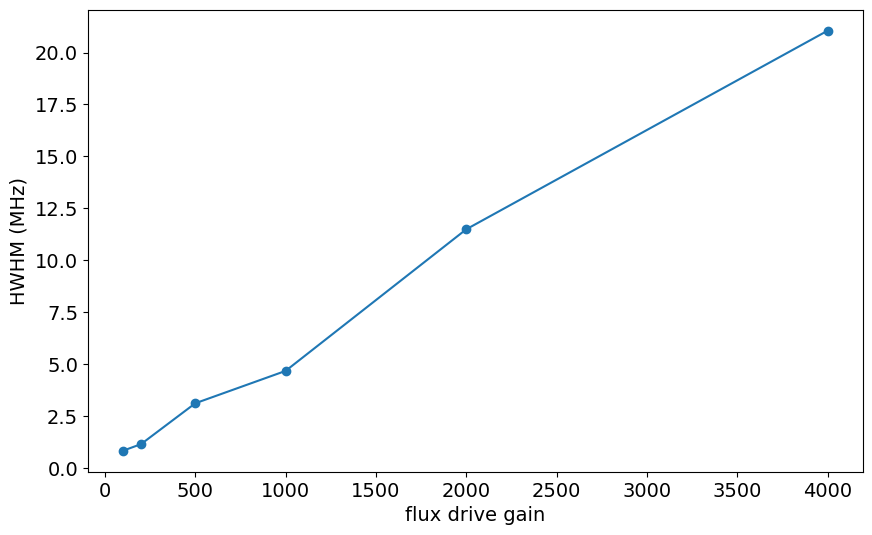

In [318]:
plt.plot(flux_gains, hwhms, marker='o')
plt.xlabel('flux drive gain')
plt.ylabel('HWHM (MHz)')

Text(0, 0.5, 'Log(flux drive gain)')

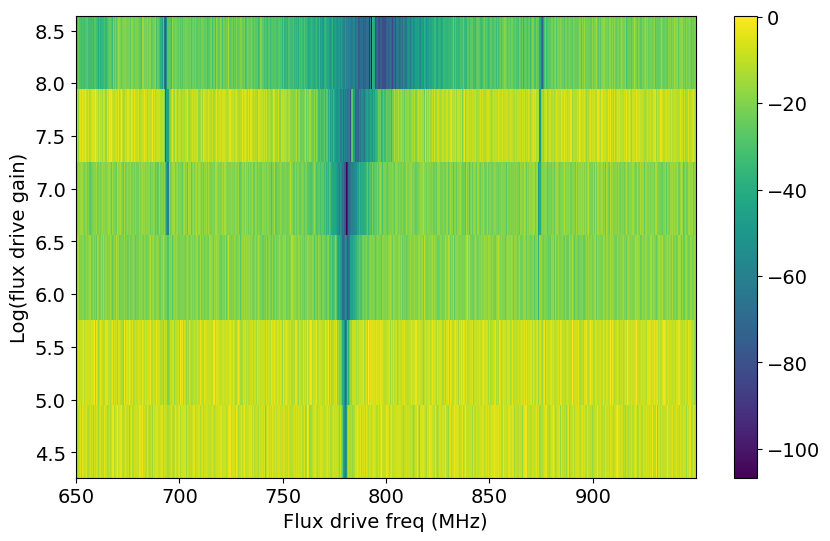

In [313]:
plt.pcolormesh(spec.data['xpts'], np.log(flux_gains), avgis)
plt.colorbar()
plt.xlabel('Flux drive freq (MHz)')
plt.ylabel('Log(flux drive gain)')

# Scratchpad

Fetching remote file 00020_SidebandScramble_S0_to_S0.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.
Connection closed.  


Fetching /D:/experiments/251031_qsim/data/00020_SidebandScramble_S0_to_S0.h5 to /Users/wgz/Downloads/data/00020_SidebandScramble_S0_to_S0.h5


Text(0.5, 1.0, '00020_SidebandScramble_S0_to_S0.h5')

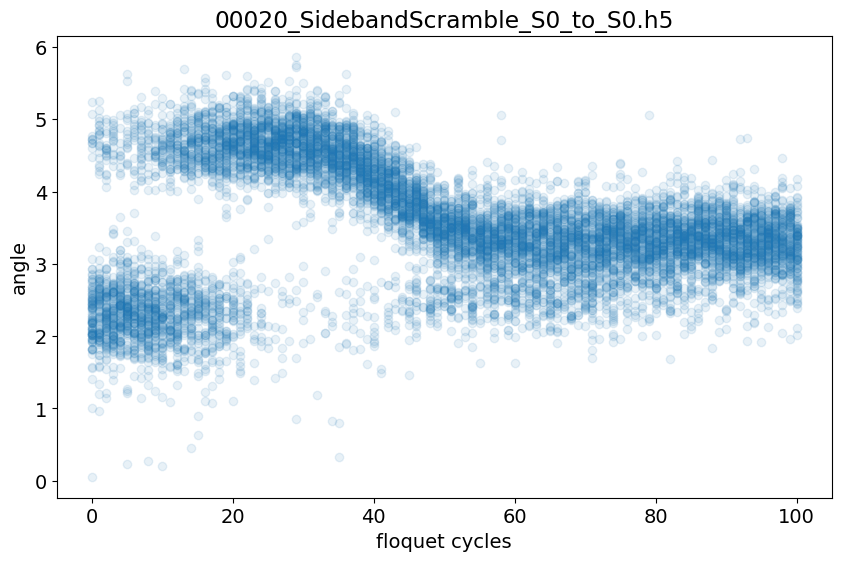

In [71]:
fname = ensure_local_file(remote_path, local_path, f'00020_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)

amp_shots = np.abs(temp_data['idata']+1j*temp_data['qdata'])
angle_shots = np.angle(temp_data['idata']+1j*temp_data['qdata'])
angle_shots = (angle_shots + 2*np.pi) % (2*np.pi) # wrap to [0, 2pi]

for kk in range(amp_shots.shape[1]):
    plt.scatter(temp_data['xpts'], angle_shots[:, kk], alpha=0.1, color='C0')

plt.xlabel('floquet cycles')
plt.ylabel('angle')
plt.title(fname.split(os.path.sep)[-1])

Found local file /Users/wgz/Downloads/data/00010_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00011_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00006_SidebandScramble_S0_to_S0.h5


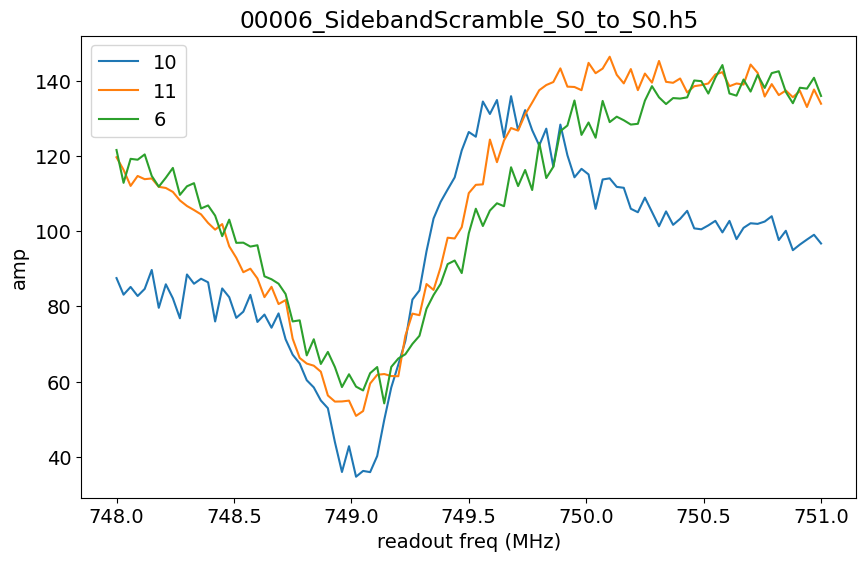

In [52]:
for fid in [10,11,6]:
    fname = ensure_local_file(remote_path, local_path, f'00{fid:03d}_SidebandScramble_S0_to_S0.h5')
    temp_data, attrs = prev_data(local_path, fname)
    plt.plot(temp_data['xpts'], temp_data['amps'], label=fid)

plt.xlabel('readout freq (MHz)')
plt.ylabel('amp')
plt.title(fname.split(os.path.sep)[-1])
plt.legend()

Found local file /Users/wgz/Downloads/data/00006_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00008_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00009_SidebandScramble_S0_to_S0.h5


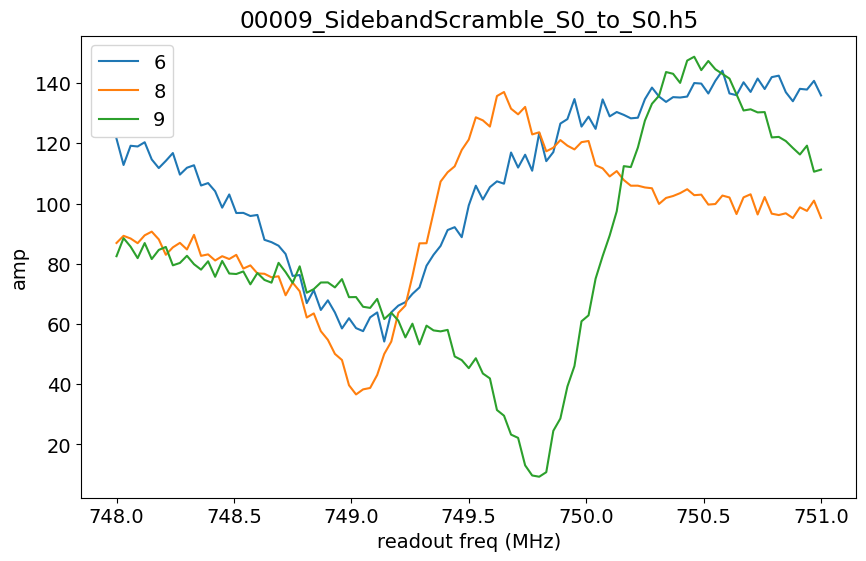

In [38]:
for fid in [6,8,9]:
    fname = ensure_local_file(remote_path, local_path, f'00{fid:03d}_SidebandScramble_S0_to_S0.h5')
    temp_data, attrs = prev_data(local_path, fname)
    plt.plot(temp_data['xpts'], temp_data['amps'], label=fid)

plt.xlabel('readout freq (MHz)')
plt.ylabel('amp')
plt.title(fname.split(os.path.sep)[-1])
plt.legend()

Found local file /Users/wgz/Downloads/data/00008_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00002_ResonatorSpectroscopyExperiment.h5
Found local file /Users/wgz/Downloads/data/00009_SidebandScramble_S0_to_S0.h5
Found local file /Users/wgz/Downloads/data/00005_ResonatorSpectroscopyExperiment.h5
Found local file /Users/wgz/Downloads/data/00006_SidebandScramble_S0_to_S0.h5


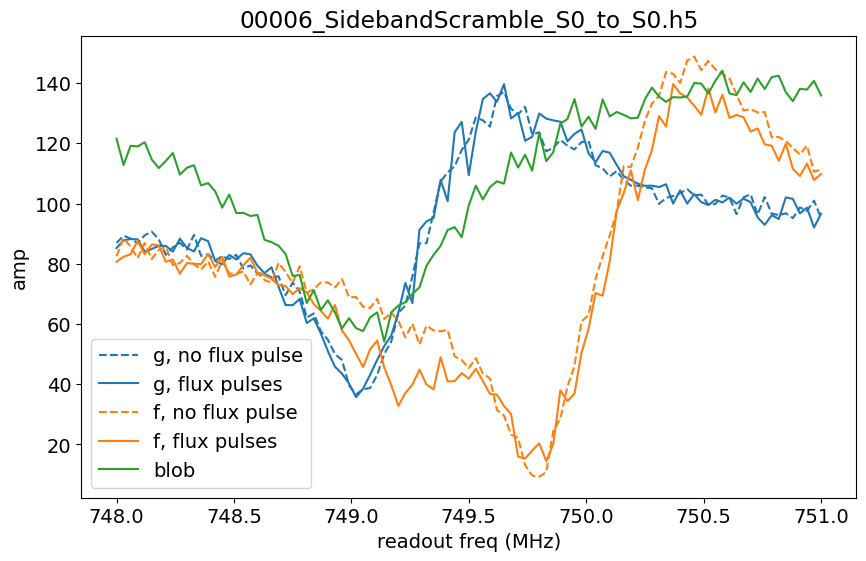

In [62]:
fname = ensure_local_file(remote_path, local_path, f'00008_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['amps'], label='g, no flux pulse', ls='--', color='C0')

fname = ensure_local_file(remote_path, local_path, f'00002_ResonatorSpectroscopyExperiment.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['amps'], label='g, flux pulses', color='C0')

fname = ensure_local_file(remote_path, local_path, f'00009_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['amps'], label='f, no flux pulse', ls='--', color='C1')
fname = ensure_local_file(remote_path, local_path, f'00005_ResonatorSpectroscopyExperiment.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['amps'], label='f, flux pulses', color='C1')

fname = ensure_local_file(remote_path, local_path, f'00006_SidebandScramble_S0_to_S0.h5')
temp_data, attrs = prev_data(local_path, fname)
plt.plot(temp_data['xpts'], temp_data['amps'], label='blob', color='C2')
plt.xlabel('readout freq (MHz)')
plt.ylabel('amp')
plt.title(fname.split(os.path.sep)[-1])
plt.legend()

In [ ]:

for fid in [2,6,5,8]:
    fname = ensure_local_file(remote_path, local_path, f'00{fid:03d}_ResonatorSpectroscopyExperiment.h5')
    temp_data, attrs = prev_data(local_path, fname)
    plt.plot(temp_data['xpts'], temp_data['amps'], label=fid)

plt.xlabel('readout freq (MHz)')
plt.ylabel('amp')
plt.title(fname.split(os.path.sep)[-1])
plt.legend()

## Quick view any data

In [40]:
ensure_local_file(remote_path, local_path, f'00002_FloquetCalibration_S2_to_S3.h5')
temp_data, attrs = prev_data(local_path, f'00002_FloquetCalibration_S2_to_S3.h5')

Fetching remote file 00002_FloquetCalibration_S2_to_S3.h5 to local path /Users/wgz/Downloads/data


Connected to bf5.


Fetching /D:/experiments/251031_qsim/data/00002_FloquetCalibration_S2_to_S3.h5 to /Users/wgz/Downloads/data/00002_FloquetCalibration_S2_to_S3.h5


Connection closed.  


In [41]:
temp_data.keys()

dict_keys(['amps', 'avgi', 'avgq', 'idata', 'phases', 'qdata', 'xpts', 'ypts'])

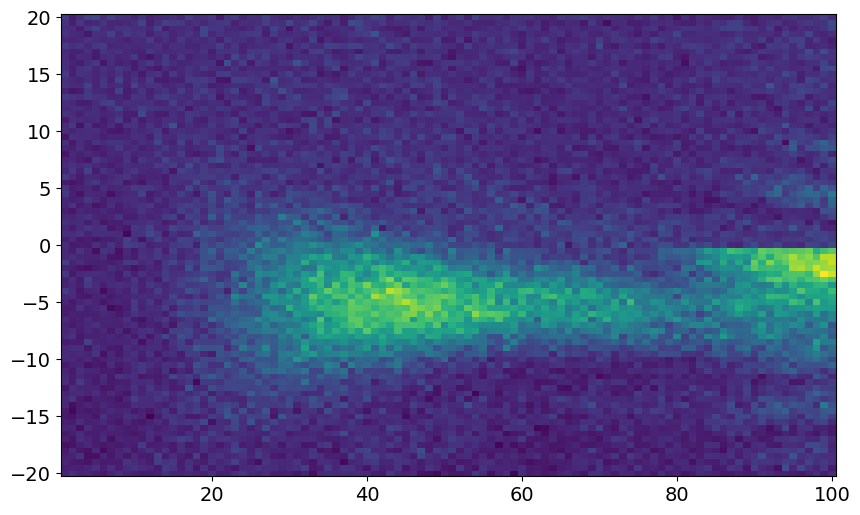

In [42]:
try:
    plt.pcolormesh(temp_data['xpts'], temp_data['ypts'], temp_data['avgi'])
except:
    plt.plot(temp_data['xpts'], temp_data['avgi'])

In [ ]:
attrs['config']['expt'].keys()

dict_keys(['expts', 'reps', 'rounds', 'qubits', 'f0g1_cavity', 'init_stor', 'ro_stor', 'detune', 'phases', 'waits', 'swept_params', 'normalize', 'active_reset', 'man_reset', 'storage_reset', 'advance_phase', 'echoes', 'phase', 'wait'])

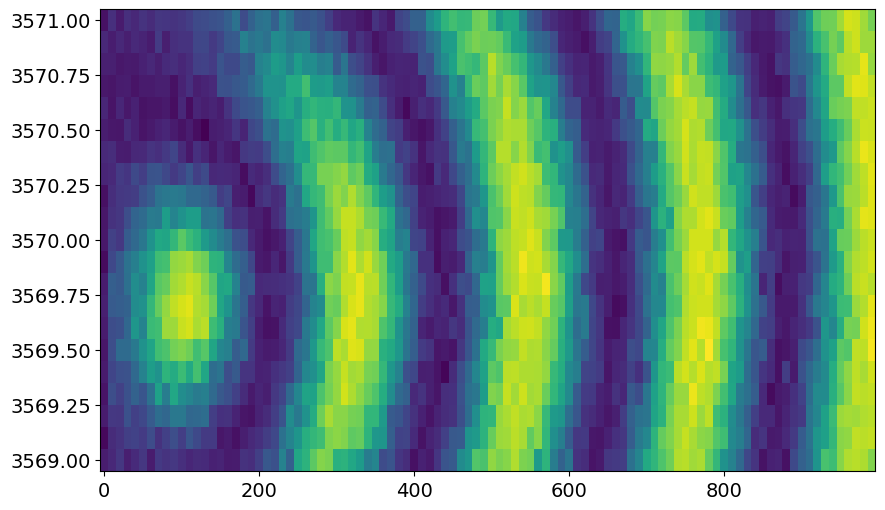

In [ ]:
plt.pcolormesh(temp_data['xpts'], temp_data['freqpts'], temp_data['avgi'])



In [229]:
from fitting.fit_display_classes import AmplitudeRabiFitting

In [239]:
def fitcos(x, A, omega, phase, offset):
    return A * np.cos(omega * x + phase) + offset

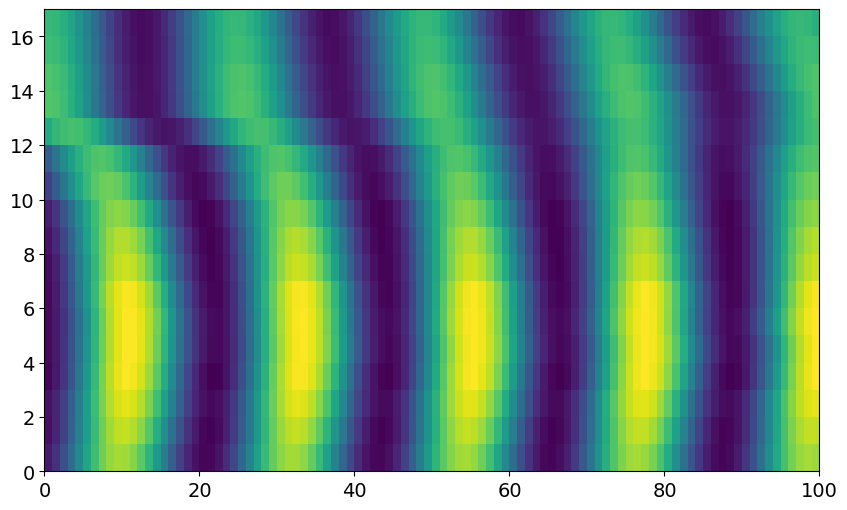

In [244]:
best_fits = []
fit_freqs = []

for line in temp_data['avgi'][3:20]:
    popts, pcov = curve_fit(fitcos, temp_data['xpts'], line,
                            p0=[50, 2*np.pi/200, np.pi, np.mean(line)],
                            bounds=([0, 0, 0, -100], [np.inf, np.inf, 2*np.pi, 0]),)
    best_fits.append(fitcos(temp_data['xpts'], *popts))    
    fit_freqs.append(popts[1]/(2*np.pi))

plt.pcolormesh(np.array(best_fits))


In [246]:
1/np.array(fit_freqs)

array([222.22584151, 221.8656323 , 221.88385823, 222.49053532,
       222.47836822, 221.6174645 , 222.74929119, 223.02451765,
       223.75656614, 224.55315444, 227.65675725, 230.17183618,
       241.53324868, 250.26819393, 247.89918952, 245.1336387 ,
       242.65445031])

## View using qsim base experiment 

In [43]:
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment

In [ ]:
# expt_path = os.path.join(parent_path, '250708_qsim', 'data')

In [35]:
fnames = [
    '00031_SidebandScramble_S1_to_S0.h5',
]

In [ ]:
ensure_local_file(remote_path, local_path, fnames[0])
s = QsimBaseExperiment.from_h5file(path=local_path, config_file=fnames[0])
s.data = s.load_data(s.datafile(read_mode=True))

NameError: name 'fnames' is not defined

(<Figure size 1000x900 with 4 Axes>,
 array([<Axes: title={'center': '00031_SidebandScramble_S1_to_S0.h5'}, xlabel='floquet_cycle', ylabel='advance_phase'>,
        <Axes: xlabel='floquet_cycle', ylabel='advance_phase'>],
       dtype=object))

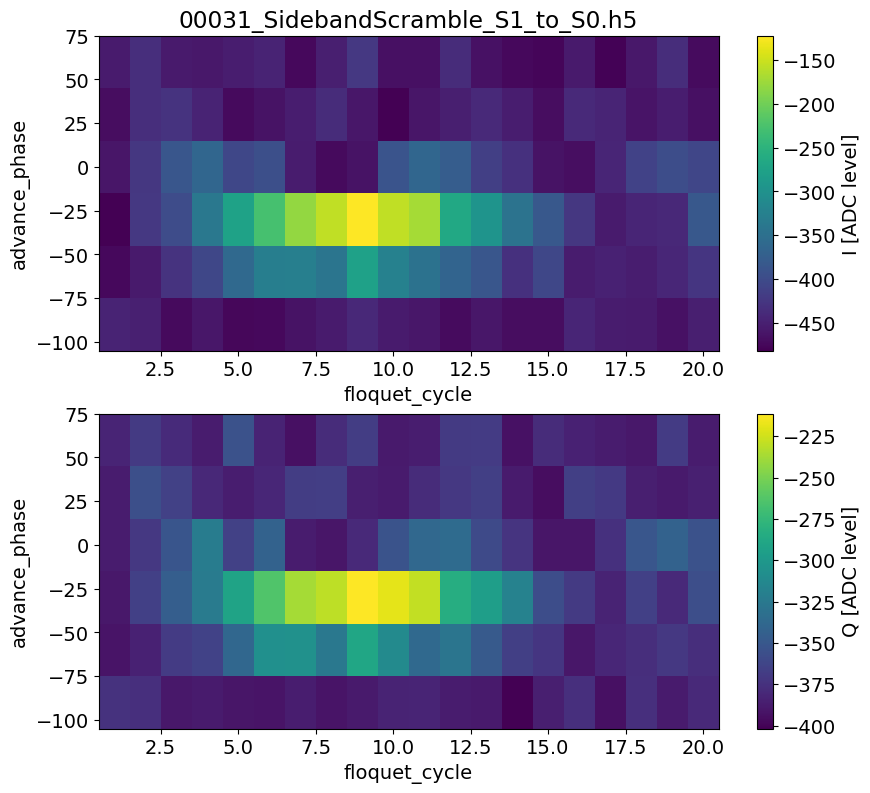

In [37]:
s.display()

## debug fitting

In [38]:
from fitting.fit_display_classes import ChevronFitting

In [39]:
expt_path = os.path.join(parent_path, '250505_qsim', 'data')

In [40]:
temp_data, attrs = prev_data(expt_path, f'00017_length_rabi_f0g1_sweep.h5')

In [42]:
chevron_analysis = ChevronFitting(
    frequencies=temp_data['freq_sweep'],
    time=temp_data['xpts'][0],
    response_matrix=temp_data['avgi']
)

chevron_analysis.analyze()
chevron_analysis.display_results(save_fig=False, directory='', title='')


TypeError: ChevronFitting.display_results() got an unexpected keyword argument 'directory'

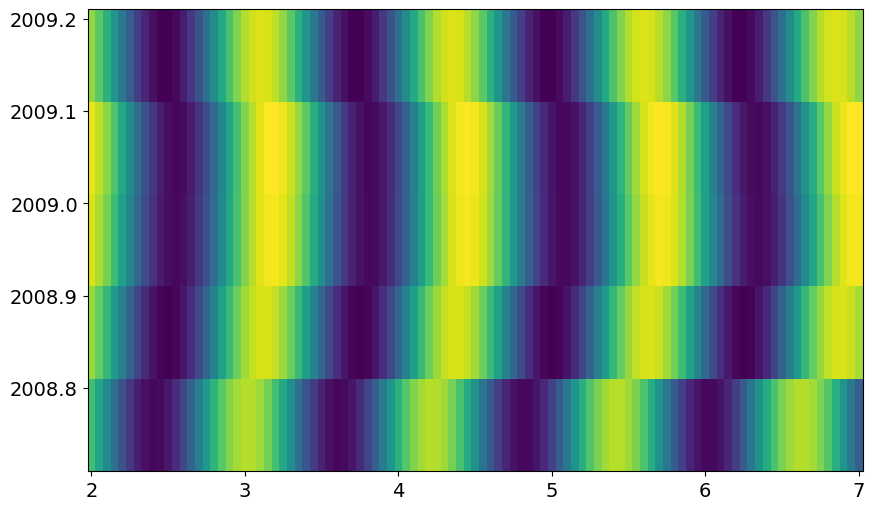

In [43]:
plt.pcolormesh(chevron_analysis.time, chevron_analysis.frequencies, chevron_analysis.best_fits)

2008.9599999999998


IndexError: list index out of range

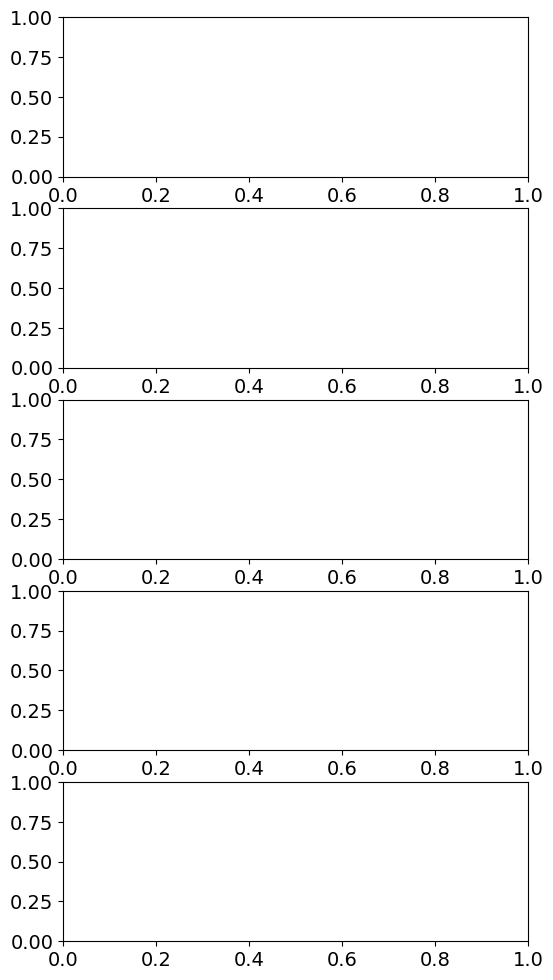

In [44]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.nanargmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

for key, ax in zip(chevron_analysis.lmfit_results[6].params.keys(), axs):
    ax.plot([res.best_values[key] for res in chevron_analysis.lmfit_results])

    ax.set_ylabel(key)

axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


2008.9599999999998


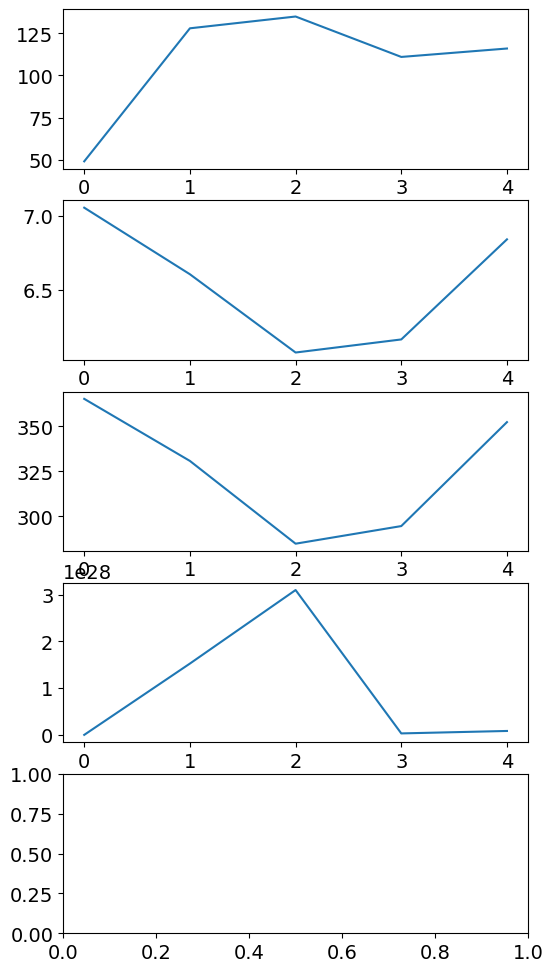

In [45]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.argmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

axs[0].plot([res.nfev for res in chevron_analysis.lmfit_results])
axs[1].plot([np.mean(res.eval_uncertainty()) for res in chevron_analysis.lmfit_results])
axs[2].plot([res.redchi for res in chevron_analysis.lmfit_results])
axs[3].plot([np.max(res.covar) for res in chevron_analysis.lmfit_results])


# axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


In [34]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

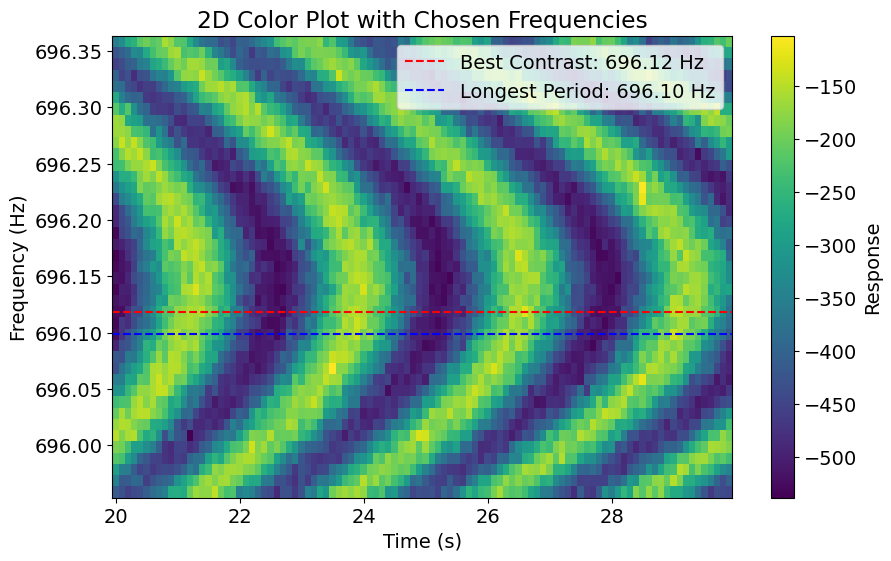

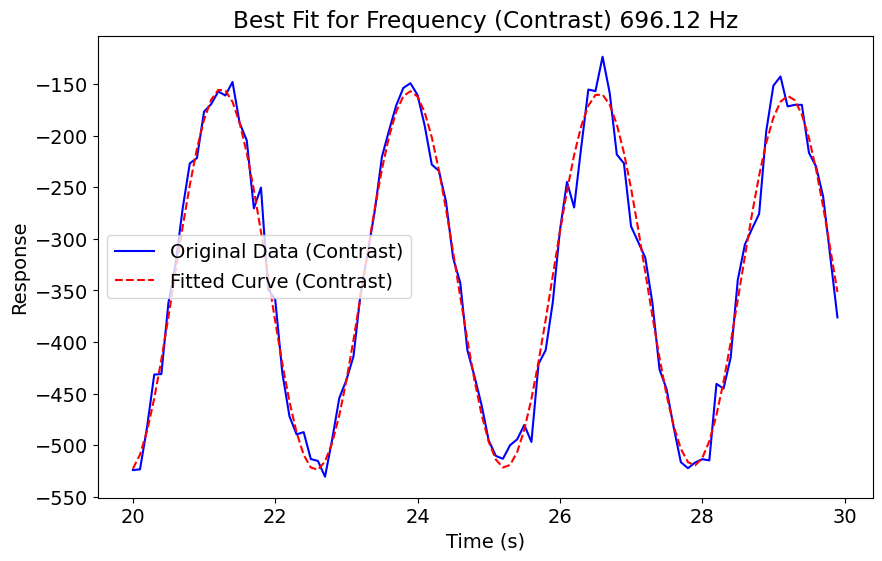

In [35]:
chevron_analysis.display_results(save_fig=False, directory='', title=f'M1-S4_{current_time}')